# fasta to csv 

In [2]:
from Bio import SeqIO
import csv

def write_fasta_to_csv(fasta_file, csv_file):
    """
    Write the gene ID and sequence of each record in a FASTA file into a CSV file.

    Parameters:
    fasta_file (str): The path to the FASTA file.
    csv_file (str): The path to the CSV file to be created.
    """
    # Open the FASTA file for reading and the CSV file for writing
    with open(fasta_file, "r") as fasta_fh, open(csv_file, "w", newline="") as csv_fh:
        csv_writer = csv.writer(csv_fh)
        csv_writer.writerow(["Gene ID", "Sequence"])  # Write the header row

        # Iterate through each record in the FASTA file
        for record in SeqIO.parse(fasta_fh, "fasta"):
            gene_id = record.id  # Get the gene ID
            sequence = str(record.seq)  # Get the sequence

            # Write the gene ID and sequence into the CSV file
            csv_writer.writerow([gene_id, sequence])

# Example usage
fasta_file_path = "DExTER/example/ATGminus2000plus2000.fasta"  # Replace with your FASTA file path
csv_file_path = "ATGminus2000plus2000.csv"  # Replace with the desired output CSV file path
write_fasta_to_csv(fasta_file_path, csv_file_path)


# Expression data to csv 

In [10]:
import pandas as pd
df1 = pd.read_csv("DExTER/example/my_experience/data/0h.data", names = ['Gene ID', 'expression'], delimiter = " ")
df1

Gene ID  expression
0     PF3D7_1300100    0.139879
1     PF3D7_1318600    0.340444
2     PF3D7_1318700    0.646404
3     PF3D7_1319400    0.945961
4     PF3D7_1319700    0.255273
...             ...         ...
5226  PF3D7_1254600    0.000000
5227  PF3D7_1254700    0.000000
5228  PF3D7_1254800    0.029384
5229  PF3D7_1255000    0.012837
5230  PF3D7_1255100    0.000000

[5231 rows x 2 columns]

In [8]:
df2 = pd.read_csv("ATGminus2000plus2000.csv")

In [12]:
import pandas as pd

# Assuming df1 and df2 are your two dataframes
# Let's say both dataframes have a column named 'Gene ID'

# Merge the dataframes based on the 'Gene ID' column
merged_df = pd.merge(df1, df2, on='Gene ID', how='inner')

# 'inner' specifies that only the common Gene IDs will be included in the merged dataframe
# Change 'how' parameter to 'left', 'right', or 'outer' for different types of joins

# Display the merged dataframe
merged_df


Gene ID  expression  \
0     PF3D7_1300100    0.139879   
1     PF3D7_1318600    0.340444   
2     PF3D7_1318700    0.646404   
3     PF3D7_1319400    0.945961   
4     PF3D7_1319700    0.255273   
...             ...         ...   
5226  PF3D7_1254600    0.000000   
5227  PF3D7_1254700    0.000000   
5228  PF3D7_1254800    0.029384   
5229  PF3D7_1255000    0.012837   
5230  PF3D7_1255100    0.000000   

                                               Sequence  
0     ATAGGAAAAACAAATGTACGTTTTAAAAAAAAGAAAAAAAAAAAAA...  
1     TGTCCTTTTAATATTATATAACATATATTTTTTTTTTTTATAGATA...  
2     AAATAAAAATAATTCAAATAATAAAGTTATGAAAACAAAAGCATCA...  
3     TTTTATTTTTTTATTCATGGTATTATCTTTTTATAATATATTTTAT...  
4     TTACTAATAATAATTCGTACATAATTAATATGTAGAACTTATTTTT...  
...                                                 ...  
5226  ATTATACCTCATATTAAATGTCATATAATGAAATATATAATAGAAC...  
5227  ATATTATTCTATATGTATATAATAAAAAATTGATATAAATAAATAT...  
5228  TCATGACTATATAAAAGATTTCAATGCAATTATAAATTATTTTTAA...  
5229  TTATTTACTTATAAATATCAATGTTATCATCATTTTAGGGGGTAAA...  
5230  ACCAAAAAAAAAAAAAAAAAAAAAAAAATCGATATTTGTATAATAA...  

[5231 rows x 3 columns]

In [13]:
merged_df = merged_df[['Sequence', 'expression', 'Gene ID']]

In [19]:
merged_df.rename(columns = {'expression' : 'label'}, inplace = True)

In [20]:
merged_df

Sequence     label  \
0     ATAGGAAAAACAAATGTACGTTTTAAAAAAAAGAAAAAAAAAAAAA...  0.139879   
1     TGTCCTTTTAATATTATATAACATATATTTTTTTTTTTTATAGATA...  0.340444   
2     AAATAAAAATAATTCAAATAATAAAGTTATGAAAACAAAAGCATCA...  0.646404   
3     TTTTATTTTTTTATTCATGGTATTATCTTTTTATAATATATTTTAT...  0.945961   
4     TTACTAATAATAATTCGTACATAATTAATATGTAGAACTTATTTTT...  0.255273   
...                                                 ...       ...   
5226  ATTATACCTCATATTAAATGTCATATAATGAAATATATAATAGAAC...  0.000000   
5227  ATATTATTCTATATGTATATAATAAAAAATTGATATAAATAAATAT...  0.000000   
5228  TCATGACTATATAAAAGATTTCAATGCAATTATAAATTATTTTTAA...  0.029384   
5229  TTATTTACTTATAAATATCAATGTTATCATCATTTTAGGGGGTAAA...  0.012837   
5230  ACCAAAAAAAAAAAAAAAAAAAAAAAAATCGATATTTGTATAATAA...  0.000000   

            Gene ID  
0     PF3D7_1300100  
1     PF3D7_1318600  
2     PF3D7_1318700  
3     PF3D7_1319400  
4     PF3D7_1319700  
...             ...  
5226  PF3D7_1254600  
5227  PF3D7_1254700  
5228  PF3D7_1254800  
5229  PF3D7_1255000  
5230  PF3D7_1255100  

[5231 rows x 3 columns]

In [23]:
from sklearn.model_selection import train_test_split
import os

# Diviser le DataFrame en ensembles d'entraînement, de validation et de test
train_val_df, test_df = train_test_split(merged_df, test_size=0.15, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.1765, random_state=42)

# Créer un dossier pour sauvegarder les fichiers CSV si nécessaire
output_folder = "P_falciparum_datasets"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Sauvegarder les ensembles d'entraînement, de validation et de test en fichiers CSV
train_df.to_csv(os.path.join(output_folder, "train.csv"), index=False)
val_df.to_csv(os.path.join(output_folder, "validation.csv"), index=False)
test_df.to_csv(os.path.join(output_folder, "test.csv"), index=False)

# Verify if a sequence is present or not 

In [62]:
from Bio import SeqIO

def find_sequence_position_multi_line(fasta_file, sequence):
    """
    Find the position of a given sequence, potentially spanning multiple lines, within any of the sequences in a FASTA file.
    
    Parameters:
    fasta_file (str): The path to the FASTA file.
    sequence (str): The nucleotide sequence to search for, which may span multiple lines.
    
    Returns:
    tuple: A tuple containing a boolean indicating whether the sequence is found and the position of the sequence if found.
    """
    # Normalize the sequence: remove newlines, spaces, and convert to uppercase for comparison
    normalized_sequence = sequence.replace('\n', '').replace('\r', '').replace(' ', '').upper()
    # Open the FASTA file and iterate through each record
    for record in SeqIO.parse(fasta_file, "fasta"):
        # Convert the record sequence to a single string
        record_sequence = str(record.seq).upper()
        # Check if the normalized sequence is in the current record's sequence
        index = record_sequence.find(normalized_sequence)
        if index != -1:
            # If sequence found, return True along with the position
            return True, index
    # If sequence not found, return False along with -1 as position
    return False, -1

# Example usage
fasta_file_path = "single_record_question_GeneRecordClasses_GeneRecordClass.fasta"  # Replace with your FASTA file path
sequence_to_search = """AGGTTGGAGTGGGAGGGAGCCGGCGTGCACAGCTGTCTTTGGTCGGGCTCAGGCTTCCGCTCCCTGCCTGCTCCCCTTTCCAGCCTCCCGCCCCAGAAACGATCTCGAGCGTTGCCAGTTTGATTCCAGAGCCCCACTCGGGTGGGTTCTTTTGTTTCTTTGTTTTAATGACAGTTCCCAGCCCTTCAGCATGTCATGCGCAATTAATTCCCTGGCTCTCACGAAGGCAGCTGGGGTGAAATTTCTTCTGCATCATCCTTTTGGGGATGTTTATGATGTGACGTCAGTCGGATTGATTTTTCTCTCTTGAATGAAGGATGGGAGGGGAGAAAGAGAGACGGAGAGAGAGAGAGACGCACAGATGTGCACGGAGGCCACAGACACTGACATTTGGAATTCCTTCAGGGTAAAAGGACACCGGAATGGGAGCTTAGAAGTGTGTTGCTAAGATTTCCGGCTGCACGGAATTATTAAGTTTTTCTTaaaaaaacaaaaaaagaaagaaagaaagaaaaagaaaagaaCCCCCTCCGCAGCGAGCCACTTAGGTGCTGCTTTCACGCCAGAGTCCCCTGTTAAGGTGGCAGCCCTTGATAACTAATCTCGGGCACCCAGCCGCTTCTGTAAGCTTAAGGAGACGACGAGGAGGGGCGGGGGAAGTGCGTCACCAGGTGGGGAAGGGGCTGTGTATTTGGTGACAAGCGGGAGGCGATGGGGGTGGAGGGGAATGGGGACGGGAAATAGGTTCTGTGTGCTCTCCGGGGGTATTGTGTCAGGAGATGCAGGCTGGCTACCATGTGACGCGGTCCAAAGCTGAAGGGATTGGCCGAGGCAGCGCAGGCGGTGCAGCTCGGCCAGCTTGCCGTTCCTCTCCCTTTCTCTCAGCATCTTCTTGGTAGCCTGCCTGTAGGTGAAGAAGCACCAGCAGCATCCATGGCCTGTCTTTTGGCTTAACACTTATCTCCTTTGGCTTTGACAGCGGACGGAATAGACCTCAGCAGCGGCGTGGTGAGGACTTAGCTGGGACCTGGAATCGTATCCTCCTGTGTTTTTTCAGACTCCTTGGAAATTAAGGAATGCAATTCTGCCACCATGATGGAAGGTAGGATGCTTTCTGCTATGGTTGACTGGCTTCAGGCAAGGTTTGGGCAGAACAGCATTAAAGAATATGTGCAGCCAGTGTATGTGGCGGTTCTAGAACCTGGTTGCCAATGTTTTGCAAGCAGAAATGCTGCAGTTTGCTTGCAGTGGATCTGGGCTCAGACTAATGGAATCAAACCACAGGGCTGCTGCCTAGCTCAGAACCTACAGAGCTCCCAGCTCCTTTGAGAGAGAAAAGCCTAAAGTGTTTGCAGGGAGCTGAGATGGAGCTAGGAAAGAGCTTGCAGAGCAAATAAGTTGGGCGAGAAGATAAGGTTTTCTGTTCTGGGTTCCTGGGACTACACTGATTAAACATTTACAATGGAAACTTGTTTTCTGAAATTGACATTAGACAGGAGAGGTCATTAACAGAGTTATCCATACAGACATTTTCAGTGAACTGTTTAAAATTGTAAAAATTCTCATAAGGTATTTTTATCTCTGCAGTTTACATCATATTATTGGGATGGGGAGGGCAGCAAATTTGGTCCATAAACTGTAGTTGTATGAGAATGTCATTGCAACAGAATGAAAAATATAAGGAAAATATCCGGGCCTCTTGCCTCCTGATTCGGGGTCTTATCAGGTTAAAAAAGAATTTTGTGCTCCCTAAATGCTTTCCCTGTCCAATGGATTTTAGCCAAGTATCAAATGATTATTTGCTGATGATCTTTTCGCATATTCAATATTGAGTGTAAGGAGGAACTTTCCCTGGAGAGATGCTATTTAAACTATATTTTATTCTGCTAAATTACCCTTCCCAGTCTGACACTGTGACAGCCAAGATTGTCTCCAAAAAGCAGCAAGCTGATCAGGAAAGAAGCAAGCAGCTCTATGCAGGCTTTGATTTTCTGTTTTCACACTATAGGATGGTGCAAAACTCCTGGCCTTTCCTAAGATGACAGGCAGAAATTTGTCCCCAGCCTGGATTTCACAATGCAGAATTGAGTGCATAATGGGTCTCAAATCAGCCATGAAAATGGCAGAGAGGCCACCTCTTAAGCCAAGGTTTGTCCTACGGATTTTAACTATTCCTTAGAAATTTACCAAAATGGAATAAGAGGAGGAAGGTTTCATAAAAACAGCAGTGTAGCCTGTACTTATTTGGCAGAAATGAATTCTTTTTGCTCTCCCTGTCATCATGTCAAACATTGTTAATGTGATTTGGGGGAGTGAAGAATTCTAGAGTCAAAACCCACAGATTTTAGAAGATAGCCTTAAAAGAGAGGTTGGGTATGATTTTGTTATGGAGCTGAGTCTTGTTTGCAAAAGGCTCTCAAGCTAGCCCTTTAAATCCAGGCCTAAATAAATTGAGATTGCTAACACTCTCAGATTAAATCATTTTCATTAATTCAAAATTGATTTAATCTTTGAATAACAAGGCAAGACAGAGTGTTATTTATGCACTTTTCAATTAAAAGCTCATGTGGATTATCTTCTTCAGAAAAAATATCTTGCCTGTAGAGGTACTGTATTTCTCCAGCTCAACTTCATATAGCTTTCTTAAAAATGCATCTGCACACATTCTGATTAGATTTCAGTGTTGCATA"""
found, position = find_sequence_position_multi_line(fasta_file_path, sequence_to_search)

if found:
    print("The sequence is present in the FASTA file at position:", position)
else:
    print("The sequence is not present in the FASTA file.")


The sequence is present in the FASTA file at position: 0


# Proof that dexter for his prediction takes only the frequency of the k-mers and does not use the correlation

In [ ]:
import re

training_file = 'DExTER/example/my_experience/models/all_domains.dat_testing_set.log.matrix'
names = []
training_x = []
training_y = []
with open(training_file, 'r') as infile:
    for line in infile.readlines():
        line = line.strip()
        if line.startswith('sequence'):
            names = re.split(r'\s+', line)[2:]
            continue
        else:
            tline = re.split(r'\s+', line)
            training_y.append(float(tline[1]))
            tmp = []
            for s in tline[2:]:
                tmp.append(float(s))
            training_x.append(tmp)

input_string = "AA.-1196_-126 AA.-125_125 AA.-1925_-1197 AA.-2000_-1926 AA.-2000_2000 AA.1197_2000 AA.126_341 AA.342_684 AAA.-1196_-1 AAA.-1925_-1197 AAA.-2000_-1197 AAA.342_684 AAAA.-1196_-1 AAAA.-2000_-1197 AAC.-1925_-1197 AAC.-2000_-1197 AAT.-125_125 AAT.-341_2000 AAT.-684_-342 AAT.126_341 AC.-1196_341 AC.-2000_2000 ACA.-1196_341 ACC.-2000_-1 ACC.-2000_-126 ACT.126_341 ACT.342_1196 ACT.685_1196 ACTT.342_1196 AG.-2000_-342 AG.-2000_2000 AG.1197_2000 AT.-2000_-1 AT.-2000_2000 AT.1_684 ATAA.-1196_-342 ATAA.-1196_-685 ATAA.-125_1196 ATAA.-125_125 ATAA.1197_2000 ATAAG.-125_125 ATAAT.-1196_-126 ATAAT.-1196_-342 ATAAT.1197_2000 ATC.1_125 ATC.685_1196 CA.-1196_-1 CA.-2000_-1197 CA.-2000_2000 CAAT.-684_-342 CAG.-2000_-342 CATC.685_1196 CATCC.685_1196 CATCT.685_1196 CC.-125_-1 CC.-2000_-126 CC.-2000_2000 CC.1926_2000 CC.1_684 CCA.-125_-1 CCA.1_1196 CCCCT.685_1925 CCCCT.685_2000 CCCCTA.-1196_1925 CCCCTA.685_2000 CCCT.-1196_684 CCCT.-684_125 CCCT.685_1196 CCCT.685_1925 CCT.-1196_684 CCT.1926_2000 CCT.685_1196 CCTA.-341_125 CCTA.1926_2000 CCTA.685_1196 CCTAA.-1196_-126 CCTAA.685_1196 CCTAAA.-1196_1196 CCTAAA.685_1196 CCTAT.-1925_1196 CCTAT.685_1196 CCTG.-1196_684 CCTG.1197_2000 CCTG.685_1196 CCTGA.-1196_684 CCTGA.-684_684 CCTGG.685_1196 CG.-2000_125 CG.-2000_2000 CGG.-684_684 CGG.1_684 CT.-2000_-1 CT.-2000_2000 CT.1197_1925 CT.1926_2000 CT.1_125 CT.342_684 CT.685_1196 CTAA.-1196_-685 CTAA.-2000_-1197 CTCT.1197_2000 CTCT.1_2000 CTCTT.1197_2000 CTCTT.1_2000 CTG.1_125 CTG.685_1196 CTGC.1_125 CTGT.685_1196 CTT.1_125 CTT.1_684 CTT.342_684 CTT.685_1196 CTTA.685_1196 CTTAT.-341_-126 CTTAT.126_341 CTTAT.685_1196 GA.-2000_-1 GA.-2000_2000 GA.1926_2000 GAAT.-1925_2000 GAAT.-341_2000 GAG.-2000_-1 GAG.-2000_-342 GAG.-2000_341 GATAA.-1925_2000 GATAA.1197_2000 GC.-1925_-126 GC.-2000_2000 GC.1_2000 GCC.126_2000 GCC.1926_2000 GCCT.1926_2000 GCTG.685_1196 GCTGT.685_1196 GCTTA.685_1196 GCTTAA.-684_1196 GCTTAA.685_1196 GG.-1925_-1 GG.-2000_2000 GG.1_684 GGT.1_684 GGT.342_684 GT.-1196_-126 GT.-2000_-1197 GT.-2000_2000 GT.1926_2000 GTCCT.-1925_1925 GTCCT.685_1196 TA.-2000_-1 TA.-2000_2000 TAA.-1196_-685 TAA.-125_1196 TAA.-125_125 TAA.-684_-342 TAA.126_341 TAAA.-2000_-1197 TAAT.-1196_-342 TAAT.-1196_-685 TAAT.-684_-342 TATAA.-1196_-342 TATAA.-125_684 TATAA.-2000_-342 TC.-1925_-126 TC.-2000_2000 TC.1926_2000 TC.1_684 TC.685_1196 TCCT.-1196_-342 TCCT.-1196_684 TCCT.1926_2000 TCCT.685_1196 TCCTA.-341_1196 TCCTA.685_1196 TCCTG.1197_2000 TCCTGA.-684_684 TCT.1197_1925 TCT.1197_2000 TCTT.1197_2000 TCTTT.1197_2000 TG.-2000_-1 TG.-2000_2000 TT.-2000_2000 TT.1197_2000 TTCCT.685_1196"
columns = input_string.split()
data = [columns, training_x[0:]]

import pandas as pd
df = pd.DataFrame(training_x[0:], columns=columns)


# Assuming df is your DataFrame
selected_columns = df.filter(regex=r'\.-2000_2000$')


selected_columns.sum(axis=1)

# data frame of the genes and the score of their expression in the pituitary 

In [3]:
import pandas as pd
df = pd.read_csv('~/../../sbgenomics/project-files/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_median_tpm.gct', sep='\t', skiprows= 2)
df = df[['Name', 'Pituitary', 'Description']]
df['gene_id'] = df['Name'].apply(lambda x: x.split('.')[0])
df = df.drop_duplicates(subset=['gene_id'])
df = df.drop_duplicates(subset=['Description'])
df

Name     Pituitary  Description          gene_id
0      ENSG00000223972.5      0.000000      DDX11L1  ENSG00000223972
1      ENSG00000227232.5      5.425460       WASH7P  ENSG00000227232
2      ENSG00000278267.1      0.000000    MIR6859-1  ENSG00000278267
3      ENSG00000243485.5      0.000000  MIR1302-2HG  ENSG00000243485
4      ENSG00000237613.2      0.000000      FAM138A  ENSG00000237613
...                  ...           ...          ...              ...
56195  ENSG00000198695.2   2028.050000       MT-ND6  ENSG00000198695
56196  ENSG00000210194.1      3.642400        MT-TE  ENSG00000210194
56197  ENSG00000198727.2  19925.500000       MT-CYB  ENSG00000198727
56198  ENSG00000210195.2      0.000000        MT-TT  ENSG00000210195
56199  ENSG00000210196.2      0.575686        MT-TP  ENSG00000210196

[54592 rows x 4 columns]

# Add the type of the gene in the dataframe

In [2]:
import requests

def get_gene_biotype(gene_id):
    server = "http://rest.ensembl.org/"
    con = "application/json"
    ext_get_lookup = f"lookup/id/{gene_id}?"
    
    try:
        r = requests.get(server + ext_get_lookup, headers={"Accept": con})
        r.raise_for_status()  # Raises an HTTPError if the response status code was unsuccessful
        gene_info = r.json()
        return gene_info.get('biotype', 'NotAvailable')  # Return 'NotAvailable' if 'biotype' key is missing
    
    except requests.exceptions.RequestException as e:
        # This catches any requests-related exceptions and returns "FetchFailed"
        print(f"Error fetching biotype for {gene_id}: {e}")
        return "FetchFailed"

# Then, you apply this function to your DataFrame as before:
# df['biotype'] = df['gene_id'].apply(get_gene_biotype)


In [ ]:
df['biotype'] = df['gene_id'].apply(get_gene_biotype)

## Checkpoints option 

In [ ]:
import requests
import pandas as pd

def get_gene_biotype(gene_id):
    server = "http://rest.ensembl.org/"
    con = "application/json"
    ext_get_lookup = f"lookup/id/{gene_id}?"
    
    try:
        r = requests.get(server + ext_get_lookup, headers={"Accept": con})
        r.raise_for_status()  # Raises an HTTPError if the response status code was unsuccessful
        gene_info = r.json()
        biotype = gene_info.get('biotype', 'NotAvailable')  # Return 'NotAvailable' if 'biotype' key is missing
        return biotype, None  # Return the biotype and None for the error
        
    except requests.exceptions.RequestException as e:
        # This catches any requests-related exceptions and returns "FetchFailed"
        print(f"Error fetching biotype for {gene_id}: {e}")
        return None, f"FetchFailed: {e}"

# Load your DataFrame with gene IDs
 # Replace "your_dataframe.csv" with the actual filename

# Apply the function to your DataFrame
checkpoint_file = "checkpoints.csv"  # Filename for storing checkpoints
checkpoint_interval = 100  # Save checkpoint every 100 gene IDs processed
for index, row in df.iterrows():
    
    
    # Check if both error and biotype are empty

    gene_id = row['gene_id']
    biotype, error = get_gene_biotype(gene_id)
    if biotype is not None:
        df.at[index, 'biotype'] = biotype
    if error is not None:
        df.at[index, 'error'] = error
    if index % checkpoint_interval == 0:
        df.to_csv(checkpoint_file, index=False)  # Save checkpoint
        print(f"Checkpoint saved at index {index}")

# Save the final DataFrame to CSV
df.to_csv("final_result.csv", index=False)
print("All gene biotypes processed and saved.")


## Filter the dataframe to let only coding genes 

In [ ]:
df = pd.read_csv("final_result.csv")
df = df[df.biotype == 'protein_coding']
df.drop_duplicates(subset='gene_id', inplace=True)
df.drop('error', axis = 1, inplace = True) 

df.drop('biotype', inplace = True, axis = 1)

In [17]:
df.to_csv('gene_prot_pit_exp.csv')

In [18]:
import pandas as pd 

df = pd.read_csv("final_result.csv")
df.biotype.unique()

array(['transcribed_unprocessed_pseudogene', 'unprocessed_pseudogene',
       'miRNA', 'lncRNA', 'protein_coding', 'processed_pseudogene',
       'snRNA', 'transcribed_processed_pseudogene', nan, 'TEC',
       'transcribed_unitary_pseudogene', 'misc_RNA', 'snoRNA', 'scaRNA',
       'rRNA_pseudogene', 'unitary_pseudogene', 'rRNA', 'IG_V_pseudogene',
       'scRNA', 'IG_V_gene', 'IG_C_gene', 'IG_J_gene', 'sRNA', 'ribozyme',
       'translated_processed_pseudogene', 'vault_RNA', 'TR_C_gene',
       'TR_J_gene', 'TR_V_gene', 'TR_V_pseudogene', 'TR_D_gene',
       'IG_C_pseudogene', 'TR_J_pseudogene', 'IG_J_pseudogene',
       'IG_D_gene', 'IG_pseudogene', 'artifact', 'Mt_tRNA', 'Mt_rRNA'],
      dtype=object)

# Garbage

## Retrieve the data (prend plus de 5 heures et ça ne retourne toujours pas de resultats) 

In [ ]:
import requests
import sys

def fetch_endpoint(server, request, content_type):
    r = requests.get(server + request, headers={"Accept": content_type})

    if not r.ok:
        r.raise_for_status()
        sys.exit()

    if content_type == 'application/json':
        return r.json()
    else:
        return r.text

server = "http://rest.ensembl.org/"
con = "application/json"

gene_id = "ENSG00000223972"
ext_get_lookup = "lookup/id/" + gene_id + "?"
get_lookup = fetch_endpoint(server, ext_get_lookup, con)

# Calculer la taille de la fenêtre autour du TSS
window_size = 4000

if get_lookup['strand'] == 1:
    # Si le brin est positif (strand == 1)
    locus_start = max(1, get_lookup['start'] - (window_size // 2))
    locus_end = get_lookup['start'] + (window_size // 2)

else:
    # Si le brin est négatif (strand == -1)
    locus_start = max(1, get_lookup['end'] - (window_size // 2))
    locus_end = get_lookup['end'] + (window_size // 2)

# Créer une chaîne de caractères représentant la région centrée sur le TSS avec la fenêtre spécifiée
locus = f"{get_lookup['seq_region_name']}:{locus_start}-{locus_end}"

# Récupérer les variations dans la région du gène centrée sur le TSS avec la fenêtre spécifiée
overlap_ext = f"overlap/region/human/{locus}?feature=variation;"
get_overlap = fetch_endpoint(server, overlap_ext, con)

for var in get_overlap:
    id = var['id']
    print(id)


In [ ]:

# Maintenant, récupérons la séquence de la région génomique centrée sur le TSS
ext_sequence = f"sequence/region/human/{locus}?"
sequence = fetch_endpoint(server, ext_sequence, con)

# Afficher la séquence
print("Sequence centrée sur le TSS :")
print(sequence['seq'])

In [ ]:
from Bio import SeqIO
from Bio import Entrez

# Initialisation de Biopython pour utiliser l'API Entrez
Entrez.email = "sofianesadat28@gmail.com"  # Remplace par ton email

# Définition des termes de recherche
search_terms = "\"Homo sapiens\"[Organism]" 

# Recherche dans la base de données Entrez
handle = Entrez.esearch(db="gene", term=search_terms, retmax=10000)  # Limite à 10000 résultats
record = Entrez.read(handle)
# Obtention des identifiants des gènes codant pour des protéines
gene_ids = record["IdList"]

# Afficher les identifiants des gènes récupérés (débogage)
print("Gene IDs retrieved:", gene_ids)

# Récupération des annotations pour chaque gène
for gene_id in gene_ids:
    handle = Entrez.efetch(db="gene", id=gene_id, rettype="gb", retmode="text")
    record = SeqIO.read(handle, "genbank")
    
    # Vérification si le gène code pour une protéine
    if "protein" in record.description.lower():
        print("Gene ID:", gene_id)
        print("Gene Symbol:", record.annotations["gene"])
        print("Description:", record.description)
        print()

## Retrieve the data (prend plus de 5 heures et ça ne retourne toujours pas de resultats) 

In [ ]:
import requests
import sys

def fetch_endpoint(server, request, content_type):
    r = requests.get(server + request, headers={"Accept": content_type})

    if not r.ok:
        r.raise_for_status()
        sys.exit()

    if content_type == 'application/json':
        return r.json()
    else:
        return r.text

server = "http://rest.ensembl.org/"
con = "application/json"

gene_id = "ENSG00000223972"
ext_get_lookup = "lookup/id/" + gene_id + "?"
get_lookup = fetch_endpoint(server, ext_get_lookup, con)

# Calculer la taille de la fenêtre autour du TSS
window_size = 4000

if get_lookup['strand'] == 1:
    # Si le brin est positif (strand == 1)
    locus_start = max(1, get_lookup['start'] - (window_size // 2))
    locus_end = get_lookup['start'] + (window_size // 2)

else:
    # Si le brin est négatif (strand == -1)
    locus_start = max(1, get_lookup['end'] - (window_size // 2))
    locus_end = get_lookup['end'] + (window_size // 2)

# Créer une chaîne de caractères représentant la région centrée sur le TSS avec la fenêtre spécifiée
locus = f"{get_lookup['seq_region_name']}:{locus_start}-{locus_end}"

# Récupérer les variations dans la région du gène centrée sur le TSS avec la fenêtre spécifiée
overlap_ext = f"overlap/region/human/{locus}?feature=variation;"
get_overlap = fetch_endpoint(server, overlap_ext, con)

for var in get_overlap:
    id = var['id']
    print(id)


In [ ]:

# Maintenant, récupérons la séquence de la région génomique centrée sur le TSS
ext_sequence = f"sequence/region/human/{locus}?"
sequence = fetch_endpoint(server, ext_sequence, con)

# Afficher la séquence
print("Sequence centrée sur le TSS :")
print(sequence['seq'])

In [ ]:
from Bio import SeqIO
from Bio import Entrez

# Initialisation de Biopython pour utiliser l'API Entrez
Entrez.email = "sofianesadat28@gmail.com"  # Remplace par ton email

# Définition des termes de recherche
search_terms = "\"Homo sapiens\"[Organism]" 

# Recherche dans la base de données Entrez
handle = Entrez.esearch(db="gene", term=search_terms, retmax=10000)  # Limite à 10000 résultats
record = Entrez.read(handle)
# Obtention des identifiants des gènes codant pour des protéines
gene_ids = record["IdList"]

# Afficher les identifiants des gènes récupérés (débogage)
print("Gene IDs retrieved:", gene_ids)

# Récupération des annotations pour chaque gène
for gene_id in gene_ids:
    handle = Entrez.efetch(db="gene", id=gene_id, rettype="gb", retmode="text")
    record = SeqIO.read(handle, "genbank")
    
    # Vérification si le gène code pour une protéine
    if "protein" in record.description.lower():
        print("Gene ID:", gene_id)
        print("Gene Symbol:", record.annotations["gene"])
        print("Description:", record.description)
        print()

In [21]:
df.head()

Name  Pituitary  Description          gene_id  \
0  ENSG00000223972.5    0.00000      DDX11L1  ENSG00000223972   
1  ENSG00000227232.5    5.42546       WASH7P  ENSG00000227232   
2  ENSG00000278267.1    0.00000    MIR6859-1  ENSG00000278267   
3  ENSG00000243485.5    0.00000  MIR1302-2HG  ENSG00000243485   
4  ENSG00000237613.2    0.00000      FAM138A  ENSG00000237613   

                              biotype error  
0  transcribed_unprocessed_pseudogene   NaN  
1              unprocessed_pseudogene   NaN  
2                               miRNA   NaN  
3                              lncRNA   NaN  
4                              lncRNA   NaN

# get genes details chromosome position, strand ...

In [ ]:
import os
import time
import pandas as pd
import requests

def get_sequence(id):
    server = "https://rest.ensembl.org"
    ext = "/sequence/id/{}?content-type=text/x-fasta;type=genomic".format(id)

    r = requests.get(server+ext, headers={"Content-Type": "text/x-fasta"})

    if not r.ok:
        return "Failed"  # Return "Failed" if sequence retrieval fails

    return r.text

# Function to process the CSV file with checkpoints
def process_csv_with_checkpoints(file_path, checkpoint_interval=64, timeout_interval=60):
    # Check if there are any existing checkpoint files
    checkpoint_files = [f for f in os.listdir('.') if f.startswith('checkpoint_output_')]
    if checkpoint_files:
        last_checkpoint_file = sorted(checkpoint_files)[-1]
        last_checkpoint_index = int(last_checkpoint_file.split('_')[-1].split('.')[0])
        print("Last checkpoint file found:", last_checkpoint_file)
        print("Resuming from index:", last_checkpoint_index)
        df = pd.read_csv(last_checkpoint_file)
    else:
        print("No checkpoint files found. Starting from the beginning.")
        # Read the entire CSV file
        df = pd.read_csv(file_path)

    # Add a new column to store the sequences if it doesn't exist
    if 'Sequence' not in df.columns:
        df['Sequence'] = ""

    # Iterate over each gene ID starting from the last checkpoint index
    for i, gene_id in enumerate(df['gene_id'][last_checkpoint_index:]):
        sequence = get_sequence(gene_id)
        if sequence:
            df.at[i + last_checkpoint_index, 'Sequence'] = sequence
        else:
            df.at[i + last_checkpoint_index, 'Sequence'] = "Failed"

        # Save a checkpoint at specified intervals
        if (i + last_checkpoint_index + 1) % checkpoint_interval == 0:
            # Save the DataFrame to a new CSV file with a checkpoint name
            checkpoint_file = 'checkpoint_output_{:06d}.csv'.format(i + last_checkpoint_index + 1)
            df.to_csv(checkpoint_file, index=False)
            
            # Introduce a timeout interval after every batch of retrievals
            print("Pausing for {} seconds...".format(timeout_interval))
            time.sleep(timeout_interval)

        # Print progress
        print("Processed {} out of {} gene IDs".format(i + last_checkpoint_index + 1, len(df)))

    # Save the final DataFrame to a new CSV file
    df.to_csv('final_output.csv', index=False)

    # Print completion message
    print("Sequence retrieval completed for all gene IDs.")

# Example usage: Replace 'file_path.csv' with the path to your CSV file
process_csv_with_checkpoints('gene_prot_pit_exp.csv')


## get genes details chromosome position, strand ...

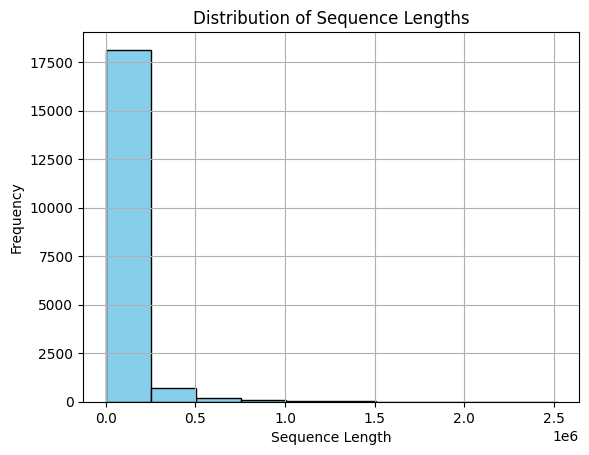

In [161]:
import pandas as pd 
df = pd.read_csv("final_output.csv")

import pandas as pd
import matplotlib.pyplot as plt


# Calculate the length of each sequence
df['sequence_length'] = df['Sequence'].apply(len)

# Plot the distribution of sequence lengths
plt.hist(df['sequence_length'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sequence Lengths')
plt.grid(True)
plt.show()


la plupart ont une longeure de 250 000 bp 

In [154]:
import pandas as pd


# Separate the value into multiple columns
df[['gene_info', 'sequence']] = df['Sequence'].str.split(pat = '\n', n = 1, expand = True)
df[['gene_id_true', 'chromosome_info']] = df['gene_info'].str.split(pat =' ',n= 1, expand = True)

# Remove '>ENSG00000186092.7' from the gene_id column
df['gene_id'] = df['gene_id'].str.replace('>', '')

# Remove '\n' from the sequence column
df['sequence'] = df['sequence'].str.replace('\n', '')

# Drop the intermediate columns
df = df.drop(columns=['Sequence', 'gene_info'])



df.rename(columns ={'Name' : 'gene_id_ver_dexter'}, inplace = True)
df.rename(columns ={'gene_id_true' : 'gene_id_ver_last'}, inplace = True)


df = df.copy()[['Description', 'gene_id_ver_dexter','gene_id_ver_last', 'gene_id', 'chromosome_info', 'sequence','Pituitary']]

df['gene_id_ver_last'] = df['gene_id_ver_last'].str.replace('^>', '', regex=True)


# Gencodev25 annotation data 

Read and format the gff annotation file

In [1]:
import pandas as pd

def parse_gff_to_dataframe_filtered(gff_file):
    """
    Parse a GFF file and return a DataFrame representing the features, filtered by gene_type.
    """
    gff_columns = ['start', 'end', 'attributes']
    features = []

    with open(gff_file, 'r') as f:
        count = 0
        for line in f:
            if not line.startswith('#'):  # Ignore comment lines
                fields = line.strip().split('\t')
                if len(fields) == 9:
                    attributes_dict = dict(item.split('=') for item in fields[8].split(';'))
                    # Check if the 'gene_type' attribute exists and is equal to 'protein_coding'
                    if 'gene_type' in attributes_dict and attributes_dict['gene_type'] == 'protein_coding':
                        features.append([int(fields[3]), int(fields[4]), attributes_dict])

    return pd.DataFrame(features, columns=gff_columns)

# Example usage:
gff_file = 'gencode.v25.annotation.gff3'
df_filtered = parse_gff_to_dataframe_filtered(gff_file)

df_filtered = pd.concat([df_filtered.drop(['attributes'], axis=1), pd.json_normalize(df_filtered['attributes'])], axis=1)
df_filtered_ = df_filtered.copy()[['start','gene_id', 'end', 'ID', 'gene_name']]
df_filtered_.sort_values(by = 'start', inplace = True)
df_filtered_.drop_duplicates('gene_id', inplace = True)
df_filtered_

start             gene_id        end  \
2353458       3307   ENSG00000198888.2       4262   
2353462       4470   ENSG00000198763.3       5511   
2353466       5904   ENSG00000198804.2       7445   
2353475       7586   ENSG00000198712.1       7588   
2353481       8366   ENSG00000228253.1       8368   
...            ...                 ...        ...   
212329   248718649   ENSG00000259823.5  248718807   
212352   248810446  ENSG00000175137.10  248812370   
212385   248838210  ENSG00000171161.12  248849517   
212474   248850006  ENSG00000171163.15  248859072   
212802   248906196  ENSG00000185220.11  248906342   

                                    ID gene_name  
2353458              ENSG00000198888.2    MT-ND1  
2353462              ENSG00000198763.3    MT-ND2  
2353466              ENSG00000198804.2    MT-CO1  
2353475  start_codon:ENST00000361739.1    MT-CO2  
2353481  start_codon:ENST00000361851.1   MT-ATP8  
...                                ...       ...  
212329          UTR3:ENST00000566597.5     LYPD8  
212352        exon:ENST00000484202.2:2   SH3BP5L  
212385              ENSG00000171161.12    ZNF672  
212474               ENST00000306601.8    ZNF692  
212802          UTR5:ENST00000355360.8     PGBD2  

[19932 rows x 5 columns]

In [8]:
df = pd.read_csv("sequence_prot_pit_exp.csv", index_col = None)
df.drop(columns =["Unnamed: 0"],  inplace = True)
merge = pd.merge(df, df_filtered_[['start', 'gene_name']], left_on = 'Description', right_on = 'gene_name')

In [9]:
import pandas as pd

# Supposons que votre DataFrame s'appelle df et que la colonne contenant les informations sur le chromosome s'appelle "chromosome_info"

# Formatter la colonne chromosome_info
merge[['info_1', 'info_2', 'chromosome', 'gene_start', 'gene_end', 'strand']] = merge['chromosome_info'].str.split(':', expand=True)

# Supprimer les colonnes d'information inutiles
merge.drop(columns=['info_1', 'info_2'], inplace=True)

# Afficher le DataFrame avec la colonne de chromosome_info formatée
merge

Description  gene_id_ver_dexter    gene_id_ver_last          gene_id  \
0           OR4F5   ENSG00000186092.4   ENSG00000186092.7  ENSG00000186092   
1          SAMD11  ENSG00000187634.11  ENSG00000187634.13  ENSG00000187634   
2           NOC2L  ENSG00000188976.10  ENSG00000188976.11  ENSG00000188976   
3          KLHL17  ENSG00000187961.13  ENSG00000187961.15  ENSG00000187961   
4         PLEKHN1  ENSG00000187583.10  ENSG00000187583.11  ENSG00000187583   
...           ...                 ...                 ...              ...   
18893     MT-ND4L   ENSG00000212907.2   ENSG00000212907.2  ENSG00000212907   
18894      MT-ND4   ENSG00000198886.2   ENSG00000198886.2  ENSG00000198886   
18895      MT-ND5   ENSG00000198786.2   ENSG00000198786.2  ENSG00000198786   
18896      MT-ND6   ENSG00000198695.2   ENSG00000198695.2  ENSG00000198695   
18897      MT-CYB   ENSG00000198727.2   ENSG00000198727.2  ENSG00000198727   

                            chromosome_info  \
0         chromosome:GRCh38:1:65419:71585:1   
1       chromosome:GRCh38:1:923923:944575:1   
2      chromosome:GRCh38:1:944203:959309:-1   
3       chromosome:GRCh38:1:960584:965719:1   
4       chromosome:GRCh38:1:966482:975865:1   
...                                     ...   
18893    chromosome:GRCh38:MT:10470:10766:1   
18894    chromosome:GRCh38:MT:10760:12137:1   
18895    chromosome:GRCh38:MT:12337:14148:1   
18896   chromosome:GRCh38:MT:14149:14673:-1   
18897    chromosome:GRCh38:MT:14747:15887:1   

                                                sequence     Pituitary  \
0      CCCAGATCTCTTCAGGTACATCTAGTCCATTCATAAAGGGCTTTTA...      0.036633   
1      GGCGGCGGAGTCTCCCAAGTCCCCGCCGGGCGGGCGCGCGCCAGTG...     33.268600   
2      GGCGGCGGAAGTGCGCAGCCGCGCGGCATTCTGGGGCCGGAAGTGG...     56.967000   
3      GGGAGTGAGCGACACAGAGCGGGCCGCCACCGCCGAGCAGCCCTCC...     20.749000   
4      AGGAGGCTGTGGACAGGGACCCAGACTTGCCGACCTGTACGACTCT...      0.600868   
...                                                  ...           ...   
18893  ATGCCCCTCATTTACATAAATATTATACTAGCATTTACCATCTCAC...  10115.600000   
18894  ATGCTAAAACTAATCGTCCCAACAATTATATTACTACCACTGACAT...  23334.500000   
18895  ATAACCATGCACACTACTATAACCACCCTAACCCTGACTTCCCTAA...   2845.680000   
18896  ATGATGTATGCTTTGTTTCTGTTGAGTGTGGGTTTAGTAATGGGGT...   2028.050000   
18897  ATGACCCCAATACGCAAAACTAACCCCCTAATAAAATTAATTAACC...  19925.500000   

        start gene_name chromosome gene_start gene_end strand  
0       69091     OR4F5          1      65419    71585      1  
1      923928    SAMD11          1     923923   944575      1  
2      944204     NOC2L          1     944203   959309     -1  
3      960587    KLHL17          1     960584   965719      1  
4      966497   PLEKHN1          1     966482   975865      1  
...       ...       ...        ...        ...      ...    ...  
18893   10470   MT-ND4L         MT      10470    10766      1  
18894   10760    MT-ND4         MT      10760    12137      1  
18895   12337    MT-ND5         MT      12337    14148      1  
18896   14149    MT-ND6         MT      14149    14673     -1  
18897   14747    MT-CYB         MT      14747    15887      1  

[18898 rows x 13 columns]

In [12]:
merge.to_csv("tss_sequence_prot_pit_exp.csv")

# Get sequence of size 4000 around the TSS

In [1]:
import pandas as pd
df = pd.read_csv("tss_sequence_prot_pit_exp.csv")

In [2]:
df

Unnamed: 0 Description  gene_id_ver_dexter    gene_id_ver_last  \
0               0       OR4F5   ENSG00000186092.4   ENSG00000186092.7   
1               1      SAMD11  ENSG00000187634.11  ENSG00000187634.13   
2               2       NOC2L  ENSG00000188976.10  ENSG00000188976.11   
3               3      KLHL17  ENSG00000187961.13  ENSG00000187961.15   
4               4     PLEKHN1  ENSG00000187583.10  ENSG00000187583.11   
...           ...         ...                 ...                 ...   
18893       18893     MT-ND4L   ENSG00000212907.2   ENSG00000212907.2   
18894       18894      MT-ND4   ENSG00000198886.2   ENSG00000198886.2   
18895       18895      MT-ND5   ENSG00000198786.2   ENSG00000198786.2   
18896       18896      MT-ND6   ENSG00000198695.2   ENSG00000198695.2   
18897       18897      MT-CYB   ENSG00000198727.2   ENSG00000198727.2   

               gene_id                       chromosome_info  \
0      ENSG00000186092     chromosome:GRCh38:1:65419:71585:1   
1      ENSG00000187634   chromosome:GRCh38:1:923923:944575:1   
2      ENSG00000188976  chromosome:GRCh38:1:944203:959309:-1   
3      ENSG00000187961   chromosome:GRCh38:1:960584:965719:1   
4      ENSG00000187583   chromosome:GRCh38:1:966482:975865:1   
...                ...                                   ...   
18893  ENSG00000212907    chromosome:GRCh38:MT:10470:10766:1   
18894  ENSG00000198886    chromosome:GRCh38:MT:10760:12137:1   
18895  ENSG00000198786    chromosome:GRCh38:MT:12337:14148:1   
18896  ENSG00000198695   chromosome:GRCh38:MT:14149:14673:-1   
18897  ENSG00000198727    chromosome:GRCh38:MT:14747:15887:1   

                                                sequence     Pituitary  \
0      CCCAGATCTCTTCAGGTACATCTAGTCCATTCATAAAGGGCTTTTA...      0.036633   
1      GGCGGCGGAGTCTCCCAAGTCCCCGCCGGGCGGGCGCGCGCCAGTG...     33.268600   
2      GGCGGCGGAAGTGCGCAGCCGCGCGGCATTCTGGGGCCGGAAGTGG...     56.967000   
3      GGGAGTGAGCGACACAGAGCGGGCCGCCACCGCCGAGCAGCCCTCC...     20.749000   
4      AGGAGGCTGTGGACAGGGACCCAGACTTGCCGACCTGTACGACTCT...      0.600868   
...                                                  ...           ...   
18893  ATGCCCCTCATTTACATAAATATTATACTAGCATTTACCATCTCAC...  10115.600000   
18894  ATGCTAAAACTAATCGTCCCAACAATTATATTACTACCACTGACAT...  23334.500000   
18895  ATAACCATGCACACTACTATAACCACCCTAACCCTGACTTCCCTAA...   2845.680000   
18896  ATGATGTATGCTTTGTTTCTGTTGAGTGTGGGTTTAGTAATGGGGT...   2028.050000   
18897  ATGACCCCAATACGCAAAACTAACCCCCTAATAAAATTAATTAACC...  19925.500000   

        start gene_name chromosome  gene_start  gene_end  strand  
0       69091     OR4F5          1       65419     71585       1  
1      923928    SAMD11          1      923923    944575       1  
2      944204     NOC2L          1      944203    959309      -1  
3      960587    KLHL17          1      960584    965719       1  
4      966497   PLEKHN1          1      966482    975865       1  
...       ...       ...        ...         ...       ...     ...  
18893   10470   MT-ND4L         MT       10470     10766       1  
18894   10760    MT-ND4         MT       10760     12137       1  
18895   12337    MT-ND5         MT       12337     14148       1  
18896   14149    MT-ND6         MT       14149     14673      -1  
18897   14747    MT-CYB         MT       14747     15887       1  

[18898 rows x 14 columns]

In [ ]:
import requests
import os 
import pandas as pd
import time
def get_sequence(chromosome, start, end):
    server = "https://rest.ensembl.org"
    ext = "/sequence/region/human/{0}:{1}..{2}:1?content-type=text/plain".format(chromosome, start, end)

    r = requests.get(server+ext)

    if not r.ok:
        return "Failed"  # Return "Failed" if sequence retrieval fails

    return r.text

# # Exemple d'utilisation :
# chromosome = "1"
# start = 10000
# end = 20000

# sequence = get_sequence(chromosome, start, end)
# print(sequence)
def process_csv_with_checkpoints(file_path, checkpoint_interval=64, timeout_interval=60):
    # Check if there are any existing checkpoint files
    checkpoint_files = [f for f in os.listdir('.') if f.startswith('checkpoint_output_')]
    if checkpoint_files:
        last_checkpoint_file = sorted(checkpoint_files)[-1]
        last_checkpoint_index = int(last_checkpoint_file.split('_')[-1].split('.')[0])
        print("Last checkpoint file found:", last_checkpoint_file)
        print("Resuming from index:", last_checkpoint_index)
        df = pd.read_csv(last_checkpoint_file)
    else:
        print("No checkpoint files found. Starting from the beginning.")
        # Read the entire CSV file
        df = pd.read_csv(file_path)

    # Add a new column to store the sequences if it doesn't exist
    if 'sequence_in_interval' not in df.columns:
        df['sequence_in_interval'] = ""

    total_genes = len(df)
    processed_genes = 0

    # Iterate over each gene ID starting from the last checkpoint index
    for i, row in df.iterrows():
        sequence = get_sequence(row['chromosome'], row['start'] - 2000, row['start'] + 2000 )
        if sequence:
            df.at[i, 'sequence_in_interval'] = sequence
        else:
            df.at[i, 'sequence_in_interval'] = "Failed"

        processed_genes += 1

        # Print progress
        if processed_genes % checkpoint_interval == 0:
            # Save the DataFrame to a new CSV file with a checkpoint name
            checkpoint_file = 'checkpoint_output_{:06d}.csv'.format(processed_genes)
            df.to_csv(checkpoint_file, index=False)

            # Introduce a timeout interval after every batch of retrievals
            print("Pausing for {} seconds...".format(timeout_interval))
            time.sleep(timeout_interval)

        print("Processed {} out of {} gene IDs ({:.2%} complete)".format(processed_genes, total_genes, processed_genes / total_genes))

    # Save the final DataFrame to a new CSV file
    df.to_csv('final_output.csv', index=False)

    # Print completion message
    print("Sequence retrieval completed for all gene IDs.")

# Example usage: Replace 'file_path.csv' with the path to your CSV file
process_csv_with_checkpoints('tss_sequence_prot_pit_exp.csv')




# Processing the data to DNABERT2 format 

In [1]:
import pandas as pd 
df = pd.read_csv("2000_tss_2000_sequence_prot_pit_exp.csv")
df.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0'], inplace = True) 

expression = pd.read_csv('GTEx_gene_median_7tissues.tsv', sep='\t')
expression = expression[['gene', 'Pituitary']]
expression['gene_id'] = expression['gene'].apply(lambda x: x.split('.')[0])

expression.rename(columns = {"Pituitary" : "correct_Pituitary"}, inplace = True)

merge = pd.merge(df, expression, how = 'left', on = 'gene_id')

In [4]:
merge.drop(columns = ['Pituitary'], inplace = True)
merge.rename(columns = {'correct_Pituitary' : 'Pituitary'}, inplace = True)

In [5]:
df = merge.copy()[['sequence_in_interval', 'Pituitary', 'gene_id_ver_last']]

In [7]:
df.to_csv('protein_coding_expression_pituitary_human.csv')

# Explication de pourquoi il y'a une difference entre mon dataset et le leur 

In [4]:
import pandas as pd 
mine= pd.read_csv("human_genes_expression_pit/created_by_me/2000_tss_2000_sequence_prot_pit_exp.csv", index_col = 0)

In [5]:
mine

Unnamed: 0 Description  gene_id_ver_dexter    gene_id_ver_last  \
0               0       OR4F5   ENSG00000186092.4   ENSG00000186092.7   
1               1      SAMD11  ENSG00000187634.11  ENSG00000187634.13   
2               2       NOC2L  ENSG00000188976.10  ENSG00000188976.11   
3               3      KLHL17  ENSG00000187961.13  ENSG00000187961.15   
4               4     PLEKHN1  ENSG00000187583.10  ENSG00000187583.11   
...           ...         ...                 ...                 ...   
18747       18747       VMA21  ENSG00000160131.13  ENSG00000160131.14   
18748       18748       PASD1  ENSG00000166049.10  ENSG00000166049.11   
18749       18749       PRRG3  ENSG00000130032.15  ENSG00000130032.17   
18750       18750       FATE1  ENSG00000147378.11  ENSG00000147378.11   
18751       18751       CNGA2   ENSG00000183862.5   ENSG00000183862.6   

               gene_id                            chromosome_info  \
0      ENSG00000186092          chromosome:GRCh38:1:65419:71585:1   
1      ENSG00000187634        chromosome:GRCh38:1:923923:944575:1   
2      ENSG00000188976       chromosome:GRCh38:1:944203:959309:-1   
3      ENSG00000187961        chromosome:GRCh38:1:960584:965719:1   
4      ENSG00000187583        chromosome:GRCh38:1:966482:975865:1   
...                ...                                        ...   
18747  ENSG00000160131  chromosome:GRCh38:X:151396515:151409364:1   
18748  ENSG00000166049  chromosome:GRCh38:X:151563675:151676739:1   
18749  ENSG00000130032  chromosome:GRCh38:X:151694607:151705924:1   
18750  ENSG00000147378  chromosome:GRCh38:X:151716035:151723194:1   
18751  ENSG00000183862  chromosome:GRCh38:X:151734746:151745564:1   

                                                sequence  Pituitary  \
0      CCCAGATCTCTTCAGGTACATCTAGTCCATTCATAAAGGGCTTTTA...   0.036633   
1      GGCGGCGGAGTCTCCCAAGTCCCCGCCGGGCGGGCGCGCGCCAGTG...  33.268600   
2      GGCGGCGGAAGTGCGCAGCCGCGCGGCATTCTGGGGCCGGAAGTGG...  56.967000   
3      GGGAGTGAGCGACACAGAGCGGGCCGCCACCGCCGAGCAGCCCTCC...  20.749000   
4      AGGAGGCTGTGGACAGGGACCCAGACTTGCCGACCTGTACGACTCT...   0.600868   
...                                                  ...        ...   
18747  GGCTTTCTGAGCAGCTGCAAAATATGTTTTTAACTTTTAAGTGGAA...  20.719600   
18748  GCACTCTGGGGCCCACGCACTTCCCTGAAGAGTCTAGAAGCTGCTC...   0.000000   
18749  AGTCATTGGCGGAACGCGGCCTCGACTCGGTCCTTCTTCTGAGGGC...   1.683470   
18750  AGAGGTGATTTTCTGAGTGTGACTCCTCTGTTCCTGGCACCCTGTG...   0.848657   
18751  AGTAGACTCTATTATTTCAAGAAAGATGGCGTGGATAAACTGTTAG...   0.000000   

           start gene_name chromosome  gene_start   gene_end  strand  \
0          69091     OR4F5          1       65419      71585       1   
1         923928    SAMD11          1      923923     944575       1   
2         944204     NOC2L          1      944203     959309      -1   
3         960587    KLHL17          1      960584     965719       1   
4         966497   PLEKHN1          1      966482     975865       1   
...          ...       ...        ...         ...        ...     ...   
18747  151396515     VMA21          X   151396515  151409364       1   
18748  151563622     PASD1          X   151563675  151676739       1   
18749  151695124     PRRG3          X   151694607  151705924       1   
18750  151716035     FATE1          X   151716035  151723194       1   
18751  151738451     CNGA2          X   151734746  151745564       1   

                                    sequence_in_interval  
0      TTAAGGTCTATTCTAAATTGCACACTTTGATTCAAAAGAAACAGTC...  
1      AGAACATCAGGGAGTGGACAGTGAGGATAGAGGGGTGCCTCCAGCT...  
2      TCAGGCCCCCCTTCCTGGGGGTGCCCTCGGCTCTGTGCCAGACCCC...  
3      ACTCTCTCTTCAGCCCCTCTGTCCTTCCTTTCCCTCCCCAGCACTT...  
4      CCTGGGAAAGCGTGGCGCCCATGAATATCCGCAGGTCCGCAGTGGG...  
...                                                  ...  
18747  GTGTTTAGACTACTGTTATGGGTTGAATTGCTGGCCCGGTCACCCA...  
18748  AGCGAAAGGGGTCCGATGGTACTCACTGCTTGGCGATAGGCGATAA...  
18749  CAAATGAACACAAGGTAGCTGGATGCAGGCCAGCTGATGTGCATT

In [8]:
dex = pd.read_csv("human_genes_expression_pit/send_by_dexter_guys /ncbiRefSeqCurated.hg19.2kb.around.geneStart.ENSEMBLgeneID.fa.csv")

In [9]:
dex['gene_id'] = dex['Gene ID'].str.split(".", n=1).str.get(0)


In [10]:
missing = dex[dex['gene_id'].isin(set(dex['gene_id']) - set(mine['gene_id']))].copy()

In [12]:
all = pd.read_csv("human_genes_expression_pit/created_by_me/final_result.csv")

In [13]:
all

Name     Pituitary  Description          gene_id  \
0      ENSG00000223972.5      0.000000      DDX11L1  ENSG00000223972   
1      ENSG00000227232.5      5.425460       WASH7P  ENSG00000227232   
2      ENSG00000278267.1      0.000000    MIR6859-1  ENSG00000278267   
3      ENSG00000243485.5      0.000000  MIR1302-2HG  ENSG00000243485   
4      ENSG00000237613.2      0.000000      FAM138A  ENSG00000237613   
...                  ...           ...          ...              ...   
54587  ENSG00000198695.2   2028.050000       MT-ND6  ENSG00000198695   
54588  ENSG00000210194.1      3.642400        MT-TE  ENSG00000210194   
54589  ENSG00000198727.2  19925.500000       MT-CYB  ENSG00000198727   
54590  ENSG00000210195.2      0.000000        MT-TT  ENSG00000210195   
54591  ENSG00000210196.2      0.575686        MT-TP  ENSG00000210196   

                                  biotype error  
0      transcribed_unprocessed_pseudogene   NaN  
1                  unprocessed_pseudogene   NaN  
2                                   miRNA   NaN  
3                                  lncRNA   NaN  
4                                  lncRNA   NaN  
...                                   ...   ...  
54587                      protein_coding   NaN  
54588                             Mt_tRNA   NaN  
54589                      protein_coding   NaN  
54590                             Mt_tRNA   NaN  
54591                             Mt_tRNA   NaN  

[54592 rows x 6 columns]

In [14]:
all[all.gene_id == "ENSG00000272060"]

Empty DataFrame
Columns: [Name, Pituitary, Description, gene_id, biotype, error]
Index: []

In [15]:
all

Name     Pituitary  Description          gene_id  \
0      ENSG00000223972.5      0.000000      DDX11L1  ENSG00000223972   
1      ENSG00000227232.5      5.425460       WASH7P  ENSG00000227232   
2      ENSG00000278267.1      0.000000    MIR6859-1  ENSG00000278267   
3      ENSG00000243485.5      0.000000  MIR1302-2HG  ENSG00000243485   
4      ENSG00000237613.2      0.000000      FAM138A  ENSG00000237613   
...                  ...           ...          ...              ...   
54587  ENSG00000198695.2   2028.050000       MT-ND6  ENSG00000198695   
54588  ENSG00000210194.1      3.642400        MT-TE  ENSG00000210194   
54589  ENSG00000198727.2  19925.500000       MT-CYB  ENSG00000198727   
54590  ENSG00000210195.2      0.000000        MT-TT  ENSG00000210195   
54591  ENSG00000210196.2      0.575686        MT-TP  ENSG00000210196   

                                  biotype error  
0      transcribed_unprocessed_pseudogene   NaN  
1                  unprocessed_pseudogene   NaN  
2                                   miRNA   NaN  
3                                  lncRNA   NaN  
4                                  lncRNA   NaN  
...                                   ...   ...  
54587                      protein_coding   NaN  
54588                             Mt_tRNA   NaN  
54589                      protein_coding   NaN  
54590                             Mt_tRNA   NaN  
54591                             Mt_tRNA   NaN  

[54592 rows x 6 columns]

In [16]:
zyada = all[all['gene_id'].isin(set(missing.gene_id))].copy()

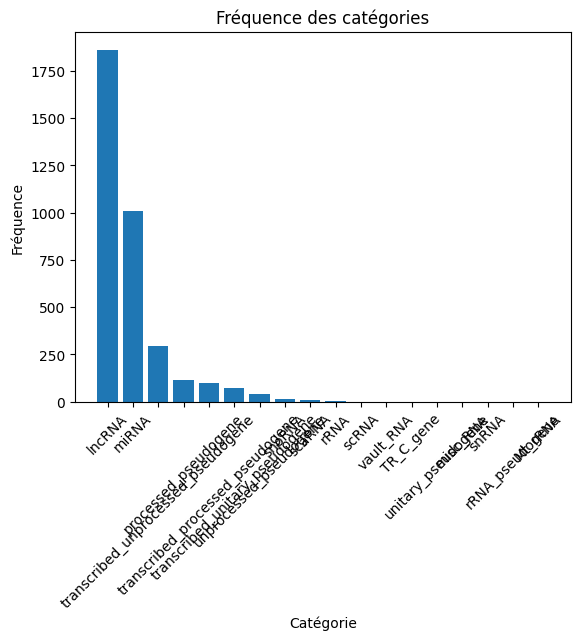

In [46]:
import matplotlib.pyplot as plt

# Supposons que 'df' soit votre DataFrame et 'categorie_colonne' soit la colonne contenant les catégories
# Remplacez 'df' et 'categorie_colonne' par les noms réels de votre DataFrame et de la colonne

# Compter les occurrences de chaque catégorie
categorie_counts = zyada["biotype"].value_counts()

# Créer un histogramme
plt.bar(categorie_counts.index, categorie_counts.values)

# Ajouter des étiquettes et un titre
plt.xlabel('Catégorie')
plt.ylabel('Fréquence')
plt.title('Fréquence des catégories')

# Afficher l'histogramme
plt.xticks(rotation=45)  # Pour faire pivoter les étiquettes sur l'axe x si nécessaire
plt.show()


In [47]:
zyada.biotype.unique()

array(['transcribed_unprocessed_pseudogene', 'unprocessed_pseudogene',
       'lncRNA', 'processed_pseudogene', 'miRNA',
       'transcribed_processed_pseudogene',
       'transcribed_unitary_pseudogene', nan, 'scaRNA', 'snoRNA', 'rRNA',
       'scRNA', 'vault_RNA', 'TR_C_gene', 'unitary_pseudogene',
       'misc_RNA', 'snRNA', 'rRNA_pseudogene', 'Mt_rRNA'], dtype=object)

In [17]:
zyada 

Name     Pituitary  Description          gene_id  \
0      ENSG00000223972.5      0.000000      DDX11L1  ENSG00000223972   
1      ENSG00000227232.5      5.425460       WASH7P  ENSG00000227232   
3      ENSG00000243485.5      0.000000  MIR1302-2HG  ENSG00000243485   
4      ENSG00000237613.2      0.000000      FAM138A  ENSG00000237613   
9      ENSG00000233750.3      0.085154       CICP27  ENSG00000233750   
...                  ...           ...          ...              ...   
54496  ENSG00000223641.1      0.000000      TTTY17C  ENSG00000223641   
54503  ENSG00000172297.7      0.000000    GOLGA2P3Y  ENSG00000172297   
54515  ENSG00000172288.7      0.000000         CDY1  ENSG00000172288   
54522  ENSG00000231141.1      0.000000        TTTY3  ENSG00000231141   
54558  ENSG00000210082.2  10983.500000      MT-RNR2  ENSG00000210082   

                                  biotype error  
0      transcribed_unprocessed_pseudogene   NaN  
1                  unprocessed_pseudogene   NaN  
3                                  lncRNA   NaN  
4                                  lncRNA   NaN  
9                    processed_pseudogene   NaN  
...                                   ...   ...  
54496                              lncRNA   NaN  
54503              unprocessed_pseudogene   NaN  
54515                      protein_coding   NaN  
54522                              lncRNA   NaN  
54558                             Mt_rRNA   NaN  

[3849 rows x 6 columns]

# Get the complete sequence 

In [ ]:
!pip install pyensembl

In [7]:
from pyensembl import EnsemblRelease, Genome

# Set the Ensembl release version
data = EnsemblRelease(111)

In [9]:
import pandas as pd
from pyensembl import EnsemblRelease
import os

# Initialisez l'objet EnsemblRelease avec la version de la base de données Ensembl
data = EnsemblRelease(111)

# Définissez la fonction pour récupérer la séquence en fonction de l'ID
def get_sequence(gene_id):
    # Vous pouvez remplacer 'gene' par 'transcript' ou 'protein' selon vos besoins
    try:
        sequence = data.gene_by_id(gene_id).sequence
        return sequence
    except:
        return None

def retrieve_sequences(input_csv, output_csv, checkpoint_csv="checkpoint.csv", batch_size=100):
    # Vérifiez s'il existe un fichier de checkpoint
    if os.path.exists(checkpoint_csv):
        # Si le fichier de checkpoint existe et contient des données, chargez le dernier gene_id traité
        checkpoint_df = pd.read_csv(checkpoint_csv)
        if not checkpoint_df.empty:
            last_checkpoint = checkpoint_df['last_gene_id'].iloc[-1]
        else:
            last_checkpoint = None
    else:
        last_checkpoint = None

    # Ouvrez un itérateur pour lire le fichier CSV en lot
    reader = pd.read_csv(input_csv, chunksize=batch_size)

    # Ouvrez un fichier CSV pour écrire les résultats
    with open(output_csv, "w") as output_file:
        # Parcourez chaque lot du DataFrame
        for index, batch in enumerate(reader):
            # Si nous avons atteint le dernier checkpoint, nous reprenons à partir de là
            if last_checkpoint is not None and last_checkpoint in batch['gene_id'].values:
                last_checkpoint = None
                continue

            # Ajoutez une colonne 'sequence' pour stocker les séquences récupérées
            batch['sequence'] = batch['gene_id'].apply(get_sequence)

            # Écrivez le lot dans le fichier de sortie
            batch.to_csv(output_file, index=False, header=not os.path.exists(output_csv), mode='a')

            # Sauvegardez le checkpoint après chaque lot traité
            checkpoint_df = pd.DataFrame({'last_gene_id': [batch['gene_id'].iloc[-1]]})
            checkpoint_df.to_csv(checkpoint_csv, index=False, header=not os.path.exists(checkpoint_csv), mode='a')

            # Affichez la progression dans le terminal
            print(f"Processed batch {index + 1}")

    # Supprimez le fichier de checkpoint une fois le traitement terminé
    if os.path.exists(checkpoint_csv):
        os.remove(checkpoint_csv)

# Exemple d'utilisation
input_csv = "gene_prot_pit_exp.csv"  # Chemin vers votre fichier CSV d'entrée
output_csv = "output.csv"  # Chemin vers votre fichier CSV de sortie
checkpoint_csv = "checkpoint.csv"  # Chemin vers votre fichier CSV de checkpoint
retrieve_sequences(input_csv, output_csv, checkpoint_csv)


EmptyDataError: No columns to parse from file

In [ ]:
import pandas as pd
from pyensembl import EnsemblRelease
import os

# Initialisez l'objet EnsemblRelease avec la version de la base de données Ensembl
data = EnsemblRelease(111)

# Définissez la fonction pour récupérer la séquence en fonction de l'ID
def get_sequence(gene_id):
    # Vous pouvez remplacer 'gene' par 'transcript' ou 'protein' selon vos besoins
    try:
        sequence = data.gene_by_id(gene_id).sequence
        return sequence
    except:
        print("jeaime")
        return None

In [ ]:

def retrieve_sequences(input_csv, output_csv, checkpoint_csv="checkpoint.csv", batch_size=100):
    # Vérifiez s'il existe un fichier de checkpoint
    if os.path.exists(checkpoint_csv) and os.path.getsize(checkpoint_csv) > 0:
        # Si le fichier de checkpoint existe et contient des données, chargez le dernier gene_id traité
        checkpoint_df = pd.read_csv(checkpoint_csv)
        last_checkpoint = checkpoint_df['last_gene_id'].iloc[-1] if not checkpoint_df.empty else None
    else:
        last_checkpoint = None

    # Ouvrez un itérateur pour lire le fichier CSV en lot
    reader = pd.read_csv(input_csv, chunksize=batch_size)

    # Ouvrez un fichier CSV pour écrire les résultats
    with open(output_csv, "w") as output_file:
        # Parcourez chaque lot du DataFrame
        for index, batch in enumerate(reader):
            # Si nous avons atteint le dernier checkpoint, nous reprenons à partir de là
            if last_checkpoint is not None and last_checkpoint in batch['gene_id'].values:
                last_checkpoint = None
                continue

            # Ajoutez une colonne 'sequence' pour stocker les séquences récupérées
            batch['sequence'] = batch['gene_id'].apply(get_sequence)

            # Écrivez le lot dans le fichier de sortie
            batch.to_csv(output_file, index=False, header=not os.path.exists(output_csv), mode='a')

            # Sauvegardez le checkpoint après chaque lot traité
            checkpoint_df = pd.DataFrame({'last_gene_id': [batch['gene_id'].iloc[-1]]})
            checkpoint_df.to_csv(checkpoint_csv, index=False, header=not os.path.exists(checkpoint_csv), mode='a')

            # Affichez la progression dans le terminal
            print(f"Processed batch {index + 1}")

    # Supprimez le fichier de checkpoint une fois le traitement terminé
    if os.path.exists(checkpoint_csv):
        os.remove(checkpoint_csv)

# Exemple d'utilisation
input_csv = "gene_prot_pit_exp.csv"  # Chemin vers votre fichier CSV d'entrée
output_csv = "output.csv"  # Chemin vers votre fichier CSV de sortie
checkpoint_csv = "checkpoint.csv"  # Chemin vers votre fichier CSV de checkpoint
retrieve_sequences(input_csv, output_csv, checkpoint_csv)


In [11]:
get_sequence("ENSG00000186092")

# construction du dataset d'entrainement pour refaire les resultats de dexter avec dnabert avec les memes données 

In [11]:
import pandas as pd 
fasta = pd.read_csv("ncbiRefSeqCurated.hg19.2kb.around.geneStart.ENSEMBLgeneID.fa.csv")
fasta['Sequence'] = fasta['Sequence'].str.upper()

In [12]:
expression = pd.read_csv("DExTER/example/my_experience_human/data/Pituitary.data", sep = " ", names=["Gene ID", "Pituitary"])
expression

Gene ID  Pituitary
0      ENSG00000223972.4  -1.317223
1      ENSG00000227232.4   1.199755
2      ENSG00000243485.2  -1.342084
3      ENSG00000237613.2  -1.529590
4      ENSG00000186092.4  -1.410385
...                  ...        ...
22405  ENSG00000223641.1  -3.000000
22406  ENSG00000172297.6  -3.000000
22407  ENSG00000172288.6  -3.000000
22408  ENSG00000231141.1  -3.000000
22409  ENSG00000210082.2   4.000868

[22410 rows x 2 columns]

In [13]:
data = pd.merge(expression, fasta, on = "Gene ID")

In [14]:
data = data[["Sequence", "Pituitary", "Gene ID"]]

In [15]:
data

Sequence  Pituitary  \
0      NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...  -1.317223   
1      AAATCCCATTACAAATGGGGTGACTGAAGCTCCATTCATGGCTTGC...   1.199755   
2      TGGACAGACAGTAACTAGTTGAGAAGACAGGGGATTTTGTTGGCGG...  -1.342084   
3      CTCCTGTCAAACCCACGTGGAAGGCAGGCTCTGGGCTGTGTTACTG...  -1.529590   
4      TTAAGGTCTATTCTAAATTGCACACTTTGATTCAAAAGAAACAGTC...  -1.410385   
...                                                  ...        ...   
22405  GATGAAGCCCACTTGATCATTGTGGATAAGCTTTTTGATGTGCTGT...  -3.000000   
22406  TGTGAATAGTGCCACAATAAACATACGTGTGCATGTGTCTTTATAG...  -3.000000   
22407  CTGTTTTTGTATCAGTCAGTGGCCCATCCTTCGGAATAGGTGCATC...  -3.000000   
22408  CCCGGGTTCACGCCATTCTCCTGCCTCAGCCTCCCAAGTAGCTGGG...  -3.000000   
22409  TAGCCCCATACCCCGAGCCAACCAAACCCCAAAGACACCCCATACA...   4.000868   

                 Gene ID  
0      ENSG00000223972.4  
1      ENSG00000227232.4  
2      ENSG00000243485.2  
3      ENSG00000237613.2  
4      ENSG00000186092.4  
...                  ...  
22405  ENSG00000223641.1  
22406  ENSG00000172297.6  
22407  ENSG00000172288.6  
22408  ENSG00000231141.1  
22409  ENSG00000210082.2  

[22410 rows x 3 columns]

In [6]:
# Assuming your DataFrame is named df
data = data[~data['Sequence'].astype(str).str.contains('N')]

# Printing the DataFrame after dropping the rows
data


Sequence  Pituitary  \
1      AAATCCCATTACAAATGGGGTGACTGAAGCTCCATTCATGGCTTGC...   1.199755   
2      TGGACAGACAGTAACTAGTTGAGAAGACAGGGGATTTTGTTGGCGG...  -1.342084   
3      CTCCTGTCAAACCCACGTGGAAGGCAGGCTCTGGGCTGTGTTACTG...  -1.529590   
4      TTAAGGTCTATTCTAAATTGCACACTTTGATTCAAAAGAAACAGTC...  -1.410385   
5      CAATTGGTGGGGGTGGGGGTTATTACTTTGGCCACCACAGTATTTT...  -0.772885   
...                                                  ...        ...   
22405  GATGAAGCCCACTTGATCATTGTGGATAAGCTTTTTGATGTGCTGT...  -3.000000   
22406  TGTGAATAGTGCCACAATAAACATACGTGTGCATGTGTCTTTATAG...  -3.000000   
22407  CTGTTTTTGTATCAGTCAGTGGCCCATCCTTCGGAATAGGTGCATC...  -3.000000   
22408  CCCGGGTTCACGCCATTCTCCTGCCTCAGCCTCCCAAGTAGCTGGG...  -3.000000   
22409  TAGCCCCATACCCCGAGCCAACCAAACCCCAAAGACACCCCATACA...   4.000868   

                 Gene ID  
1      ENSG00000227232.4  
2      ENSG00000243485.2  
3      ENSG00000237613.2  
4      ENSG00000186092.4  
5      ENSG00000233750.3  
...                  ...  
22405  ENSG00000223641.1  
22406  ENSG00000172297.6  
22407  ENSG00000172288.6  
22408  ENSG00000231141.1  
22409  ENSG00000210082.2  

[22401 rows x 3 columns]

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting into train (40%) and temp (60%)
train_df, temp_df = train_test_split(data, test_size=0.5, random_state=42)

# Splitting temp into test (25%) and dev (25%)
test_df, dev_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Checking the sizes of each set
print("Train set size:", len(train_df))
print("Test set size:", len(test_df))
print("Dev set size:", len(dev_df))

train_df.to_csv("human_dexter/train.csv" ,index=False)
test_df.to_csv("human_dexter/test.csv",index=False)
dev_df.to_csv("human_dexter/dev.csv",index=False)

## Refaire exactement le meme split 

In [22]:
import pandas as pd 
train_dex = pd.read_csv("DExTER/example/my_experience_human/training_set.log", names = ["gene_id_dex_version"])

data_train_dex = pd.merge(train_dex, data, how = "left", left_on = "gene_id_dex_version", right_on = "Gene ID")
data_train_dex = data_train_dex[['Sequence', 'Pituitary', 'gene_id_dex_version']]

from sklearn.model_selection import train_test_split

# Splitting into train (40%) and temp (60%)
train_df, dev_df = train_test_split(data_train_dex, test_size=0.13, random_state=42)


train_df.to_csv("exactly_the_same/train.csv" ,index=False)
dev_df.to_csv("exactly_the_same/dev.csv",index=False)


In [23]:
test_dex = pd.read_csv("DExTER/example/my_experience_human/testing_set.log", names = ["gene_id_dex_version"])
data_test_dex = pd.merge(test_dex, data, how = "left", left_on = "gene_id_dex_version", right_on = "Gene ID")
data_test_dex = data_test_dex[['Sequence', 'Pituitary', 'gene_id_dex_version']]

data_test_dex.to_csv("exactly_the_same/test.csv" ,index=False)


data_test_dex

Sequence  Pituitary  \
0     TGCCACTGCACTCCAGCCTGGGCCACAGAGCAAGATTCTGTCTCAA...   1.729974   
1     ACGTGACAGCTGCTGCAAGGGGCACGACCACTTCCCACACAGGTGT...   1.911956   
2     AGGAGTTCAAGACCAGCCTGGGCAACATAGTAAAAGCCCCTCTCTG...   0.429268   
3     CCACCGCATTTGAGCACGGGCAACAGAGTGAGACCCTGTCTTAAAA...   1.633771   
4     GTGCAATGGCGCGATCTCGGCTCACCGCAACATCTGCCTCCCGGGT...   1.327972   
...                                                 ...        ...   
7465  ATGGTGGCTCATGCCTCTAATCCCAGCACATTGGGAGGCCAAGGCA...   0.984707   
7466  CTGCACCCAGGTGAAATAAACAGCTTTATTGCTCACATAAATCCTG...  -3.000000   
7467  GCCTAATTTTCAGCTTAGCTAGATGCAGAATTACCTTAGTAATTTA...   1.628900   
7468  ACAGCCCAGGAGTGGAAGACCTCACGCTATGTGAAGCCACAGGGGC...  -3.000000   
7469  AATGCTGGTCGGTTGTGCCTAAACTCCACAGGGAGGGGATATAAGT...   2.194792   

     gene_id_dex_version  
0      ENSG00000179364.9  
1      ENSG00000168936.6  
2      ENSG00000141968.3  
3     ENSG00000101084.12  
4      ENSG00000119328.7  
...                  ...  
7465   ENSG00000090857.9  
7466   ENSG00000203985.6  
7467   ENSG00000197343.6  
7468   ENSG00000231532.1  
7469  ENSG00000185201.12  

[7470 rows x 3 columns]

# Investigation log transformation dexter et log transformation mine 

In [ ]:
pd.read_csv("human_dexter/dev.csv")

In [1]:
import pandas as pd 
dexter_log = pd.read_csv("DExTER/example/my_experience_human/data/Pituitary.data", sep = " " )
dexter_log


ENSG00000223972.4  -1.317223353685566
0      ENSG00000227232.4            1.199755
1      ENSG00000243485.2           -1.342084
2      ENSG00000237613.2           -1.529590
3      ENSG00000186092.4           -1.410385
4      ENSG00000233750.3           -0.772885
...                  ...                 ...
22404  ENSG00000223641.1           -3.000000
22405  ENSG00000172297.6           -3.000000
22406  ENSG00000172288.6           -3.000000
22407  ENSG00000231141.1           -3.000000
22408  ENSG00000210082.2            4.000868

[22409 rows x 2 columns]

In [2]:
dexter_log.sort_values("ENSG00000223972.4", inplace = True)

In [3]:
dexter_log

ENSG00000223972.4  -1.317223353685566
21931  ENSG00000000003.10            1.818424
21930   ENSG00000000005.5           -1.354381
20516   ENSG00000000419.8            1.658107
1675    ENSG00000000457.9            0.730217
1671   ENSG00000000460.12            0.255996
...                   ...                 ...
15336   ENSG00000273173.1            0.820595
490     ENSG00000273274.1            0.129690
20984   ENSG00000273311.1            0.274158
8064    ENSG00000273313.1            0.079543
9015    ENSG00000273344.1            1.311330

[22409 rows x 2 columns]

In [18]:
log = pd.read_csv("GTEx_gene_median_7tissues.tsv", sep = "\t")
log = log[['gene', 'Pituitary']]
log.sort_values("gene", inplace = True)

In [19]:
df = pd.merge(log, dexter_log, left_on = "gene", right_on = "ENSG00000223972.4")

In [20]:
df.drop("ENSG00000223972.4", axis = 1, inplace = True )
df.rename(columns = { "-1.317223353685566" : "dexter_transformation", "Pituitary" : "original"}, inplace = True)

In [21]:
!pip install plotly 

In [22]:
import plotly
import plotly.express as px


In [23]:
import numpy as np 
df['log_e'] = np.log(df['original'])

In [31]:
df['log_10'] = np.log(df['original'])/np.log(10)

In [33]:
def custom_log(x):
    return np.log(x) / np.log(100)

# Appliquer la fonction de transformation à la colonne spécifiée
df['log_100'] = df['original'].apply(custom_log)

In [36]:
df

gene  original  dexter_transformation     log_e  \
0      ENSG00000000003.10  65.83000               1.818424  4.187076   
1       ENSG00000000005.5   0.04422              -1.354381 -3.118578   
2       ENSG00000000419.8  45.51000               1.658107  3.817932   
3       ENSG00000000457.9   5.37300               0.730217  1.681386   
4      ENSG00000000460.12   1.80300               0.255996  0.589452   
...                   ...       ...                    ...       ...   
22404   ENSG00000273173.1   6.61600               0.820595  1.889491   
22405   ENSG00000273274.1   1.34800               0.129690  0.298622   
22406   ENSG00000273311.1   1.88000               0.274158  0.631272   
22407   ENSG00000273313.1   1.20100               0.079543  0.183155   
22408   ENSG00000273344.1  20.48000               1.311330  3.019449   

         log_10    log_20   log_100  
0      1.818424  1.397680  0.909212  
1     -1.354381 -1.041007 -0.677191  
2      1.658107  1.274457  0.829053  
3      0.730217  0.561261  0.365108  
4      0.255996  0.196764  0.127998  
...         ...       ...       ...  
22404  0.820595  0.630728  0.410298  
22405  0.129690  0.099682  0.064845  
22406  0.274158  0.210724  0.137079  
22407  0.079543  0.061138  0.039772  
22408  1.311330  1.007917  0.655665  

[22409 rows x 7 columns]

In [28]:
df[df['dexter_transformation'] != df['log_10']]

gene  original  dexter_transformation     log_e    log_10
1       ENSG00000000005.5   0.04422              -1.354381 -3.118578 -1.354381
2       ENSG00000000419.8  45.51000               1.658107  3.817932  1.658107
3       ENSG00000000457.9   5.37300               0.730217  1.681386  0.730217
4      ENSG00000000460.12   1.80300               0.255996  0.589452  0.255996
5       ENSG00000000938.8   3.25100               0.512017  1.178963  0.512017
...                   ...       ...                    ...       ...       ...
22404   ENSG00000273173.1   6.61600               0.820595  1.889491  0.820595
22405   ENSG00000273274.1   1.34800               0.129690  0.298622  0.129690
22406   ENSG00000273311.1   1.88000               0.274158  0.631272  0.274158
22407   ENSG00000273313.1   1.20100               0.079543  0.183155  0.079543
22408   ENSG00000273344.1  20.48000               1.311330  3.019449  1.311330

[16005 rows x 5 columns]

# split dataset and transform the expression column 

In [3]:
import pandas as pd
import numpy as np 
import os 
from sklearn.model_selection import train_test_split

# Suppose data is your dataset
df = pd.read_csv("protein_coding_expression_pituitary_human.csv")

import numpy as np 

df.drop("Unnamed: 0", axis = 1, inplace = True)

df.dropna(inplace = True)

df["Pituitary"] = np.log(df['Pituitary'])/np.log(10)




# Diviser les données en 85% pour l'entraînement et 15% pour le reste
train_data, temp_data = train_test_split(df, test_size=0.5, random_state=42)

# Diviser le reste (15%) en deux parties égales pour la validation et le test
validation_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Affichage des tailles des ensembles
print("Taille de l'ensemble d'entraînement :", len(train_data))
print("Taille de l'ensemble de validation :", len(validation_data))
print("Taille de l'ensemble de test :", len(test_data))

# Créer un dossier pour stocker les fichiers CSV
output_folder = "human_log_10"
os.makedirs(output_folder, exist_ok=True)

# Sauvegarder les ensembles de données dans des fichiers CSV
train_data.to_csv(os.path.join(output_folder, "train.csv"), index=False)
validation_data.to_csv(os.path.join(output_folder, "dev.csv"), index=False)
test_data.to_csv(os.path.join(output_folder, "test.csv"), index=False)

print("Les ensembles de données ont été sauvegardés dans le dossier 'train_dev_test'.")


Taille de l'ensemble d'entraînement : 9215
Taille de l'ensemble de validation : 4607
Taille de l'ensemble de test : 4608
Les ensembles de données ont été sauvegardés dans le dossier 'train_dev_test'.


In [ ]:
# Extraire la première ligne (en-tête) du fichier CSV d'origine
head -n 1 dev.csv > small_dev.csv

# Mélanger le reste des lignes (sans l'en-tête) et prendre 1308 échantillons
tail -n +2 dev.csv | shuf -n 1308 >> small_dev.csv


In [11]:
# Define the name of your text file
file_name = "your_file.txt"

# Initialize the total sum
total_sum = 0

# Open the file in read mode
with open(file_name, 'r') as file:
    # Iterate through each line of the file
    for line in file:
        # Split the line into words
        words = line.strip().split()
        # Iterate through each word
        for word in words:
            # Attempt to convert the word to a number
            try:
                number = float(word)
                # If successful, add it to the total sum
                total_sum += number
            except ValueError:
                # If conversion fails, continue to the next word
                continue

# Print the total sum
print("The sum of all numbers in the file is:", total_sum)


The sum of all numbers in the file is: 339449.6299999999


In [14]:
import matplotlib.pyplot as plt 


In [19]:
df = pd.read_csv("protein_coding_expression_pituitary_human.csv")


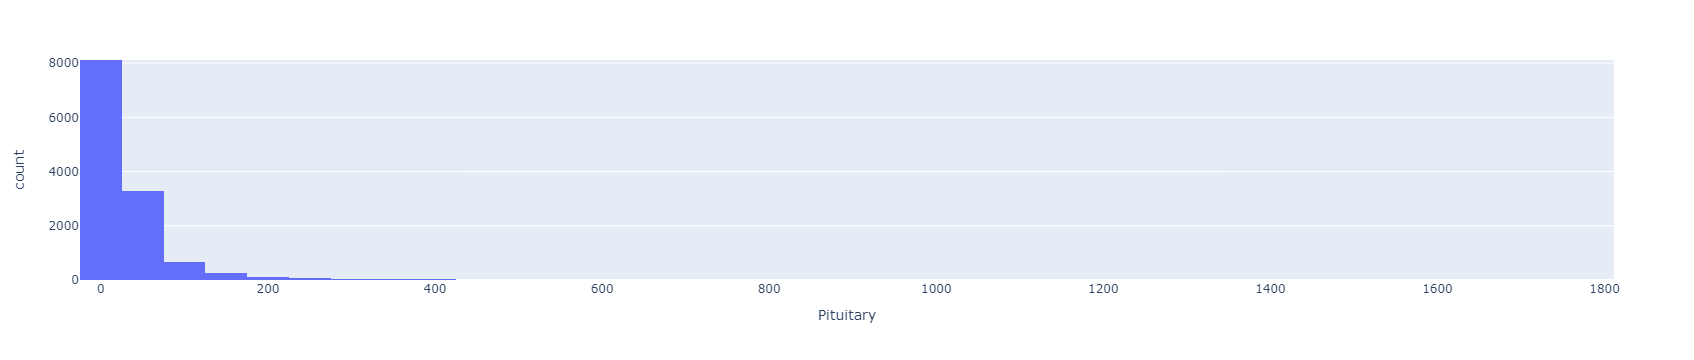

In [30]:
import plotly.express as px

fig = px.histogram(df, x="Pituitary")
fig.show()

In [32]:
df

Unnamed: 0                               sequence_in_interval  \
0               0  TTAAGGTCTATTCTAAATTGCACACTTTGATTCAAAAGAAACAGTC...   
1               1  AGAACATCAGGGAGTGGACAGTGAGGATAGAGGGGTGCCTCCAGCT...   
2               2  TCAGGCCCCCCTTCCTGGGGGTGCCCTCGGCTCTGTGCCAGACCCC...   
3               3  ACTCTCTCTTCAGCCCCTCTGTCCTTCCTTTCCCTCCCCAGCACTT...   
4               4  CCTGGGAAAGCGTGGCGCCCATGAATATCCGCAGGTCCGCAGTGGG...   
...           ...                                                ...   
18747       18747  GTGTTTAGACTACTGTTATGGGTTGAATTGCTGGCCCGGTCACCCA...   
18748       18748  AGCGAAAGGGGTCCGATGGTACTCACTGCTTGGCGATAGGCGATAA...   
18749       18749  CAAATGAACACAAGGTAGCTGGATGCAGGCCAGCTGATGTGCATTA...   
18750       18750  GCAGTGCCTCCACATGCACCTGGACCCTGTGCTCCTGTGCCCAAGA...   
18751       18751  AAAGGAAACAAGGAGTTACGGTTGACACCAGGCTTCCAGCTTGAGT...   

       Pituitary    gene_id_ver_last       log  
0        0.03887   ENSG00000186092.7 -3.247533  
1       47.81000  ENSG00000187634.13  3.867235  
2       57.56000  ENSG00000188976.11  4.052828  
3       21.42000  ENSG00000187961.15  3.064325  
4        0.60110  ENSG00000187583.11 -0.508994  
...          ...                 ...       ...  
18747   20.62000  ENSG00000160131.14  3.026261  
18748    0.00100  ENSG00000166049.11 -6.907755  
18749    1.79300  ENSG00000130032.17  0.583890  
18750    0.84100  ENSG00000147378.11 -0.173164  
18751    0.00100   ENSG00000183862.6 -6.907755  

[18752 rows x 5 columns]

In [31]:
df[df['Pituitary'] == df['Pituitary'].min()]

Unnamed: 0                               sequence_in_interval  \
60             60  CAGGTCAGCAGGGATGGGCCCACTTGTATTTCCCAGGACTGGCGCC...   
80             80  CGAGTTGAAAGGCGCGGGCGGCGGTTTATAGGGAAGGATTGTAATT...   
105           105  GGGGTGGTGGCAGGAAACCCACGTTATGACAATACGGTTCCAGCCT...   
154           154  TCTTTACACAGACACGCGTGACACCCAGCACTTTGGGAGGCCAAAG...   
156           156  CTCCCGAAGCTGGTTTTCTGAGGGGTGCCCATCATTTTTGTGAGTA...   
...           ...                                                ...   
18735       18735  AGTGATGAAAGGATATGTGGGGTTGGAGCCTCCACACAGTGTCCTC...   
18736       18736  TTCTGTTCAAGTATTTTTTTACAAGCTTGTGCTGTAGGCACATGCC...   
18737       18737  GCAAGCATACATAAATGTGAAATGTCAGAAGCTCTGCCATTCACGG...   
18748       18748  AGCGAAAGGGGTCCGATGGTACTCACTGCTTGGCGATAGGCGATAA...   
18751       18751  AAAGGAAACAAGGAGTTACGGTTGACACCAGGCTTCCAGCTTGAGT...   

       Pituitary    gene_id_ver_last       log  
60         0.001   ENSG00000169717.7 -6.907755  
80         0.001   ENSG00000173673.9 -6.907755  
105        0.001   ENSG00000197241.4 -6.907755  
154        0.001  ENSG00000188984.12 -6.907755  
156        0.001   ENSG00000116726.5 -6.907755  
...          ...                 ...       ...  
18735      0.001  ENSG00000185247.15 -6.907755  
18736      0.001   ENSG00000171116.7 -6.907755  
18737      0.001   ENSG00000123584.7 -6.907755  
18748      0.001  ENSG00000166049.11 -6.907755  
18751      0.001   ENSG00000183862.6 -6.907755  

[1402 rows x 5 columns]

In [27]:
df['log'] = np.log(df['Pituitary'])

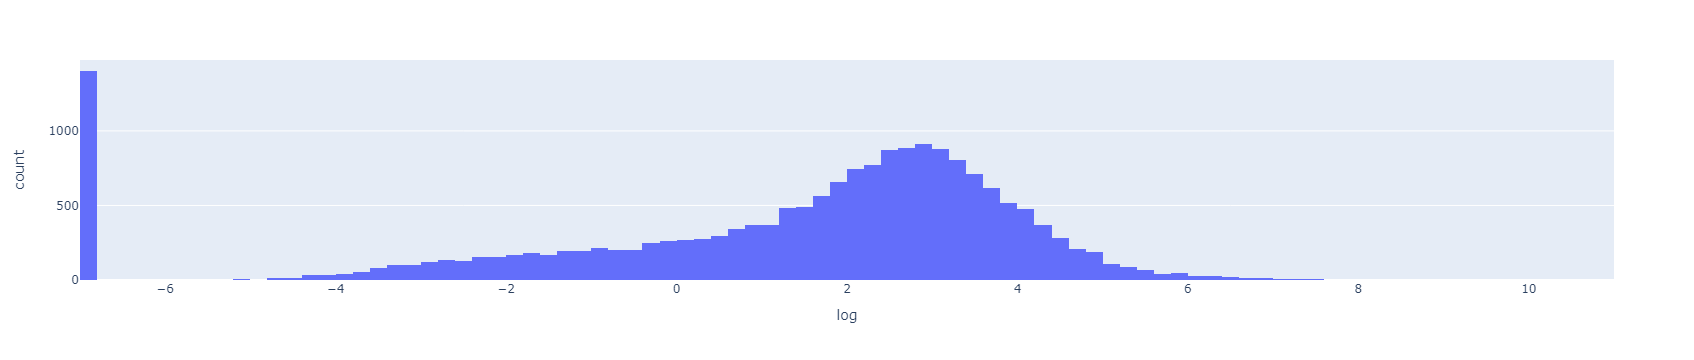

In [28]:
fig = px.histogram(df, x="log")
fig.show()

# Analyse des prédictions de DExTER et de DNABERT2 sur l'humain 

In [5]:
import pandas as pd 
df = pd.read_csv("DNABERT_2/DATASETS/exactly_the_same_as_dexter_data_human/test.csv")
df

Sequence  Pituitary  \
0     TGCCACTGCACTCCAGCCTGGGCCACAGAGCAAGATTCTGTCTCAA...   1.729974   
1     ACGTGACAGCTGCTGCAAGGGGCACGACCACTTCCCACACAGGTGT...   1.911956   
2     AGGAGTTCAAGACCAGCCTGGGCAACATAGTAAAAGCCCCTCTCTG...   0.429268   
3     CCACCGCATTTGAGCACGGGCAACAGAGTGAGACCCTGTCTTAAAA...   1.633771   
4     GTGCAATGGCGCGATCTCGGCTCACCGCAACATCTGCCTCCCGGGT...   1.327972   
...                                                 ...        ...   
7465  ATGGTGGCTCATGCCTCTAATCCCAGCACATTGGGAGGCCAAGGCA...   0.984707   
7466  CTGCACCCAGGTGAAATAAACAGCTTTATTGCTCACATAAATCCTG...  -3.000000   
7467  GCCTAATTTTCAGCTTAGCTAGATGCAGAATTACCTTAGTAATTTA...   1.628900   
7468  ACAGCCCAGGAGTGGAAGACCTCACGCTATGTGAAGCCACAGGGGC...  -3.000000   
7469  AATGCTGGTCGGTTGTGCCTAAACTCCACAGGGAGGGGATATAAGT...   2.194792   

     gene_id_dex_version  
0      ENSG00000179364.9  
1      ENSG00000168936.6  
2      ENSG00000141968.3  
3     ENSG00000101084.12  
4      ENSG00000119328.7  
...                  ...  
7465   ENSG00000090857.9  
7466   ENSG00000203985.6  
7467   ENSG00000197343.6  
7468   ENSG00000231532.1  
7469  ENSG00000185201.12  

[7470 rows x 3 columns]

## distribution du ground_truth

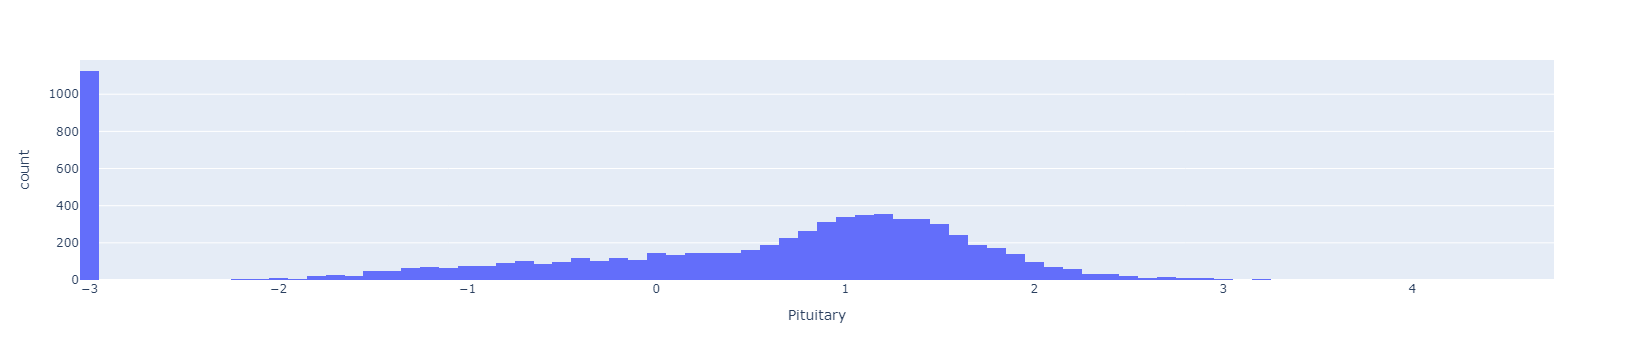

In [22]:
import plotly.express as px

fig = px.histogram(df, x="Pituitary")
fig.show()

## train lasso model 

In [8]:
dex_train = pd.read_csv("DExTER/example/my_experience_human/models/all_domains.dat_training_set.log.matrix", sep = " ")

dex_test = pd.read_csv("DExTER/example/my_experience_human/models/all_domains.dat_testing_set.log.matrix", sep = " ")


x_train = dex_train.iloc[:,2:].copy()
y_train = dex_train.expression

x_test = dex_test.iloc[:,2:].copy()
y_test = dex_test.expression


In [23]:
dex_test

sequence  expression  AA.-125_684  AA.-2000_2000  \
0     ENSG00000243485.2   -1.342084     0.071605       0.066983   
1     ENSG00000237613.2   -1.529590     0.043210       0.062984   
2     ENSG00000186092.4   -1.410385     0.053086       0.099725   
3     ENSG00000233750.3   -0.772885     0.066667       0.070232   
4     ENSG00000237973.1    1.312389     0.081481       0.066233   
...                 ...         ...          ...            ...   
7465  ENSG00000243040.2   -3.000000     0.077778       0.053987   
7466  ENSG00000183753.5   -3.000000     0.049383       0.069233   
7467  ENSG00000172352.5   -3.000000     0.129630       0.117471   
7468  ENSG00000172297.6   -3.000000     0.048148       0.057986   
7469  ENSG00000172288.6   -3.000000     0.129630       0.117471   

      AAGA.685_2000  AC.-125_684  AC.-2000_2000  ACT.-341_-126  ACT.-341_684  \
0          0.006839     0.029630       0.045489       0.013889      0.007797   
1          0.003799     0.033333       0.053487       0.013889      0.008772   
2          0.007599     0.049383       0.052987       0.018519      0.022417   
3          0.008359     0.048148       0.048738       0.018519      0.018519   
4          0.006839     0.034568       0.024744       0.009259      0.008772   
...             ...          ...            ...            ...           ...   
7465       0.005319     0.046914       0.050987       0.004630      0.016569   
7466       0.003799     0.056790       0.059235       0.013889      0.014620   
7467       0.010638     0.081481       0.068233       0.023148      0.021442   
7468       0.006079     0.050617       0.040490       0.009259      0.012671   
7469       0.010638     0.081481       0.068233       0.023148      0.021442   

      AG.-1196_-685  ...  TGT.-1196_-685  TGT.-1925_684  TGT.-684_-342  \
0          0.042969  ...        0.007812       0.015709       0.014577   
1          0.048828  ...        0.013672       0.015326       0.032070   
2          0.050781  ...        0.011719       0.022222       0.020408   
3          0.060547  ...        0.025391       0.019923       0.014577   
4          0.082031  ...        0.021484       0.022222       0.026239   
...             ...  ...             ...            ...            ...   
7465       0.064453  ...        0.005859       0.021456       0.008746   
7466       0.054688  ...        0.031250       0.023755       0.005831   
7467       0.085938  ...        0.011719       0.016858       0.011662   
7468       0.074219  ...        0.027344       0.021073       0.017493   
7469       0.085938  ...        0.011719       0.016858       0.011662   

      TGT.342_684  TT.-125_341  TT.-2000_2000  TT.-341_-126  TT.342_684  \
0        0.029155     0.107066       0.067983      0.101852    0.067055   
1        0.020408     0.036403       0.078980      0.171296    0.081633   
2        0.037901     0.115632       0.119970      0.069444    0.081633   
3        0.017493     0.055675       0.079980      0.087963    0.064140   
4        0.020408     0.064240       0.090227      0.157407    0.055394   
...           ...          ...            ...           ...         ...   
7465     0.040816     0.096360       0.076981      0.064815    0.131195   
7466     0.029155     0.081370       0.084229      0.018519    0.107872   
7467     0.011662     0.057816       0.067233      0.083333    0.067055   
7468     0.011662     0.027837       0.088228      0.060185    0.069971   
7469     0.011662     0.057816       0.067233      0.083333    0.067055   

      TTC.-341_2000  TTC.342_2000  
0          0.012810      0.013864  
1          0.019641      0.018083  
2          0.023057      0.018686  
3          0.015371      0.015672  
4          0.014944      0.012658  
...             ...           ...  
7465       0.015798      0.013864  
7466       0.017079      0.018083  
7467       0.014091      0.013864  
7468       0.010675      0.012055  
7469       0.014091      0.013864  

[7470 rows x 151 columns]

In [9]:
import re
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV
from scipy.stats import pearsonr

# Créer un pipeline qui inclut la normalisation des données
lasso = make_pipeline(StandardScaler(), LassoCV(max_iter=1000000, fit_intercept=True, n_jobs=-1, cv=10))

lasso.fit(x_train, y_train)

# Récupérer le modèle LassoCV du pipeline
lasso_model = lasso.named_steps['lassocv']

# Obtenir le nombre d'itérations effectuées par le modèle LassoCV
nb_iter = lasso_model.n_iter_

# Obtenir le coefficient de régularisation choisi par validation croisée
alpha = lasso_model.alpha_

coef = lasso_model.coef_



predictions = lasso.predict(x_test)

mse = 0
dct_errors = {}
for index in range(len(y_test)):
    error = y_test[index] - predictions[index]
    mse += error**2
mse /= len(y_test)

tmp = []
for i in y_test:
    tmp.append(float(i))
pearson_correlation = pearsonr(tmp, predictions)  # (Pearson’s correlation coefficient,2-tailed p-value)
pearson_correlation = pearson_correlation[0]

score_r2 = lasso.score(x_test, y_test)


In [ ]:
import numpy as np

# Your array

# Create a DataFrame with the array and specify column name
dexter_predictions_column = pd.DataFrame(predictions, columns=["dexter_predictions"])


In [28]:
dexter_g_t = pd.concat([dex_test[["sequence", "expression"]], dexter_predictions_column], axis = 1) 
dexter_g_t

sequence  expression  dexter_predictions
0     ENSG00000243485.2   -1.342084           -0.222706
1     ENSG00000237613.2   -1.529590           -0.279191
2     ENSG00000186092.4   -1.410385           -1.666555
3     ENSG00000233750.3   -0.772885           -1.476290
4     ENSG00000237973.1    1.312389            0.671141
...                 ...         ...                 ...
7465  ENSG00000243040.2   -3.000000            0.109210
7466  ENSG00000183753.5   -3.000000           -1.930697
7467  ENSG00000172352.5   -3.000000           -1.373153
7468  ENSG00000172297.6   -3.000000           -0.825856
7469  ENSG00000172288.6   -3.000000           -1.373153

[7470 rows x 3 columns]

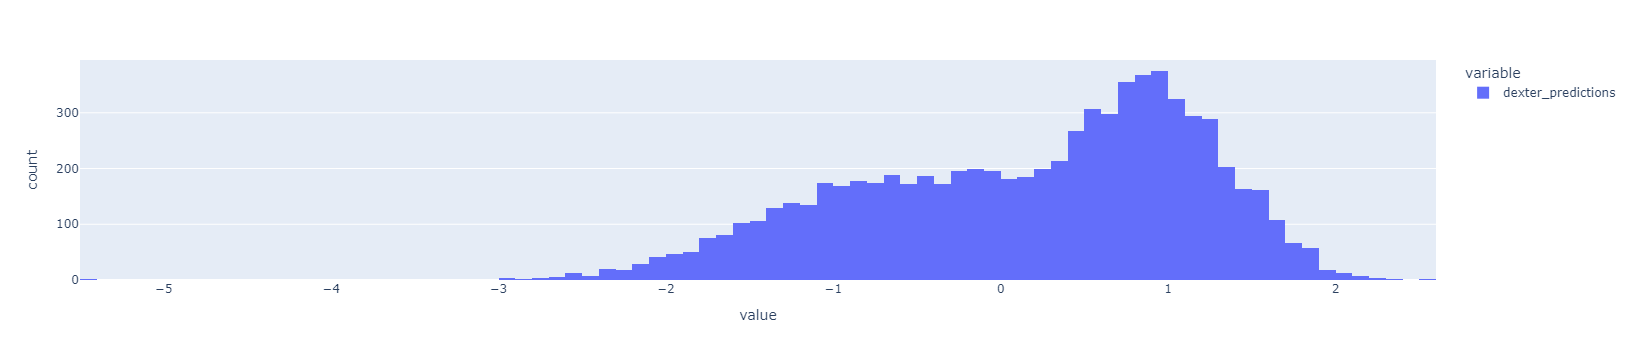

In [29]:
import plotly.express as px

fig = px.histogram(dexter_g_t.dexter_predictions)
fig.show()

## bert results 

In [4]:
bert = pd.read_csv("DNABERT_2/results/merged_data.csv")
dex_bert_gt = pd.merge(dexter_g_t, bert, left_on = "sequence", right_on = "gene_id_dex_version")
dex_bert_gt.drop("expression", axis =1, inplace = True)
dex_bert_gt.rename(columns = {"Prediction" : "dnabert"}, inplace = True)
dex_bert_gt

Mean Squared Error: 1.4449267624102586


In [42]:
print("DExTER")
print(pearsonr(dex_bert_gt['dexter_predictions'], dex_bert_gt['Ground Truth']))
print("DNABERT2")
print(pearsonr(dex_bert_gt['dnabert'], dex_bert_gt['Ground Truth']))

DExTER
PearsonRResult(statistic=0.6405363403762255, pvalue=0.0)
DNABERT2
PearsonRResult(statistic=0.6870335123745632, pvalue=0.0)


In [7]:
dex_bert_gt = pd.read_csv("dex_bert_gt.csv")
dex_bert_gt

Unnamed: 0           sequence  dexter_predictions   dnabert  \
0              0  ENSG00000243485.2           -0.222706 -0.191179   
1              1  ENSG00000237613.2           -0.279191 -3.050088   
2              2  ENSG00000186092.4           -1.666555 -3.046092   
3              3  ENSG00000233750.3           -1.476290 -0.739934   
4              4  ENSG00000237973.1            0.671141 -0.449012   
...          ...                ...                 ...       ...   
7465        7465  ENSG00000243040.2            0.109210 -2.996345   
7466        7466  ENSG00000183753.5           -1.930697 -3.036563   
7467        7467  ENSG00000172352.5           -1.373153 -3.037900   
7468        7468  ENSG00000172297.6           -0.825856 -0.274711   
7469        7469  ENSG00000172288.6           -1.373153 -3.037900   

      Ground Truth gene_id_dex_version  
0        -1.342084   ENSG00000243485.2  
1        -1.529590   ENSG00000237613.2  
2        -1.410385   ENSG00000186092.4  
3        -0.772885   ENSG00000233750.3  
4         1.312389   ENSG00000237973.1  
...            ...                 ...  
7465     -3.000000   ENSG00000243040.2  
7466     -3.000000   ENSG00000183753.5  
7467     -3.000000   ENSG00000172352.5  
7468     -3.000000   ENSG00000172297.6  
7469     -3.000000   ENSG00000172288.6  

[7470 rows x 6 columns]

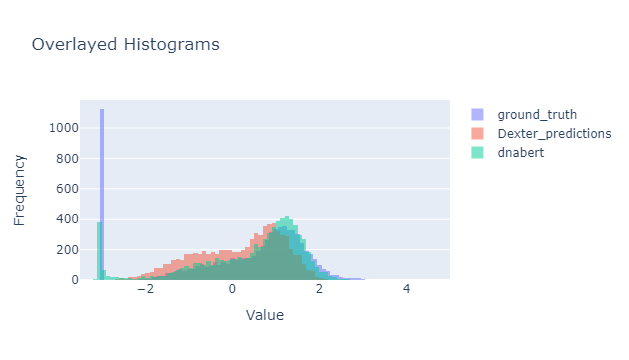

In [23]:
import plotly.graph_objects as go

# Sample data


# Create Histogram traces
histogram1 = go.Histogram(x=dex_bert_gt['dexter_predictions'], name='Dexter_predictions', opacity = 0.5)
histogram2 = go.Histogram(x=dex_bert_gt['Ground Truth'], name='ground_truth', opacity = 0.5)
histogram3 = go.Histogram(x=dex_bert_gt['dnabert'], name='dnabert', opacity = 0.5)


# Create figure object
fig = go.Figure()

# Add traces to the figure
fig.add_trace(histogram2)
fig.add_trace(histogram1)

fig.add_trace(histogram3)

# Update layout
fig.update_layout(barmode='overlay', title='Overlayed Histograms', xaxis_title='Value', yaxis_title='Frequency')
fig.update_yaxes(dtick=200)  # sets the tick step to 5 units  
fig.update_xaxes(range=[-3.5, 5])  # sets the range of x-axis from 2 to 6  

# Show figure
fig.show()


## test de Mann-Whitney U

In [47]:
dex_bert_gt.to_csv("dex_bert_gt.csv")

In [45]:
from scipy.stats import mannwhitneyu

# Exemple de données
group1 = dex_bert_gt["dexter_predictions"]
group2 = dex_bert_gt["Ground Truth"]
# Test de Mann-Whitney U
statistic, p_value = mannwhitneyu(group1, group2)

# Affichage des résultats
print("Statistique de test (U) :", statistic)
print("p-value :", p_value)

# Interprétation des résultats
alpha = 0.05
if p_value < alpha:
    print("Il y a une différence significative entre les deux groupes.")
else:
    print("Il n'y a pas de différence significative entre les deux groupes.")


Statistique de test (U) : 24466570.0
p-value : 8.216831664039293e-39
Il y a une différence significative entre les deux groupes.


In [48]:
from scipy.stats import mannwhitneyu

# Exemple de données
group1 = dex_bert_gt["dnabert"]
group2 = dex_bert_gt["Ground Truth"]
# Test de Mann-Whitney U
statistic, p_value = mannwhitneyu(group1, group2)

# Affichage des résultats
print("Statistique de test (U) :", statistic)
print("p-value :", p_value)

# Interprétation des résultats
alpha = 0.05
if p_value < alpha:
    print("Il y a une différence significative entre les deux groupes.")
else:
    print("Il n'y a pas de différence significative entre les deux groupes.")


Statistique de test (U) : 29065413.0
p-value : 9.841029041352796e-06
Il y a une différence significative entre les deux groupes.


# Analyse des prédictions de DExTER plasmodium 

In [94]:
import pandas as pd 
import numpy as np 
df = pd.read_csv("DExTER/example/Otto_newID.csv", sep = "\t")
df['0h_log'] = np.log(df['0h'])

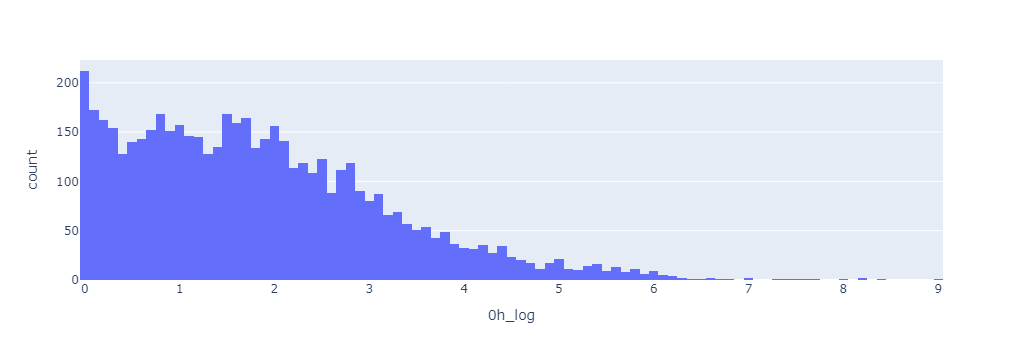

In [95]:
import plotly.express as px

fig = px.histogram(df, x="0h_log")
fig.show()

In [96]:
import pandas as pd 
import numpy as np 
df = pd.read_csv("DExTER/example/Otto_newID.csv", sep = "\t")
df['40h_log'] = np.log(df['40h'])

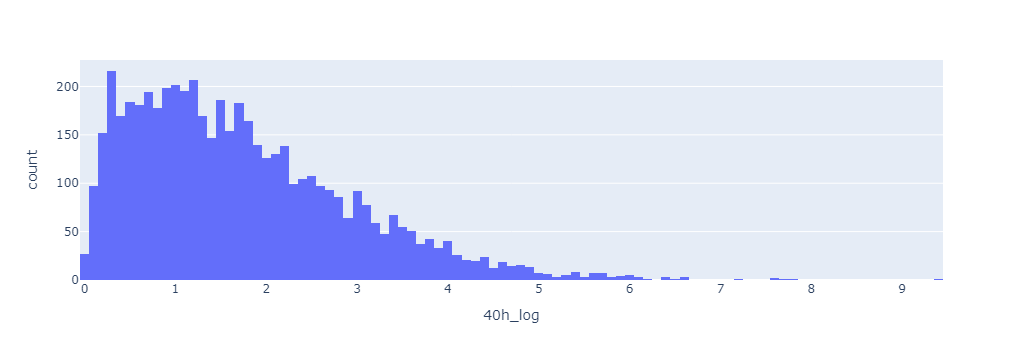

In [97]:
import plotly.express as px

fig = px.histogram(df, x="40h_log")
fig.show()

In [56]:
dex_train = pd.read_csv("DExTER/example/my_experience_human/models/all_domains.dat_training_set.log.matrix", sep = " ")

dex_test = pd.read_csv("DExTER/example/my_experience_human/models/all_domains.dat_testing_set.log.matrix", sep = " ")


x_train = dex_train.iloc[:,2:].copy()
y_train = dex_train.expression

x_test = dex_test.iloc[:,2:].copy()
y_test = dex_test.expression


In [81]:
import re
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV
from scipy.stats import pearsonr

# Créer un pipeline qui inclut la normalisation des données
lasso = make_pipeline(StandardScaler(), LassoCV(max_iter=1000000, fit_intercept=True, n_jobs=-1, cv=10))

lasso.fit(x_train, y_train)

# Récupérer le modèle LassoCV du pipeline
lasso_model = lasso.named_steps['lassocv']

# Obtenir le nombre d'itérations effectuées par le modèle LassoCV
nb_iter = lasso_model.n_iter_

# Obtenir le coefficient de régularisation choisi par validation croisée
alpha = lasso_model.alpha_

coef = lasso_model.coef_



predictions = lasso.predict(x_test)

mse = 0
dct_errors = {}
for index in range(len(y_test)):
    error = y_test[index] - predictions[index]
    mse += error**2
mse /= len(y_test)

tmp = []
for i in y_test:
    tmp.append(float(i))
pearson_correlation = pearsonr(tmp, predictions)  # (Pearson’s correlation coefficient,2-tailed p-value)
pearson_correlation = pearson_correlation[0]

score_r2 = lasso.score(x_test, y_test)


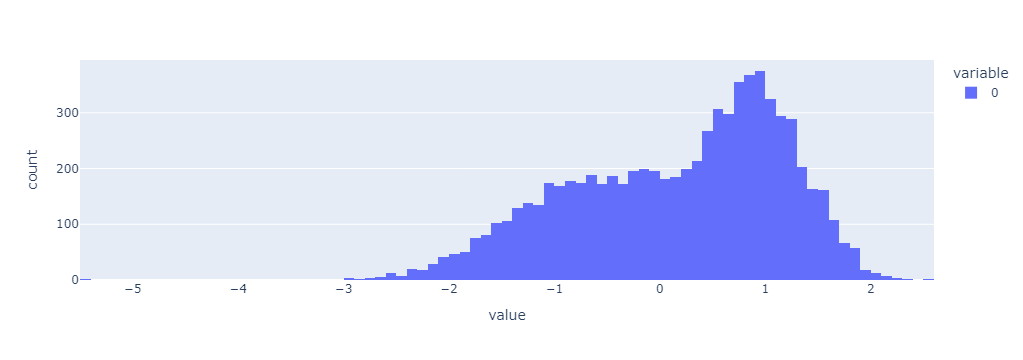

In [72]:
import plotly.express as px

fig = px.histogram(predictions)
fig.show()

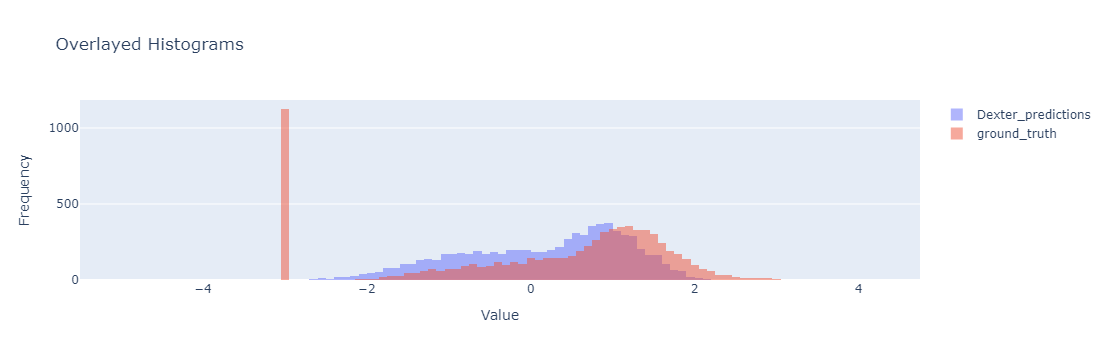

In [88]:
import plotly.graph_objects as go

# Sample data


# Create Histogram traces
histogram1 = go.Histogram(x=predictions, name='Dexter_predictions', opacity = 0.5)
histogram2 = go.Histogram(x=df['Pituitary'], name='ground_truth', opacity = 0.5)

# Create figure object
fig = go.Figure()

# Add traces to the figure
fig.add_trace(histogram1)
fig.add_trace(histogram2)

# Update layout
fig.update_layout(barmode='overlay', title='Overlayed Histograms', xaxis_title='Value', yaxis_title='Frequency')

# Show figure
fig.show()


# zyada processing les genes qui sont presents que dans dexter il faut les process et les rajouter 

In [17]:
import pandas as pd 
mine= pd.read_csv("human_genes_expression_pit/created_by_me/2000_tss_2000_sequence_prot_pit_exp.csv", index_col = 0)

dex = pd.read_csv("human_genes_expression_pit/send_by_dexter_guys/ncbiRefSeqCurated.hg19.2kb.around.geneStart.ENSEMBLgeneID.fa.csv")

dex['gene_id'] = dex['Gene ID'].str.split(".", n=1).str.get(0)


missing = dex[dex['gene_id'].isin(set(dex['gene_id']) - set(mine['gene_id']))].copy()

all = pd.read_csv("human_genes_expression_pit/created_by_me/final_result.csv")

all[all.gene_id == "ENSG00000272060"]

zyada = all[all['gene_id'].isin(set(missing.gene_id))].copy()
df = zyada.copy()

zyada

Name     Pituitary  Description          gene_id  \
0      ENSG00000223972.5      0.000000      DDX11L1  ENSG00000223972   
1      ENSG00000227232.5      5.425460       WASH7P  ENSG00000227232   
3      ENSG00000243485.5      0.000000  MIR1302-2HG  ENSG00000243485   
4      ENSG00000237613.2      0.000000      FAM138A  ENSG00000237613   
9      ENSG00000233750.3      0.085154       CICP27  ENSG00000233750   
...                  ...           ...          ...              ...   
54496  ENSG00000223641.1      0.000000      TTTY17C  ENSG00000223641   
54503  ENSG00000172297.7      0.000000    GOLGA2P3Y  ENSG00000172297   
54515  ENSG00000172288.7      0.000000         CDY1  ENSG00000172288   
54522  ENSG00000231141.1      0.000000        TTTY3  ENSG00000231141   
54558  ENSG00000210082.2  10983.500000      MT-RNR2  ENSG00000210082   

                                  biotype error  
0      transcribed_unprocessed_pseudogene   NaN  
1                  unprocessed_pseudogene   NaN  
3                                  lncRNA   NaN  
4                                  lncRNA   NaN  
9                    processed_pseudogene   NaN  
...                                   ...   ...  
54496                              lncRNA   NaN  
54503              unprocessed_pseudogene   NaN  
54515                      protein_coding   NaN  
54522                              lncRNA   NaN  
54558                             Mt_rRNA   NaN  

[3849 rows x 6 columns]

In [9]:
import pandas as pd

def parse_gff_to_dataframe_filtered(gff_file):
    """
    Parse a GFF file and return a DataFrame representing the features, filtered by gene_type.
    """
    gff_columns = ['start', 'end', 'attributes']
    features = []

    with open(gff_file, 'r') as f:
        count = 0
        for line in f:
            if not line.startswith('#'):  # Ignore comment lines
                fields = line.strip().split('\t')
                if len(fields) == 9:
                    attributes_dict = dict(item.split('=') for item in fields[8].split(';'))
                    # Check if the 'gene_type' attribute exists and is equal to 'protein_coding'
                    if 'gene_type' in attributes_dict :
                        features.append([int(fields[3]), int(fields[4]), attributes_dict])

    return pd.DataFrame(features, columns=gff_columns)

# Example usage:
gff_file = "human_genes_expression_pit/created_by_me/gencode.v25.annotation.gff3"  
df_filtered = parse_gff_to_dataframe_filtered(gff_file)

df_filtered = pd.concat([df_filtered.drop(['attributes'], axis=1), pd.json_normalize(df_filtered['attributes'])], axis=1)
df_filtered_ = df_filtered.copy()[['start','gene_id', 'end', 'ID', 'gene_name']]
df_filtered_.sort_values(by = 'start', inplace = True)
df_filtered_.drop_duplicates('gene_id', inplace = True)
df_filtered_

start             gene_id        end                        ID  \
2577100        577   ENSG00000210049.1        647  exon:ENST00000387314.1:1   
2577101        648   ENSG00000211459.2       1601         ENSG00000211459.2   
2577105       1602   ENSG00000210077.1       1670         ENST00000387342.1   
2577109       1671   ENSG00000210082.2       3229  exon:ENST00000387347.2:1   
2577112       3230   ENSG00000209082.1       3304  exon:ENST00000386347.1:1   
...            ...                 ...        ...                       ...   
231498   248850006  ENSG00000171163.15  248858713         ENST00000463519.5   
231843   248859164   ENSG00000227237.1  248864796         ENSG00000227237.1   
231856   248906196  ENSG00000185220.11  248906342    UTR5:ENST00000355360.8   
231876   248912690   ENSG00000200495.1  248912795         ENST00000363625.1   
231879   248936581   ENSG00000233084.2  248937043         ENST00000430973.1   

          gene_name  
2577100       MT-TF  
2577101     MT-RNR1  
2577105       MT-TV  
2577109     MT-RNR2  
2577112      MT-TL1  
...             ...  
231498       ZNF692  
231843   AL672294.1  
231856        PGBD2  
231876   RNU6-1205P  
231879    RPL23AP25  

[57992 rows x 5 columns]

In [10]:
df_filtered_

start             gene_id        end                        ID  \
2577100        577   ENSG00000210049.1        647  exon:ENST00000387314.1:1   
2577101        648   ENSG00000211459.2       1601         ENSG00000211459.2   
2577105       1602   ENSG00000210077.1       1670         ENST00000387342.1   
2577109       1671   ENSG00000210082.2       3229  exon:ENST00000387347.2:1   
2577112       3230   ENSG00000209082.1       3304  exon:ENST00000386347.1:1   
...            ...                 ...        ...                       ...   
231498   248850006  ENSG00000171163.15  248858713         ENST00000463519.5   
231843   248859164   ENSG00000227237.1  248864796         ENSG00000227237.1   
231856   248906196  ENSG00000185220.11  248906342    UTR5:ENST00000355360.8   
231876   248912690   ENSG00000200495.1  248912795         ENST00000363625.1   
231879   248936581   ENSG00000233084.2  248937043         ENST00000430973.1   

          gene_name  
2577100       MT-TF  
2577101     MT-RNR1  
2577105       MT-TV  
2577109     MT-RNR2  
2577112      MT-TL1  
...             ...  
231498       ZNF692  
231843   AL672294.1  
231856        PGBD2  
231876   RNU6-1205P  
231879    RPL23AP25  

[57992 rows x 5 columns]

In [11]:
df

Name     Pituitary  Description          gene_id  \
0      ENSG00000223972.5      0.000000      DDX11L1  ENSG00000223972   
1      ENSG00000227232.5      5.425460       WASH7P  ENSG00000227232   
3      ENSG00000243485.5      0.000000  MIR1302-2HG  ENSG00000243485   
4      ENSG00000237613.2      0.000000      FAM138A  ENSG00000237613   
9      ENSG00000233750.3      0.085154       CICP27  ENSG00000233750   
...                  ...           ...          ...              ...   
54496  ENSG00000223641.1      0.000000      TTTY17C  ENSG00000223641   
54503  ENSG00000172297.7      0.000000    GOLGA2P3Y  ENSG00000172297   
54515  ENSG00000172288.7      0.000000         CDY1  ENSG00000172288   
54522  ENSG00000231141.1      0.000000        TTTY3  ENSG00000231141   
54558  ENSG00000210082.2  10983.500000      MT-RNR2  ENSG00000210082   

                                  biotype error  
0      transcribed_unprocessed_pseudogene   NaN  
1                  unprocessed_pseudogene   NaN  
3                                  lncRNA   NaN  
4                                  lncRNA   NaN  
9                    processed_pseudogene   NaN  
...                                   ...   ...  
54496                              lncRNA   NaN  
54503              unprocessed_pseudogene   NaN  
54515                      protein_coding   NaN  
54522                              lncRNA   NaN  
54558                             Mt_rRNA   NaN  

[3849 rows x 6 columns]

In [12]:
merge = pd.merge(df, df_filtered_[['start', 'gene_name']], left_on = 'Description', right_on = 'gene_name')

In [13]:
merge

Name     Pituitary Description          gene_id  \
0     ENSG00000223972.5      0.000000     DDX11L1  ENSG00000223972   
1     ENSG00000227232.5      5.425460      WASH7P  ENSG00000227232   
2     ENSG00000227232.5      5.425460      WASH7P  ENSG00000227232   
3     ENSG00000237613.2      0.000000     FAM138A  ENSG00000237613   
4     ENSG00000233750.3      0.085154      CICP27  ENSG00000233750   
...                 ...           ...         ...              ...   
3625  ENSG00000223641.1      0.000000     TTTY17C  ENSG00000223641   
3626  ENSG00000172297.7      0.000000   GOLGA2P3Y  ENSG00000172297   
3627  ENSG00000172288.7      0.000000        CDY1  ENSG00000172288   
3628  ENSG00000231141.1      0.000000       TTTY3  ENSG00000231141   
3629  ENSG00000210082.2  10983.500000     MT-RNR2  ENSG00000210082   

                                 biotype error     start  gene_name  
0     transcribed_unprocessed_pseudogene   NaN     11869    DDX11L1  
1                 unprocessed_pseudogene   NaN     14404     WASH7P  
2                 unprocessed_pseudogene   NaN     14522     WASH7P  
3                                 lncRNA   NaN     34554    FAM138A  
4                   processed_pseudogene   NaN    131025     CICP27  
...                                  ...   ...       ...        ...  
3625                              lncRNA   NaN  25183643    TTTY17C  
3626              unprocessed_pseudogene   NaN  25454561  GOLGA2P3Y  
3627                      protein_coding   NaN  25622162       CDY1  
3628                              lncRNA   NaN  25728490      TTTY3  
3629                             Mt_rRNA   NaN      1671    MT-RNR2  

[3630 rows x 8 columns]

In [14]:
merge.to_csv("zyada_sans_sequence.csv")

In [25]:
merge

Name     Pituitary Description          gene_id  \
0     ENSG00000223972.5      0.000000     DDX11L1  ENSG00000223972   
1     ENSG00000227232.5      5.425460      WASH7P  ENSG00000227232   
2     ENSG00000227232.5      5.425460      WASH7P  ENSG00000227232   
3     ENSG00000237613.2      0.000000     FAM138A  ENSG00000237613   
4     ENSG00000233750.3      0.085154      CICP27  ENSG00000233750   
...                 ...           ...         ...              ...   
3625  ENSG00000223641.1      0.000000     TTTY17C  ENSG00000223641   
3626  ENSG00000172297.7      0.000000   GOLGA2P3Y  ENSG00000172297   
3627  ENSG00000172288.7      0.000000        CDY1  ENSG00000172288   
3628  ENSG00000231141.1      0.000000       TTTY3  ENSG00000231141   
3629  ENSG00000210082.2  10983.500000     MT-RNR2  ENSG00000210082   

                                 biotype error     start  gene_name  
0     transcribed_unprocessed_pseudogene   NaN     11869    DDX11L1  
1                 unprocessed_pseudogene   NaN     14404     WASH7P  
2                 unprocessed_pseudogene   NaN     14522     WASH7P  
3                                 lncRNA   NaN     34554    FAM138A  
4                   processed_pseudogene   NaN    131025     CICP27  
...                                  ...   ...       ...        ...  
3625                              lncRNA   NaN  25183643    TTTY17C  
3626              unprocessed_pseudogene   NaN  25454561  GOLGA2P3Y  
3627                      protein_coding   NaN  25622162       CDY1  
3628                              lncRNA   NaN  25728490      TTTY3  
3629                             Mt_rRNA   NaN      1671    MT-RNR2  

[3630 rows x 8 columns]

## rajouter le chromosome info dans le dataframe 

In [29]:
import requests  
import json  
  
def get_chromosome(ensembl_id):   
    server = "https://rest.ensembl.org"   
    ext = "/overlap/id/{}?feature=gene;content-type=application/json".format(ensembl_id)  
      
    r = requests.get(server+ext, headers={ "Content-Type" : "application/json"})  
      
    if not r.ok:   
        r.raise_for_status()   
        return None  
      
    decoded = r.json()  
      
    for gene in decoded:   
        if gene['feature_type'] == 'gene' and gene['id'] == ensembl_id:   
            return gene['seq_region_name']  
      
    return None  
  
# Example usage:   
ensembl_id = "ENSG00000139618"  # Ensembl ID for the BRCA2 gene  
chromosome = get_chromosome(ensembl_id)  
  
print("Chromosome: {}".format(chromosome))   


Chromosome: 13


In [ ]:
import os
import time
import pandas as pd
import requests

def get_sequence(id):
    server = "https://rest.ensembl.org"
    ext = "/sequence/id/{}?content-type=text/x-fasta;type=genomic".format(id)

    r = requests.get(server+ext, headers={"Content-Type": "text/x-fasta"})

    if not r.ok:
        return "Failed"  # Return "Failed" if sequence retrieval fails

    return r.text

# Function to process the CSV file with checkpoints
def process_csv_with_checkpoints(file_path, checkpoint_interval=64, timeout_interval=60):
    # Check if there are any existing checkpoint files
    checkpoint_files = [f for f in os.listdir('.') if f.startswith('checkpoint_zyada_')]
    if checkpoint_files:
        last_checkpoint_file = sorted(checkpoint_files)[-1]
        last_checkpoint_index = int(last_checkpoint_file.split('_')[-1].split('.')[0])
        print("Last checkpoint file found:", last_checkpoint_file)
        print("Resuming from index:", last_checkpoint_index)
        df = pd.read_csv(last_checkpoint_file)
    else:
        print("No checkpoint files found. Starting from the beginning.")
        # Read the entire CSV file
        df = pd.read_csv(file_path)
        last_checkpoint_index = 0

    # Add a new column to store the sequences if it doesn't exist
    if 'Sequence' not in df.columns:
        df['Sequence'] = ""

    # Iterate over each gene ID starting from the last checkpoint index
    for i, gene_id in enumerate(df['gene_id'][last_checkpoint_index:]):
        sequence = get_sequence(gene_id)
        if sequence:
            df.at[i + last_checkpoint_index, 'Sequence'] = sequence
        else:
            df.at[i + last_checkpoint_index, 'Sequence'] = "Failed"

        # Save a checkpoint at specified intervals
        if (i + last_checkpoint_index + 1) % checkpoint_interval == 0:
            # Save the DataFrame to a new CSV file with a checkpoint name
            checkpoint_file = 'checkpoint_zyada_{:06d}.csv'.format(i + last_checkpoint_index + 1)
            df.to_csv(checkpoint_file, index=False)
            
            # Introduce a timeout interval after every batch of retrievals
            print("Pausing for {} seconds...".format(timeout_interval))
            time.sleep(timeout_interval)

        # Print progress
        print("Processed {} out of {} gene IDs".format(i + last_checkpoint_index + 1, len(df)))

    # Save the final DataFrame to a new CSV file
    df.to_csv('final_zyada.csv', index=False)

    # Print completion message
    print("Sequence retrieval completed for all gene IDs.")

# Example usage: Replace 'file_path.csv' with the path to your CSV file
process_csv_with_checkpoints('human_genes_expression_pit/created_by_me/zyada_sans_sequence.csv')


In [3]:
df = pd.read_csv("final_zyada.csv")


# Separate the value into multiple columns
df[['gene_info', 'sequence']] = df['Sequence'].str.split(pat = '\n', n = 1, expand = True)
df[['gene_id_true', 'chromosome_info']] = df['gene_info'].str.split(pat =' ',n= 1, expand = True)

# Remove '>ENSG00000186092.7' from the gene_id column
df['gene_id'] = df['gene_id'].str.replace('>', '')

# Remove '\n' from the sequence column
df['sequence'] = df['sequence'].str.replace('\n', '')

# Drop the intermediate columns
df = df.drop(columns=['Sequence', 'gene_info'])



df.rename(columns ={'Name' : 'gene_id_ver_dexter'}, inplace = True)
df.rename(columns ={'gene_id_true' : 'gene_id_ver_last'}, inplace = True)


df = df.copy()[['Description', 'gene_id_ver_dexter','gene_id_ver_last', 'gene_id', 'chromosome_info', 'sequence','Pituitary']]

df['gene_id_ver_last'] = df['gene_id_ver_last'].str.replace('^>', '', regex=True)
df.to_csv("les_3000_genes.csv")

In [ ]:
import requests
import os 
import pandas as pd
import time
def get_sequence(chromosome, start, end):
    server = "https://rest.ensembl.org"
    ext = "/sequence/region/human/{0}:{1}..{2}:1?content-type=text/plain".format(chromosome, start, end)

    r = requests.get(server+ext)

    if not r.ok:
        return "Failed"  # Return "Failed" if sequence retrieval fails

    return r.text

# # Exemple d'utilisation :
# chromosome = "1"
# start = 10000
# end = 20000

# sequence = get_sequence(chromosome, start, end)
# print(sequence)
def process_csv_with_checkpoints(file_path, checkpoint_interval=64, timeout_interval=60):
    # Check if there are any existing checkpoint files
    checkpoint_files = [f for f in os.listdir('.') if f.startswith('checkpoint_output_')]
    if checkpoint_files:
        last_checkpoint_file = sorted(checkpoint_files)[-1]
        last_checkpoint_index = int(last_checkpoint_file.split('_')[-1].split('.')[0])
        print("Last checkpoint file found:", last_checkpoint_file)
        print("Resuming from index:", last_checkpoint_index)
        df = pd.read_csv(last_checkpoint_file)
    else:
        print("No checkpoint files found. Starting from the beginning.")
        # Read the entire CSV file
        df = pd.read_csv(file_path)

    # Add a new column to store the sequences if it doesn't exist
    if 'sequence_in_interval' not in df.columns:
        df['sequence_in_interval'] = ""

    total_genes = len(df)
    processed_genes = 0

    # Iterate over each gene ID starting from the last checkpoint index
    for i, row in df.iterrows():
        sequence = get_sequence(row['chromosome'], row['start'] - 20000, row['start'] + 20000 )
        if sequence:
            df.at[i, 'sequence_in_interval'] = sequence
        else:
            df.at[i, 'sequence_in_interval'] = "Failed"

        processed_genes += 1

        # Print progress
        if processed_genes % checkpoint_interval == 0:
            # Save the DataFrame to a new CSV file with a checkpoint name
            checkpoint_file = 'checkpoint_output_{:06d}.csv'.format(processed_genes)
            df.to_csv(checkpoint_file, index=False)

            # Introduce a timeout interval after every batch of retrievals
            print("Pausing for {} seconds...".format(timeout_interval))
            time.sleep(timeout_interval)

        print("Processed {} out of {} gene IDs ({:.2%} complete)".format(processed_genes, total_genes, processed_genes / total_genes))

    # Save the final DataFrame to a new CSV file
    df.to_csv('20000TSS20000_mine.csv', index=False)

    # Print completion message
    print("Sequence retrieval completed for all gene IDs.")

# Example usage: Replace 'file_path.csv' with the path to your CSV file
process_csv_with_checkpoints('human_genes_expression_pit/created_by_me/tss_sequence_prot_pit_exp.csv')


In [1]:
import pandas as pd 
df = pd.read_csv("les_3000_genes.csv", index_col = 0)
df

Description gene_id_ver_dexter   gene_id_ver_last          gene_id  \
0        DDX11L1  ENSG00000223972.5  ENSG00000223972.6  ENSG00000223972   
1         WASH7P  ENSG00000227232.5  ENSG00000227232.6  ENSG00000227232   
2         WASH7P  ENSG00000227232.5  ENSG00000227232.6  ENSG00000227232   
3        FAM138A  ENSG00000237613.2  ENSG00000237613.2  ENSG00000237613   
4         CICP27  ENSG00000233750.3  ENSG00000233750.3  ENSG00000233750   
...          ...                ...                ...              ...   
3625     TTTY17C  ENSG00000223641.1  ENSG00000223641.2  ENSG00000223641   
3626   GOLGA2P3Y  ENSG00000172297.7  ENSG00000172297.7  ENSG00000172297   
3627        CDY1  ENSG00000172288.7  ENSG00000172288.8  ENSG00000172288   
3628       TTTY3  ENSG00000231141.1  ENSG00000231141.1  ENSG00000231141   
3629     MT-RNR2  ENSG00000210082.2  ENSG00000210082.2  ENSG00000210082   

                               chromosome_info  \
0            chromosome:GRCh38:1:12010:13670:1   
1           chromosome:GRCh38:1:14696:24886:-1   
2           chromosome:GRCh38:1:14696:24886:-1   
3           chromosome:GRCh38:1:34554:36081:-1   
4          chromosome:GRCh38:1:131025:134836:1   
...                                        ...   
3625  chromosome:GRCh38:Y:25182277:25213389:-1   
3626   chromosome:GRCh38:Y:25454561:25460572:1   
3627   chromosome:GRCh38:Y:25622117:25624902:1   
3628   chromosome:GRCh38:Y:25728490:25733388:1   
3629          chromosome:GRCh38:MT:1671:3229:1   

                                               sequence     Pituitary  
0     GTGTCTGACTTCCAGCAACTGCTGGCCTGTGCCAGGGTGCAAGCTG...      0.000000  
1     ATGACTCCTGTGAGGATGCAGCACTCCCTGGCAGGTCAGACCTATG...      5.425460  
2     ATGACTCCTGTGAGGATGCAGCACTCCCTGGCAGGTCAGACCTATG...      5.425460  
3     CACACAACGGGGTTTCGGGGCTGTGGACCCTGTGCCAGGAAAGGAA...      0.000000  
4     CCCCTTCTCTGGGCCCAAGCCACCTTGGCTGAGGAGGGGGCGAGGA...      0.085154  
...                                                 ...           ...  
3625  TGTGTGCTGAATAAATTCCAGAAGAGCCAGAGACTTGAGGCCACAG...      0.000000  
3626  TTAAAAGAATATTGGCAGAGGAAGAGCCCTGGCATTCCAGCAGGAG...      0.000000  
3627  AACAGGCAGGAAGAAAGCTTTCTGTACTACACCAGAGGGTTGGGGC...      0.000000  
3628  GGTTGCCACTTCAAGGGACTACATCATGATGTCCTGTTTCTAATGA...      0.000000  
3629  GCTAAACCTAGCCCCAAACCCACTCCACCTTACTACCAGACAACCT...  10983.500000  

[3630 rows x 7 columns]

In [2]:
import pandas as pd
df = pd.read_csv("human_genes_expression_pit/long_sequences/20000TSS20000_mine.csv")
df

Unnamed: 0 Description  gene_id_ver_dexter    gene_id_ver_last  \
0               0       OR4F5   ENSG00000186092.4   ENSG00000186092.7   
1               1      SAMD11  ENSG00000187634.11  ENSG00000187634.13   
2               2       NOC2L  ENSG00000188976.10  ENSG00000188976.11   
3               3      KLHL17  ENSG00000187961.13  ENSG00000187961.15   
4               4     PLEKHN1  ENSG00000187583.10  ENSG00000187583.11   
...           ...         ...                 ...                 ...   
15109       15109       KCTD2  ENSG00000180901.10  ENSG00000180901.11   
15110       15110       ATP5H  ENSG00000167863.11  ENSG00000167863.12   
15111       15111     SLC16A5  ENSG00000170190.15  ENSG00000170190.16   
15112       15112       ARMC7   ENSG00000125449.6   ENSG00000125449.7   
15113       15113        NT5C   ENSG00000125458.6   ENSG00000125458.7   

               gene_id                            chromosome_info  \
0      ENSG00000186092          chromosome:GRCh38:1:65419:71585:1   
1      ENSG00000187634        chromosome:GRCh38:1:923923:944575:1   
2      ENSG00000188976       chromosome:GRCh38:1:944203:959309:-1   
3      ENSG00000187961        chromosome:GRCh38:1:960584:965719:1   
4      ENSG00000187583        chromosome:GRCh38:1:966482:975865:1   
...                ...                                        ...   
15109  ENSG00000180901   chromosome:GRCh38:17:75032575:75065889:1   
15110  ENSG00000167863  chromosome:GRCh38:17:75038863:75046985:-1   
15111  ENSG00000170190   chromosome:GRCh38:17:75087727:75106162:1   
15112  ENSG00000125449   chromosome:GRCh38:17:75109952:75130272:1   
15113  ENSG00000125458  chromosome:GRCh38:17:75130225:75131757:-1   

                                                sequence   Pituitary  \
0      CCCAGATCTCTTCAGGTACATCTAGTCCATTCATAAAGGGCTTTTA...    0.036633   
1      GGCGGCGGAGTCTCCCAAGTCCCCGCCGGGCGGGCGCGCGCCAGTG...   33.268600   
2      GGCGGCGGAAGTGCGCAGCCGCGCGGCATTCTGGGGCCGGAAGTGG...   56.967000   
3      GGGAGTGAGCGACACAGAGCGGGCCGCCACCGCCGAGCAGCCCTCC...   20.749000   
4      AGGAGGCTGTGGACAGGGACCCAGACTTGCCGACCTGTACGACTCT...    0.600868   
...                                                  ...         ...   
15109  AGTGTGGTTTTGCCTTCGAGGAGGGGTGCCCAGTGGTGATGCCCAG...   38.837600   
15110  TTCCCGTGACCCACTTCCGTTACTTGCTGCGGAGGACCGTGGGCAG...  221.765000   
15111  AGAAGCTAGAAAGAGGGCATCCGGGTTGTGCAAATTTCAGACACAC...    2.870450   
15112  GCTTCCGCCGGGAGCCCGGAACCGAGCCCAGGAGCCGGGGACGGTG...    9.354060   
15113  GAGCCCGCGCCCCCCAGACCCCGAGAGCTCGCAGCTCCGGCCCGGC...   51.844500   

          start gene_name  chromosome  gene_start  gene_end  strand  \
0         69091     OR4F5           1       65419     71585       1   
1        923928    SAMD11           1      923923    944575       1   
2        944204     NOC2L           1      944203    959309      -1   
3        960587    KLHL17           1      960584    965719       1   
4        966497   PLEKHN1           1      966482    975865       1   
...         ...       ...         ...         ...       ...     ...   
15109  75032575     KCTD2          17    75032575  75065889       1   
15110  75038863     ATP5H          17    75038863  75046985      -1   
15111  75087727   SLC16A5          17    75087727  75106162       1   
15112  75109952     ARMC7          17    75109952  75130272       1   
15113  75130225      NT5C          17    75130225  75131757      -1   

                                    sequence_in_interval  
0      ACATGGAATCAACTTAAATGCCCATCAGTAACAGACTGGATAAAGA...  
1      CCAGCGGGCACAAGGTTGGGGCAGCTCTGTTCCCAGCAGGCCGAGC...  
2      ATAGCAGCTCCATGTCTCCGGCCTCTGAGGCCCCGCCGGCCGGCTG...  
3      GCGGGCGCTGCGTGCGCATTGGGGCGAGTGTGGCCACGCGGGACAG...  
4      CCTGCCGGCAGTAGTTGGCCACCTTGCACTCCCGGAGGAACGACTT...  
...                                                  ...  
15109  CGCCTCCCCTCGGCGGGACCTAGAAACTGCGCGGAACCAAAGCTCG...  
15110  CCTTGCTCAAGATGACTCAAACAGAGGCCAGATGACCACAACCCAA...  
15111  CACATGCTTGTAATCCCAGCTACTTGGGTGGCTGAGGCACGAGAA

In [3]:
import pandas as pd

def parse_gff_to_dataframe_filtered(gff_file):
    """
    Parse a GFF file and return a DataFrame representing the features, filtered by gene_type.
    """
    gff_columns = ['start', 'end', 'attributes']
    features = []

    with open(gff_file, 'r') as f:
        count = 0
        for line in f:
            if not line.startswith('#'):  # Ignore comment lines
                fields = line.strip().split('\t')
                if len(fields) == 9:
                    attributes_dict = dict(item.split('=') for item in fields[8].split(';'))
                    # Check if the 'gene_type' attribute exists and is equal to 'protein_coding'
                    if 'gene_type' in attributes_dict :
                        features.append([int(fields[3]), int(fields[4]), attributes_dict])

    return pd.DataFrame(features, columns=gff_columns)

# Example usage:
gff_file = 'human_genes_expression_pit/created_by_me/gencode.v25.annotation.gff3'
df_filtered = parse_gff_to_dataframe_filtered(gff_file)

df_filtered = pd.concat([df_filtered.drop(['attributes'], axis=1), pd.json_normalize(df_filtered['attributes'])], axis=1)
df_filtered_ = df_filtered.copy()[['start','gene_id', 'end', 'ID', 'gene_name']]
df_filtered_.sort_values(by = 'start', inplace = True)
df_filtered_.drop_duplicates('gene_id', inplace = True)
df_filtered_

start             gene_id        end                        ID  \
2577100        577   ENSG00000210049.1        647  exon:ENST00000387314.1:1   
2577101        648   ENSG00000211459.2       1601         ENSG00000211459.2   
2577106       1602   ENSG00000210077.1       1670  exon:ENST00000387342.1:1   
2577109       1671   ENSG00000210082.2       3229  exon:ENST00000387347.2:1   
2577112       3230   ENSG00000209082.1       3304  exon:ENST00000386347.1:1   
...            ...                 ...        ...                       ...   
231551   248850006  ENSG00000171163.15  248850209    UTR3:ENST00000306601.8   
231845   248859164   ENSG00000227237.1  248859246  exon:ENST00000417047.1:1   
231856   248906196  ENSG00000185220.11  248906342    UTR5:ENST00000355360.8   
231877   248912690   ENSG00000200495.1  248912795  exon:ENST00000363625.1:1   
231878   248936581   ENSG00000233084.2  248937043         ENSG00000233084.2   

          gene_name  
2577100       MT-TF  
2577101     MT-RNR1  
2577106       MT-TV  
2577109     MT-RNR2  
2577112      MT-TL1  
...             ...  
231551       ZNF692  
231845   AL672294.1  
231856        PGBD2  
231877   RNU6-1205P  
231878    RPL23AP25  

[57992 rows x 5 columns]

In [4]:
df = pd.read_csv("les_3000_genes.csv", index_col = None)
df.drop(columns =["Unnamed: 0"],  inplace = True)
merge = pd.merge(df, df_filtered_[['start', 'gene_name']], left_on = 'Description', right_on = 'gene_name')

In [5]:
import pandas as pd

# Supposons que votre DataFrame s'appelle df et que la colonne contenant les informations sur le chromosome s'appelle "chromosome_info"

# Formatter la colonne chromosome_info
merge[['info_1', 'info_2', 'chromosome', 'gene_start', 'gene_end', 'strand']] = merge['chromosome_info'].str.split(':', expand=True)

# Supprimer les colonnes d'information inutiles
merge.drop(columns=['info_1', 'info_2'], inplace=True)

# Afficher le DataFrame avec la colonne de chromosome_info formatée
merge

Description gene_id_ver_dexter   gene_id_ver_last          gene_id  \
0        DDX11L1  ENSG00000223972.5  ENSG00000223972.6  ENSG00000223972   
1         WASH7P  ENSG00000227232.5  ENSG00000227232.6  ENSG00000227232   
2         WASH7P  ENSG00000227232.5  ENSG00000227232.6  ENSG00000227232   
3         WASH7P  ENSG00000227232.5  ENSG00000227232.6  ENSG00000227232   
4         WASH7P  ENSG00000227232.5  ENSG00000227232.6  ENSG00000227232   
...          ...                ...                ...              ...   
3675     TTTY17C  ENSG00000223641.1  ENSG00000223641.2  ENSG00000223641   
3676   GOLGA2P3Y  ENSG00000172297.7  ENSG00000172297.7  ENSG00000172297   
3677        CDY1  ENSG00000172288.7  ENSG00000172288.8  ENSG00000172288   
3678       TTTY3  ENSG00000231141.1  ENSG00000231141.1  ENSG00000231141   
3679     MT-RNR2  ENSG00000210082.2  ENSG00000210082.2  ENSG00000210082   

                               chromosome_info  \
0            chromosome:GRCh38:1:12010:13670:1   
1           chromosome:GRCh38:1:14696:24886:-1   
2           chromosome:GRCh38:1:14696:24886:-1   
3           chromosome:GRCh38:1:14696:24886:-1   
4           chromosome:GRCh38:1:14696:24886:-1   
...                                        ...   
3675  chromosome:GRCh38:Y:25182277:25213389:-1   
3676   chromosome:GRCh38:Y:25454561:25460572:1   
3677   chromosome:GRCh38:Y:25622117:25624902:1   
3678   chromosome:GRCh38:Y:25728490:25733388:1   
3679          chromosome:GRCh38:MT:1671:3229:1   

                                               sequence    Pituitary  \
0     GTGTCTGACTTCCAGCAACTGCTGGCCTGTGCCAGGGTGCAAGCTG...      0.00000   
1     ATGACTCCTGTGAGGATGCAGCACTCCCTGGCAGGTCAGACCTATG...      5.42546   
2     ATGACTCCTGTGAGGATGCAGCACTCCCTGGCAGGTCAGACCTATG...      5.42546   
3     ATGACTCCTGTGAGGATGCAGCACTCCCTGGCAGGTCAGACCTATG...      5.42546   
4     ATGACTCCTGTGAGGATGCAGCACTCCCTGGCAGGTCAGACCTATG...      5.42546   
...                                                 ...          ...   
3675  TGTGTGCTGAATAAATTCCAGAAGAGCCAGAGACTTGAGGCCACAG...      0.00000   
3676  TTAAAAGAATATTGGCAGAGGAAGAGCCCTGGCATTCCAGCAGGAG...      0.00000   
3677  AACAGGCAGGAAGAAAGCTTTCTGTACTACACCAGAGGGTTGGGGC...      0.00000   
3678  GGTTGCCACTTCAAGGGACTACATCATGATGTCCTGTTTCTAATGA...      0.00000   
3679  GCTAAACCTAGCCCCAAACCCACTCCACCTTACTACCAGACAACCT...  10983.50000   

         start  gene_name chromosome gene_start  gene_end strand  
0        11869    DDX11L1          1      12010     13670      1  
1        14404     WASH7P          1      14696     24886     -1  
2        14522     WASH7P          1      14696     24886     -1  
3        14404     WASH7P          1      14696     24886     -1  
4        14522     WASH7P          1      14696     24886     -1  
...        ...        ...        ...        ...       ...    ...  
3675  25183643    TTTY17C          Y   25182277  25213389     -1  
3676  25454561  GOLGA2P3Y          Y   25454561  25460572      1  
3677  25622162       CDY1          Y   25622117  25624902      1  
3678  25728490      TTTY3          Y   25728490  25733388      1  
3679      1671    MT-RNR2         MT       1671      3229      1  

[3680 rows x 13 columns]

In [6]:
merge.to_csv("les_3000_genes_gencode.csv")

In [ ]:
import requests
import os 
import pandas as pd
import time
def get_sequence(chromosome, start, end):
    server = "https://rest.ensembl.org"
    ext = "/sequence/region/human/{0}:{1}..{2}:1?content-type=text/plain".format(chromosome, start, end)

    r = requests.get(server+ext)

    if not r.ok:
        return "Failed"  # Return "Failed" if sequence retrieval fails

    return r.text

# # Exemple d'utilisation :
# chromosome = "1"
# start = 10000
# end = 20000

# sequence = get_sequence(chromosome, start, end)
# print(sequence)
def process_csv_with_checkpoints(file_path, checkpoint_interval=64, timeout_interval=60):
    # Check if there are any existing checkpoint files
    checkpoint_files = [f for f in os.listdir('.') if f.startswith('checkpoint_zyada_sequence_')]
    if checkpoint_files:
        last_checkpoint_file = sorted(checkpoint_files)[-1]
        last_checkpoint_index = int(last_checkpoint_file.split('_')[-1].split('.')[0])
        print("Last checkpoint file found:", last_checkpoint_file)
        print("Resuming from index:", last_checkpoint_index)
        df = pd.read_csv(last_checkpoint_file)
    else:
        print("No checkpoint files found. Starting from the beginning.")
        # Read the entire CSV file
        df = pd.read_csv(file_path)

    # Add a new column to store the sequences if it doesn't exist
    if 'sequence_in_interval' not in df.columns:
        df['sequence_in_interval'] = ""

    total_genes = len(df)
    processed_genes = 0

    # Iterate over each gene ID starting from the last checkpoint index
    for i, row in df.iterrows():
        sequence = get_sequence(row['chromosome'], row['start'] - 20000, row['start'] + 20000 )
        if sequence:
            df.at[i, 'sequence_in_interval'] = sequence
        else:
            df.at[i, 'sequence_in_interval'] = "Failed"

        processed_genes += 1

        # Print progress
        if processed_genes % checkpoint_interval == 0:
            # Save the DataFrame to a new CSV file with a checkpoint name
            checkpoint_file = 'checkpoint_zyada_sequence_{:06d}.csv'.format(processed_genes)
            df.to_csv(checkpoint_file, index=False)

            # Introduce a timeout interval after every batch of retrievals
            print("Pausing for {} seconds...".format(timeout_interval))
            time.sleep(timeout_interval)

        print("Processed {} out of {} gene IDs ({:.2%} complete)".format(processed_genes, total_genes, processed_genes / total_genes))

    # Save the final DataFrame to a new CSV file
    df.to_csv('les_3000_genes_gencode_20000_TSS_20000.csv', index=False)

    # Print completion message
    print("Sequence retrieval completed for all gene IDs.")

# Example usage: Replace 'file_path.csv' with the path to your CSV file
process_csv_with_checkpoints('les_3000_genes_gencode.csv')


In [ ]:
concatenate the zyada with mine 
and after that diviser le dataset en train et test etc...

In [4]:
import pandas as pd 
df = pd.read_csv("les_3000_genes_gencode_20000_TSS_20000.csv", index_col = 0)
df

Description gene_id_ver_dexter   gene_id_ver_last          gene_id  \
Unnamed: 0                                                                      
0              DDX11L1  ENSG00000223972.5  ENSG00000223972.6  ENSG00000223972   
1               WASH7P  ENSG00000227232.5  ENSG00000227232.6  ENSG00000227232   
2               WASH7P  ENSG00000227232.5  ENSG00000227232.6  ENSG00000227232   
3               WASH7P  ENSG00000227232.5  ENSG00000227232.6  ENSG00000227232   
4               WASH7P  ENSG00000227232.5  ENSG00000227232.6  ENSG00000227232   
...                ...                ...                ...              ...   
3675           TTTY17C  ENSG00000223641.1  ENSG00000223641.2  ENSG00000223641   
3676         GOLGA2P3Y  ENSG00000172297.7  ENSG00000172297.7  ENSG00000172297   
3677              CDY1  ENSG00000172288.7  ENSG00000172288.8  ENSG00000172288   
3678             TTTY3  ENSG00000231141.1  ENSG00000231141.1  ENSG00000231141   
3679           MT-RNR2  ENSG00000210082.2  ENSG00000210082.2  ENSG00000210082   

                                     chromosome_info  \
Unnamed: 0                                             
0                  chromosome:GRCh38:1:12010:13670:1   
1                 chromosome:GRCh38:1:14696:24886:-1   
2                 chromosome:GRCh38:1:14696:24886:-1   
3                 chromosome:GRCh38:1:14696:24886:-1   
4                 chromosome:GRCh38:1:14696:24886:-1   
...                                              ...   
3675        chromosome:GRCh38:Y:25182277:25213389:-1   
3676         chromosome:GRCh38:Y:25454561:25460572:1   
3677         chromosome:GRCh38:Y:25622117:25624902:1   
3678         chromosome:GRCh38:Y:25728490:25733388:1   
3679                chromosome:GRCh38:MT:1671:3229:1   

                                                     sequence    Pituitary  \
Unnamed: 0                                                                   
0           GTGTCTGACTTCCAGCAACTGCTGGCCTGTGCCAGGGTGCAAGCTG...      0.00000   
1           ATGACTCCTGTGAGGATGCAGCACTCCCTGGCAGGTCAGACCTATG...      5.42546   
2           ATGACTCCTGTGAGGATGCAGCACTCCCTGGCAGGTCAGACCTATG...      5.42546   
3           ATGACTCCTGTGAGGATGCAGCACTCCCTGGCAGGTCAGACCTATG...      5.42546   
4           ATGACTCCTGTGAGGATGCAGCACTCCCTGGCAGGTCAGACCTATG...      5.42546   
...                                                       ...          ...   
3675        TGTGTGCTGAATAAATTCCAGAAGAGCCAGAGACTTGAGGCCACAG...      0.00000   
3676        TTAAAAGAATATTGGCAGAGGAAGAGCCCTGGCATTCCAGCAGGAG...      0.00000   
3677        AACAGGCAGGAAGAAAGCTTTCTGTACTACACCAGAGGGTTGGGGC...      0.00000   
3678        GGTTGCCACTTCAAGGGACTACATCATGATGTCCTGTTTCTAATGA...      0.00000   
3679        GCTAAACCTAGCCCCAAACCCACTCCACCTTACTACCAGACAACCT...  10983.50000   

               start  gene_name chromosome  gene_start    gene_end  strand  \
Unnamed: 0                                                                   
0              11869    DDX11L1          1     12010.0     13670.0     1.0   
1              14404     WASH7P          1     14696.0     24886.0    -1.0   
2              14522     WASH7P          1     14696.0     24886.0    -1.0   
3              14404     WASH7P          1     14696.0     24886.0    -1.0   
4              14522     WASH7P          1     14696.0     24886.0    -1.0   
...              ...        ...        ...         ...         ...     ...   
3675        25183643    TTTY17C          Y  25182277.0  25213389.0    -1.0   
3676        25454561  GOLGA2P3Y          Y  25454561.0  25460572.0     1.0   
3677        25622162       CDY1          Y  25622117.0  25624902.0     1.0   
3678        25728490      TTTY3          Y  25728490.0  25733388.0     1.0   
3679            1671    MT-RNR2         MT      1671.0      3229.0     1.0   

                                         sequence_in_interval  
Unnamed: 0                                                     
0                                                      Failed  
1     

# investigation du dataset obtenu 

concat the two dataset the 3000 with the 15 000 ya un probleme c censé etre normalement plus de 18 000 y'a eu un probelme 

In [15]:
import pandas as pd 
_3000 = pd.read_csv("human_genes_expression_pit/long_sequences/les_3000_genes_gencode_20000_TSS_20000.csv", index_col = 0)
_15000 = pd.read_csv("human_genes_expression_pit/long_sequences/20000TSS20000_mine.csv" , index_col = 0)
df = pd.concat((_3000, _15000), axis = 0)

df = df[df['sequence_in_interval'] != 'Failed']
                    


In [16]:
df.to_csv("human_genes_expression_pit/long_sequences/all_genes_with_missing_ones.csv")

## verification que tous les sequence recuperes ont bien une taille de 40 000

In [17]:
sequence = df[['gene_id_ver_last', 'sequence_in_interval', 'Pituitary']].copy()
sequence['len'] = df['sequence_in_interval'].str.len()

sequence[sequence['len'] != 40001]

gene_id_ver_last  \
Unnamed: 0                      
2687        ENSG00000248472.9   

                                         sequence_in_interval  Pituitary  \
Unnamed: 0                                                                 
2687        AGATGCTGCACAGCTGGCTGCCCTTTGCCCACCCTCCCCTTCTTTC...        0.0   

              len  
Unnamed: 0         
2687        34632

## verification des "N" dans les séquences 

In [18]:
sequence[sequence['sequence_in_interval'].str.contains("N")]

gene_id_ver_last  \
Unnamed: 0                       
44           ENSG00000263811.1   
275          ENSG00000201321.1   
340          ENSG00000236854.2   
1658         ENSG00000204790.9   
2687         ENSG00000248472.9   
3345        ENSG00000185186.10   
3621        ENSG00000228927.10   
3622         ENSG00000258992.7   
164          ENSG00000232423.6   
2441        ENSG00000196912.13   
3242        ENSG00000154822.18   
4271         ENSG00000248920.3   
4272         ENSG00000250745.3   
4273         ENSG00000249811.3   
4274         ENSG00000248933.3   
4275         ENSG00000250913.2   
4276         ENSG00000232264.5   
4277         ENSG00000230430.5   
4278         ENSG00000229579.5   
4279         ENSG00000227140.3   
4904         ENSG00000260596.5   
5400         ENSG00000249751.4   
5401         ENSG00000249751.4   
5402         ENSG00000283288.2   
7498         ENSG00000283528.2   
8451        ENSG00000196873.16   
9194        ENSG00000122873.12   
9201         ENSG00000227877.7   
9560        ENSG00000169129.16   
10969       ENSG00000010610.10   
10986       ENSG00000159403.18   
10987       ENSG00000139178.12   
11806       ENSG00000175727.15   
11833       ENSG00000184209.15   
11834       ENSG00000188026.13   
12186        ENSG00000185974.7   
12784        ENSG00000233917.9   
13581       ENSG00000185164.15   
13782        ENSG00000278848.3   
14146       ENSG00000141252.21   

                                         sequence_in_interval   Pituitary  \
Unnamed: 0                                                                  
44          NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...    0.000000   
275         NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...    0.000000   
340         TTGTTAGAGGGAATATAAAATTGTGCAGCCACTTTGGAAAACAGTT...    0.000000   
1658        NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...    0.386873   
2687        AGATGCTGCACAGCTGGCTGCCCTTTGCCCACCCTCCCCTTCTTTC...    0.000000   
3345        ACAGGGCGGTCTGGCAGAAGCTGGCCTGGTACTTGCCTGGCTCCCC...    0.094706   
3621        TGGGCCCATGACCCCAGAGTCTGCACTGGAGGAGCTGCTGGCCGTT...    0.000000   
3622        NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...    0.000000   
164         CAGATAACTGTCCAGGGACAGGCAGGCAGCAGCCATTCATGGTGTT...    0.000000   
2441        NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...    1.594540   
3242        CCAGTTTGGAAGTTCCTTCCCTTTCCCCAGTGCCTCTCTGCCTTTG...    9.617470   
4271        TCTGAGTTCTCAAGTTTTTTGTTTCGTGTTTTCTTAAACTGCCGTC...    0.000000   
4272        TGAGTTCTCAAGTTTTTTGTTTCGTGTTTTCTTAAACTGCCGTCGC...    0.000000   
4273        GAGTTCTCAAGTTTTTTGTTTCGTGTTTTCTTAAACTGCCGTCGCA...    0.000000   
4274        CTGAGTTCTCAAGTTTTTTGTTTCGTGTTTTCTTAAACTGCCGTCG...    0.000000   
4275        ACCTTCTGAGTTCTCAAGTTTTTTGTTTCGTGTTTTCTTAAACTGC...    0.000000   
4276        NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...    0.000000   
4277        NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...    0.000000   
4278        NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...    0.000000   
4279        NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...    0.000000   
4904        NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...    0.000000   
5400        GATCCCCATTATTAATACTATGCTCCGAGACCCACAGGGTCCAGCA...   12.053200   
5401        CTCCAGGAGCACAGTTCTTGTCAGGGTGAAATTTCAGGGCGAGTTT...   12.053200   
5402        AAAAAAAAAAAAGTAATATATACCTTGAATAATTGCTATAAAGATT...    0.000000   
7498        CTCCCGGGTTCAAGCAATTCTCCTGCCTCAGCCTCCCGAGTAGCTG...    0.014014   
8451        NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...    0.996164   
9194        GCTGGATCATATGGTAGATTTATTTTTAGTTTTTTGAGGAACTTCC...   21.858300   
9201        TCCTATTATCTTAAACCTTCTATCCTTTTCTTCAGTTCTGGAGATG...    3.981780   
9560        CAGTGAGCGGCCGCCACTGAATTGGAGGTGGGTGTGTGAGAGAAGA...    3.586430   
10969       TCCTGGCGGACCCCACTGCGCCCTCCCACCGCTCCCCGGCCCGGAG...    7.992310   
10986       GGGCTTGGTTGTGGGGTAGAATTTCGATGTTTGGAAGGGATGTGGA...  100.244000   
10987       GGCATTAGTGCATCTGGACTCAGTGATTCACA

In [20]:
_10k_sequence = sequence.copy()
_10k_sequence['sequence_in_interval'] =_10k_sequence['sequence_in_interval'].str[15000:-15000]

In [21]:
_10k_sequence

gene_id_ver_last  \
Unnamed: 0                       
5            ENSG00000237613.2   
6            ENSG00000233750.3   
7            ENSG00000237973.1   
8            ENSG00000228327.6   
9            ENSG00000177757.2   
...                        ...   
15109       ENSG00000180901.11   
15110       ENSG00000167863.12   
15111       ENSG00000170190.16   
15112        ENSG00000125449.7   
15113        ENSG00000125458.7   

                                         sequence_in_interval   Pituitary  \
Unnamed: 0                                                                  
5           GTGCACACGGCTCCCATGCGTTGTCTTCCGAGCGTCAGGCCGCCCC...    0.000000   
6           TAAATTTCTGTAATAAAATTTAAATGTTTATAAATTTAAAAAACTA...    0.085154   
7           TGCCCACGGTAGCGTATCAGGTACACGGCGCTGTTTCTTCCCTGCT...   19.099700   
8           AACAGGAGAGAGAATCTGTAAACTTGAATATAGATCTTCCGAAATT...    3.589420   
9           CGTGCAATGTTGGTGGAAATGGAGGATGGTATAGCTACTATAGGAA...    0.725084   
...                                                       ...         ...   
15109       TGGATCTAATAATGGAAAAGCCTCATTTGCAAGACCTCAACAGCAA...   38.837600   
15110       ACTCGCTTATGAGGGGAAGGGATGGCACGGCCACGTGCCCCAAGCC...  221.765000   
15111       CCTGTAGCCTGAAGATTCTTGAGCCTGAGGACCCTCCTGAGCAGGT...    2.870450   
15112       TATCATTTCTCTTTGTCTTTCTCTGGCCTCCATACCGTTCTGAAGA...    9.354060   
15113       CTGACCATCTGCGGTTCTTTGAACCCTTTCCCCCCCGGGTCAGTGC...   51.844500   

              len  
Unnamed: 0         
5           40001  
6           40001  
7           40001  
8           40001  
9           40001  
...           ...  
15109       40001  
15110       40001  
15111       40001  
15112       40001  
15113       40001  

[18678 rows x 4 columns]

In [22]:
_10k_sequence = _10k_sequence[['sequence_in_interval', 'Pituitary', 'gene_id_ver_last']]

## log transform the data

In [28]:
_10k_sequence.Pituitary.replace(to_replace = 0, value =  0.001, inplace = True)

/var/tmp/ipykernel_7460/2294225087.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  _10k_sequence.Pituitary.replace(to_replace = 0, value =  0.001, inplace = True)
/var/tmp/ipykernel_7460/2294225087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _10k_sequence.Pituitary.replace(to_replace = 0, value =  0.001, inplace = True)


In [30]:
import numpy as np 
_10k_sequence.Pituitary = np.log(_10k_sequence.Pituitary)

/var/tmp/ipykernel_7460/3318615582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _10k_sequence.Pituitary = np.log(_10k_sequence.Pituitary)


In [31]:
_10k_sequence

sequence_in_interval  Pituitary  \
Unnamed: 0                                                                 
5           GTGCACACGGCTCCCATGCGTTGTCTTCCGAGCGTCAGGCCGCCCC...  -6.907755   
6           TAAATTTCTGTAATAAAATTTAAATGTTTATAAATTTAAAAAACTA...  -2.463299   
7           TGCCCACGGTAGCGTATCAGGTACACGGCGCTGTTTCTTCCCTGCT...   2.949673   
8           AACAGGAGAGAGAATCTGTAAACTTGAATATAGATCTTCCGAAATT...   1.277991   
9           CGTGCAATGTTGGTGGAAATGGAGGATGGTATAGCTACTATAGGAA...  -0.321468   
...                                                       ...        ...   
15109       TGGATCTAATAATGGAAAAGCCTCATTTGCAAGACCTCAACAGCAA...   3.659389   
15110       ACTCGCTTATGAGGGGAAGGGATGGCACGGCCACGTGCCCCAAGCC...   5.401618   
15111       CCTGTAGCCTGAAGATTCTTGAGCCTGAGGACCCTCCTGAGCAGGT...   1.054469   
15112       TATCATTTCTCTTTGTCTTTCTCTGGCCTCCATACCGTTCTGAAGA...   2.235810   
15113       CTGACCATCTGCGGTTCTTTGAACCCTTTCCCCCCCGGGTCAGTGC...   3.948249   

              gene_id_ver_last  
Unnamed: 0                      
5            ENSG00000237613.2  
6            ENSG00000233750.3  
7            ENSG00000237973.1  
8            ENSG00000228327.6  
9            ENSG00000177757.2  
...                        ...  
15109       ENSG00000180901.11  
15110       ENSG00000167863.12  
15111       ENSG00000170190.16  
15112        ENSG00000125449.7  
15113        ENSG00000125458.7  

[18678 rows x 3 columns]

In [32]:
from sklearn.model_selection import train_test_split
import os

# Diviser le DataFrame en ensembles d'entraînement, de validation et de test
train_val_df, test_df = train_test_split(_10k_sequence, test_size=0.5, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.5, random_state=42)

# Créer un dossier pour sauvegarder les fichiers CSV si nécessaire
output_folder = "human_genes_expression_pit/long_sequences/dnabert_long"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Sauvegarder les ensembles d'entraînement, de validation et de test en fichiers CSV
train_df.to_csv(os.path.join(output_folder, "train.csv"), index=False)
val_df.to_csv(os.path.join(output_folder, "validation.csv"), index=False)
test_df.to_csv(os.path.join(output_folder, "test.csv"), index=False)

In [ ]:
train = pd.read_csv("human_genes_expression_pit/long_sequences/dnabert_long/train.csv") 

In [ ]:
train.info()

# une autre zyada a process !!!

In [2]:
import pandas as pd 
dex = pd.read_csv("human_genes_expression_pit/send_by_dexter_guys/ncbiRefSeqCurated.hg19.2kb.around.geneStart.ENSEMBLgeneID.fa.csv")
dex['gene_id'] = dex['Gene ID'].str.split(".", n=1).str.get(0)


In [3]:
dex

Gene ID                                           Sequence  \
0      ENSG00000118473.17  gaaaactgtgaggcacagagaattacataaattgctcagagtcaca...   
1      ENSG00000162426.10  CCCATGTGCAGGGGACTCATAAAGGAGCATCTTTGAGCTCCAGACC...   
2      ENSG00000157191.15  acaaaacaaaacaaaacaaaacCACtaaacatagcattattgtata...   
3      ENSG00000169504.10  TTTTGGTAGGGCAGAGAGGGTGGATTCTGGAAGGAAACTTTGCTTC...   
4      ENSG00000142920.12  catagaaaacaagatggttccaggcagaagggcccagagaaatcag...   
...                   ...                                                ...   
22903   ENSG00000233312.4  CACTCTCAGAGAGATGTGGTGGGAGCCATGGCGCAGTCTGCCTAGG...   
22904   ENSG00000206142.5  GTCTAAAAAGAAAAGTGTTGACCTTGATACGGGCTGTGTTAGGCAG...   
22905   ENSG00000237375.2  agaattgacaccaatacacacaatcttttctgaaaatagagaatct...   
22906   ENSG00000272060.1  GGAGGATcccgccgggccgggcccggcgTTCCCAGCGGGTTGGGAC...   
22907   ENSG00000241335.1  cgccgctagaggtgaaattcttggaccggcgcaagacggaccagag...   

               gene_id  
0      ENSG00000118473  
1      ENSG00000162426  
2      ENSG00000157191  
3      ENSG00000169504  
4      ENSG00000142920  
...                ...  
22903  ENSG00000233312  
22904  ENSG00000206142  
22905  ENSG00000237375  
22906  ENSG00000272060  
22907  ENSG00000241335  

[22908 rows x 3 columns]

In [5]:
mine = pd.read_csv("human_genes_expression_pit/long_sequences/all_genes_with_missing_ones.csv")

In [6]:
mine

Unnamed: 0    Description  gene_id_ver_dexter    gene_id_ver_last  \
0               5        FAM138A   ENSG00000237613.2   ENSG00000237613.2   
1               6         CICP27   ENSG00000233750.3   ENSG00000233750.3   
2               7       MTCO1P12   ENSG00000237973.1   ENSG00000237973.1   
3               8  RP11-206L10.2   ENSG00000228327.3   ENSG00000228327.6   
4               9         FAM87B   ENSG00000177757.2   ENSG00000177757.2   
...           ...            ...                 ...                 ...   
18673       15109          KCTD2  ENSG00000180901.10  ENSG00000180901.11   
18674       15110          ATP5H  ENSG00000167863.11  ENSG00000167863.12   
18675       15111        SLC16A5  ENSG00000170190.15  ENSG00000170190.16   
18676       15112          ARMC7   ENSG00000125449.6   ENSG00000125449.7   
18677       15113           NT5C   ENSG00000125458.6   ENSG00000125458.7   

               gene_id                            chromosome_info  \
0      ENSG00000237613         chromosome:GRCh38:1:34554:36081:-1   
1      ENSG00000233750        chromosome:GRCh38:1:131025:134836:1   
2      ENSG00000237973        chromosome:GRCh38:1:631074:632616:1   
3      ENSG00000228327       chromosome:GRCh38:1:764723:774280:-1   
4      ENSG00000177757        chromosome:GRCh38:1:817371:819837:1   
...                ...                                        ...   
18673  ENSG00000180901   chromosome:GRCh38:17:75032575:75065889:1   
18674  ENSG00000167863  chromosome:GRCh38:17:75038863:75046985:-1   
18675  ENSG00000170190   chromosome:GRCh38:17:75087727:75106162:1   
18676  ENSG00000125449   chromosome:GRCh38:17:75109952:75130272:1   
18677  ENSG00000125458  chromosome:GRCh38:17:75130225:75131757:-1   

                                                sequence   Pituitary  \
0      CACACAACGGGGTTTCGGGGCTGTGGACCCTGTGCCAGGAAAGGAA...    0.000000   
1      CCCCTTCTCTGGGCCCAAGCCACCTTGGCTGAGGAGGGGGCGAGGA...    0.085154   
2      ATGTTCGCCGACCGTTGACTATTCTCTACAAACCACAAAGACATTG...   19.099700   
3      ATGATGATTATTCCCCACCTTCTAAGAGACAAAGACCAACGAGCCA...    3.589420   
4      ACCCTCCTTGAGACAGCCCTCCAGTCCAGGCCAAATCTCAGCCTGC...    0.725084   
...                                                  ...         ...   
18673  AGTGTGGTTTTGCCTTCGAGGAGGGGTGCCCAGTGGTGATGCCCAG...   38.837600   
18674  TTCCCGTGACCCACTTCCGTTACTTGCTGCGGAGGACCGTGGGCAG...  221.765000   
18675  AGAAGCTAGAAAGAGGGCATCCGGGTTGTGCAAATTTCAGACACAC...    2.870450   
18676  GCTTCCGCCGGGAGCCCGGAACCGAGCCCAGGAGCCGGGGACGGTG...    9.354060   
18677  GAGCCCGCGCCCCCCAGACCCCGAGAGCTCGCAGCTCCGGCCCGGC...   51.844500   

          start      gene_name chromosome  gene_start    gene_end  strand  \
0         34554        FAM138A          1     34554.0     36081.0    -1.0   
1        131025         CICP27          1    131025.0    134836.0     1.0   
2        631074       MTCO1P12          1    631074.0    632616.0     1.0   
3        725885  RP11-206L10.2          1    764723.0    774280.0    -1.0   
4        817371         FAM87B          1    817371.0    819837.0     1.0   
...         ...            ...        ...         ...         ...     ...   
18673  75032575          KCTD2         17  75032575.0  75065889.0     1.0   
18674  75038863          ATP5H         17  75038863.0  75046985.0    -1.0   
18675  75087727        SLC16A5         17  75087727.0  75106162.0     1.0   
18676  75109952          ARMC7         17  75109952.0  75130272.0     1.0   
18677  75130225           NT5C         17  75130225.0  75131757.0    -1.0   

                                    sequence_in_interval  
0      GCTCCTTGAAGCTGGTCTCCACACAGTGCTGGTTCCGTCACCCCCT...  
1      AAACTGAGGCATTGGGAGTTAGTAAAAGTCCACATTGAGATATGAG...  
2      ACGTGGAGGCCAGGTCAGCCGCAGAGCCCGGGGCACACGCCGCAGC...  
3      CAGGTTTGACAGATGTGATGGCTTGCAGAATCCTTTATGAGCTCCC...  
4      GCACCATTTGAAGTACCTGATGCCCTTTTAATGCTGTAATGCCCCT...  
...                                                  ...  
18673  CGCCTCCCCTCGGCGGGACCTAGAAACTGCGCGGAACCAAAGCTCG...  
186

In [15]:
missing = set(dex["gene_id"]) - set(mine["gene_id"])

4801

In [17]:
avant = pd.read_csv("human_genes_expression_pit/created_by_me/tss_sequence_prot_pit_exp.csv")

In [18]:
avant 

Unnamed: 0 Description  gene_id_ver_dexter    gene_id_ver_last  \
0               0       OR4F5   ENSG00000186092.4   ENSG00000186092.7   
1               1      SAMD11  ENSG00000187634.11  ENSG00000187634.13   
2               2       NOC2L  ENSG00000188976.10  ENSG00000188976.11   
3               3      KLHL17  ENSG00000187961.13  ENSG00000187961.15   
4               4     PLEKHN1  ENSG00000187583.10  ENSG00000187583.11   
...           ...         ...                 ...                 ...   
18893       18893     MT-ND4L   ENSG00000212907.2   ENSG00000212907.2   
18894       18894      MT-ND4   ENSG00000198886.2   ENSG00000198886.2   
18895       18895      MT-ND5   ENSG00000198786.2   ENSG00000198786.2   
18896       18896      MT-ND6   ENSG00000198695.2   ENSG00000198695.2   
18897       18897      MT-CYB   ENSG00000198727.2   ENSG00000198727.2   

               gene_id                       chromosome_info  \
0      ENSG00000186092     chromosome:GRCh38:1:65419:71585:1   
1      ENSG00000187634   chromosome:GRCh38:1:923923:944575:1   
2      ENSG00000188976  chromosome:GRCh38:1:944203:959309:-1   
3      ENSG00000187961   chromosome:GRCh38:1:960584:965719:1   
4      ENSG00000187583   chromosome:GRCh38:1:966482:975865:1   
...                ...                                   ...   
18893  ENSG00000212907    chromosome:GRCh38:MT:10470:10766:1   
18894  ENSG00000198886    chromosome:GRCh38:MT:10760:12137:1   
18895  ENSG00000198786    chromosome:GRCh38:MT:12337:14148:1   
18896  ENSG00000198695   chromosome:GRCh38:MT:14149:14673:-1   
18897  ENSG00000198727    chromosome:GRCh38:MT:14747:15887:1   

                                                sequence     Pituitary  \
0      CCCAGATCTCTTCAGGTACATCTAGTCCATTCATAAAGGGCTTTTA...      0.036633   
1      GGCGGCGGAGTCTCCCAAGTCCCCGCCGGGCGGGCGCGCGCCAGTG...     33.268600   
2      GGCGGCGGAAGTGCGCAGCCGCGCGGCATTCTGGGGCCGGAAGTGG...     56.967000   
3      GGGAGTGAGCGACACAGAGCGGGCCGCCACCGCCGAGCAGCCCTCC...     20.749000   
4      AGGAGGCTGTGGACAGGGACCCAGACTTGCCGACCTGTACGACTCT...      0.600868   
...                                                  ...           ...   
18893  ATGCCCCTCATTTACATAAATATTATACTAGCATTTACCATCTCAC...  10115.600000   
18894  ATGCTAAAACTAATCGTCCCAACAATTATATTACTACCACTGACAT...  23334.500000   
18895  ATAACCATGCACACTACTATAACCACCCTAACCCTGACTTCCCTAA...   2845.680000   
18896  ATGATGTATGCTTTGTTTCTGTTGAGTGTGGGTTTAGTAATGGGGT...   2028.050000   
18897  ATGACCCCAATACGCAAAACTAACCCCCTAATAAAATTAATTAACC...  19925.500000   

        start gene_name chromosome  gene_start  gene_end  strand  
0       69091     OR4F5          1       65419     71585       1  
1      923928    SAMD11          1      923923    944575       1  
2      944204     NOC2L          1      944203    959309      -1  
3      960587    KLHL17          1      960584    965719       1  
4      966497   PLEKHN1          1      966482    975865       1  
...       ...       ...        ...         ...       ...     ...  
18893   10470   MT-ND4L         MT       10470     10766       1  
18894   10760    MT-ND4         MT       10760     12137       1  
18895   12337    MT-ND5         MT       12337     14148       1  
18896   14149    MT-ND6         MT       14149     14673      -1  
18897   14747    MT-CYB         MT       14747     15887       1  

[18898 rows x 14 columns]

In [19]:
len(set(avant["gene_id"]) - set(mine["gene_id"]))

3667

# NEW zyada processing les genes qui sont presents que dans dexter il faut les process et les rajouter 

In [22]:
import pandas as pd 
mine= pd.read_csv("human_genes_expression_pit/long_sequences/all_genes_with_missing_ones.csv", index_col = 0)

dex = pd.read_csv("human_genes_expression_pit/send_by_dexter_guys/ncbiRefSeqCurated.hg19.2kb.around.geneStart.ENSEMBLgeneID.fa.csv")

dex['gene_id'] = dex['Gene ID'].str.split(".", n=1).str.get(0)


zyada = dex[dex['gene_id'].isin(set(dex['gene_id']) - set(mine['gene_id']))].copy()

zyada

Gene ID                                           Sequence  \
65      ENSG00000266766.3  tgaggacctcaaaacttagttgagaacacagaaatacaaagagtcc...   
66     ENSG00000168614.13  tatattatatatacgtgtatacaggtatatatgtatatataatata...   
68     ENSG00000163113.10  CTAAATTTCCAGGCAAGCCTATAAAGTGTGGTCACTTAAATGACTT...   
82      ENSG00000135847.5  acatacagaaaagtacataaattataaatgaattttcataaagtga...   
108     ENSG00000184163.3  GCCCAGCCTCCCTTGCTCCAGCCTCCCAGGGCTGCCTGTGTCCCGG...   
...                   ...                                                ...   
22902   ENSG00000183214.8  gggaggattgcttgagcccaggcattcaaggctgcagtgagctata...   
22903   ENSG00000233312.4  CACTCTCAGAGAGATGTGGTGGGAGCCATGGCGCAGTCTGCCTAGG...   
22905   ENSG00000237375.2  agaattgacaccaatacacacaatcttttctgaaaatagagaatct...   
22906   ENSG00000272060.1  GGAGGATcccgccgggccgggcccggcgTTCCCAGCGGGTTGGGAC...   
22907   ENSG00000241335.1  cgccgctagaggtgaaattcttggaccggcgcaagacggaccagag...   

               gene_id  
65     ENSG00000266766  
66     ENSG00000168614  
68     ENSG00000163113  
82     ENSG00000135847  
108    ENSG00000184163  
...                ...  
22902  ENSG00000183214  
22903  ENSG00000233312  
22905  ENSG00000237375  
22906  ENSG00000272060  
22907  ENSG00000241335  

[4801 rows x 3 columns]

## GENCODE

In [33]:
import pandas as pd

def parse_gff_to_dataframe_filtered(gff_file):
    """
    Parse a GFF file and return a DataFrame representing the features, filtered by gene_type.
    """
    gff_columns = ['start', 'end', 'attributes']
    features = []

    with open(gff_file, 'r') as f:
        count = 0
        for line in f:
            if not line.startswith('#'):  # Ignore comment lines
                fields = line.strip().split('\t')
                if len(fields) == 9:
                    attributes_dict = dict(item.split('=') for item in fields[8].split(';'))
                    # Check if the 'gene_type' attribute exists and is equal to 'protein_coding'
                    if 'gene_type' in attributes_dict :
                        features.append([int(fields[3]), int(fields[4]), attributes_dict])

    return pd.DataFrame(features, columns=gff_columns)

# Example usage:
gff_file = "human_genes_expression_pit/created_by_me/gencode.v25.annotation.gff3"  
df_filtered = parse_gff_to_dataframe_filtered(gff_file)

df_filtered = pd.concat([df_filtered.drop(['attributes'], axis=1), pd.json_normalize(df_filtered['attributes'])], axis=1)
df_filtered_ = df_filtered.copy()[['start','gene_id', 'end', 'ID', 'gene_name']]
df_filtered_.sort_values(by = 'start', inplace = True)
df_filtered_.drop_duplicates('gene_id', inplace = True)
df_filtered_['GENE_ID'] = df_filtered_['gene_id'].str.split(".", n=1).str.get(0)

df_filtered_

start             gene_id        end                        ID  \
2577100        577   ENSG00000210049.1        647  exon:ENST00000387314.1:1   
2577101        648   ENSG00000211459.2       1601         ENSG00000211459.2   
2577105       1602   ENSG00000210077.1       1670         ENST00000387342.1   
2577109       1671   ENSG00000210082.2       3229  exon:ENST00000387347.2:1   
2577112       3230   ENSG00000209082.1       3304  exon:ENST00000386347.1:1   
...            ...                 ...        ...                       ...   
231498   248850006  ENSG00000171163.15  248858713         ENST00000463519.5   
231843   248859164   ENSG00000227237.1  248864796         ENSG00000227237.1   
231856   248906196  ENSG00000185220.11  248906342    UTR5:ENST00000355360.8   
231876   248912690   ENSG00000200495.1  248912795         ENST00000363625.1   
231879   248936581   ENSG00000233084.2  248937043         ENST00000430973.1   

          gene_name          GENE_ID  
2577100       MT-TF  ENSG00000210049  
2577101     MT-RNR1  ENSG00000211459  
2577105       MT-TV  ENSG00000210077  
2577109     MT-RNR2  ENSG00000210082  
2577112      MT-TL1  ENSG00000209082  
...             ...              ...  
231498       ZNF692  ENSG00000171163  
231843   AL672294.1  ENSG00000227237  
231856        PGBD2  ENSG00000185220  
231876   RNU6-1205P  ENSG00000200495  
231879    RPL23AP25  ENSG00000233084  

[57992 rows x 6 columns]

In [36]:
merge = pd.merge(missing, df_filtered_[['start', 'GENE_ID']], left_on = 'gene_id', right_on = 'GENE_ID')

In [37]:
merge

Gene ID                                           Sequence  \
0      ENSG00000184163.3  GCCCAGCCTCCCTTGCTCCAGCCTCCCAGGGCTGCCTGTGTCCCGG...   
1      ENSG00000242125.2  aaaaaaaaaaaaaaaTTTGTAggccgggcacggtggctcatgcctg...   
2      ENSG00000259030.2  ATAAATACTCTATTTAATATTCTGTATGATAGAATCTAACACATCA...   
3     ENSG00000180488.10  ggattcaaacccaggcagtctgacttcacagttttgttttgatatt...   
4      ENSG00000224081.3  CACAATTCTTCAGGCTGTGATAGGTCATCTACAAAGATTTTCCCCA...   
...                  ...                                                ...   
4059  ENSG00000100288.15  ttggaaaggtttcagtagggtgaggagtttcaaaggtttctacttt...   
4060  ENSG00000008735.10  ggctggtttcaaactcttgagctcaagtgacgcacccaccttggcc...   
4061  ENSG00000100299.13  gttcagggacccacagcaaagtctgtctaactagacgcatccgatc...   
4062   ENSG00000100312.6  gcctcagctttctgagtagctgggatgcaggtgccactgcacctgg...   
4063  ENSG00000079974.13  ATGTTTTatagattggactaaagacctttgaggtctcttcACAGGA...   

              gene_id     start          GENE_ID  
0     ENSG00000184163   1242446  ENSG00000184163  
1     ENSG00000242125  28505980  ENSG00000242125  
2     ENSG00000259030  74198235  ENSG00000259030  
3     ENSG00000180488  77779624  ENSG00000180488  
4     ENSG00000224081  94613814  ENSG00000224081  
...               ...       ...              ...  
4059  ENSG00000100288  50578949  ENSG00000100288  
4060  ENSG00000008735  50600685  ENSG00000008735  
4061  ENSG00000100299  50622754  ENSG00000100299  
4062  ENSG00000100312  50738196  ENSG00000100312  
4063  ENSG00000079974  50767501  ENSG00000079974  

[4064 rows x 5 columns]

In [35]:
merge.to_csv("zyada_sans_sequence.csv")

NameError: name 'merge' is not defined

In [25]:
merge

Name     Pituitary Description          gene_id  \
0     ENSG00000223972.5      0.000000     DDX11L1  ENSG00000223972   
1     ENSG00000227232.5      5.425460      WASH7P  ENSG00000227232   
2     ENSG00000227232.5      5.425460      WASH7P  ENSG00000227232   
3     ENSG00000237613.2      0.000000     FAM138A  ENSG00000237613   
4     ENSG00000233750.3      0.085154      CICP27  ENSG00000233750   
...                 ...           ...         ...              ...   
3625  ENSG00000223641.1      0.000000     TTTY17C  ENSG00000223641   
3626  ENSG00000172297.7      0.000000   GOLGA2P3Y  ENSG00000172297   
3627  ENSG00000172288.7      0.000000        CDY1  ENSG00000172288   
3628  ENSG00000231141.1      0.000000       TTTY3  ENSG00000231141   
3629  ENSG00000210082.2  10983.500000     MT-RNR2  ENSG00000210082   

                                 biotype error     start  gene_name  
0     transcribed_unprocessed_pseudogene   NaN     11869    DDX11L1  
1                 unprocessed_pseudogene   NaN     14404     WASH7P  
2                 unprocessed_pseudogene   NaN     14522     WASH7P  
3                                 lncRNA   NaN     34554    FAM138A  
4                   processed_pseudogene   NaN    131025     CICP27  
...                                  ...   ...       ...        ...  
3625                              lncRNA   NaN  25183643    TTTY17C  
3626              unprocessed_pseudogene   NaN  25454561  GOLGA2P3Y  
3627                      protein_coding   NaN  25622162       CDY1  
3628                              lncRNA   NaN  25728490      TTTY3  
3629                             Mt_rRNA   NaN      1671    MT-RNR2  

[3630 rows x 8 columns]

## rajouter le chromosome info dans le dataframe 

In [29]:
import requests  
import json  
  
def get_chromosome(ensembl_id):   
    server = "https://rest.ensembl.org"   
    ext = "/overlap/id/{}?feature=gene;content-type=application/json".format(ensembl_id)  
      
    r = requests.get(server+ext, headers={ "Content-Type" : "application/json"})  
      
    if not r.ok:   
        r.raise_for_status()   
        return None  
      
    decoded = r.json()  
      
    for gene in decoded:   
        if gene['feature_type'] == 'gene' and gene['id'] == ensembl_id:   
            return gene['seq_region_name']  
      
    return None  
  
# Example usage:   
ensembl_id = "ENSG00000139618"  # Ensembl ID for the BRCA2 gene  
chromosome = get_chromosome(ensembl_id)  
  
print("Chromosome: {}".format(chromosome))   


Chromosome: 13


In [ ]:
import os
import time
import pandas as pd
import requests

def get_sequence(id):
    server = "https://rest.ensembl.org"
    ext = "/sequence/id/{}?content-type=text/x-fasta;type=genomic".format(id)

    r = requests.get(server+ext, headers={"Content-Type": "text/x-fasta"})

    if not r.ok:
        return "Failed"  # Return "Failed" if sequence retrieval fails

    return r.text

# Function to process the CSV file with checkpoints
def process_csv_with_checkpoints(file_path, checkpoint_interval=64, timeout_interval=60):
    # Check if there are any existing checkpoint files
    checkpoint_files = [f for f in os.listdir('.') if f.startswith('checkpoint_zyada_')]
    if checkpoint_files:
        last_checkpoint_file = sorted(checkpoint_files)[-1]
        last_checkpoint_index = int(last_checkpoint_file.split('_')[-1].split('.')[0])
        print("Last checkpoint file found:", last_checkpoint_file)
        print("Resuming from index:", last_checkpoint_index)
        df = pd.read_csv(last_checkpoint_file)
    else:
        print("No checkpoint files found. Starting from the beginning.")
        # Read the entire CSV file
        df = pd.read_csv(file_path)
        last_checkpoint_index = 0

    # Add a new column to store the sequences if it doesn't exist
    if 'Sequence' not in df.columns:
        df['Sequence'] = ""

    # Iterate over each gene ID starting from the last checkpoint index
    for i, gene_id in enumerate(df['gene_id'][last_checkpoint_index:]):
        sequence = get_sequence(gene_id)
        if sequence:
            df.at[i + last_checkpoint_index, 'Sequence'] = sequence
        else:
            df.at[i + last_checkpoint_index, 'Sequence'] = "Failed"

        # Save a checkpoint at specified intervals
        if (i + last_checkpoint_index + 1) % checkpoint_interval == 0:
            # Save the DataFrame to a new CSV file with a checkpoint name
            checkpoint_file = 'checkpoint_zyada_{:06d}.csv'.format(i + last_checkpoint_index + 1)
            df.to_csv(checkpoint_file, index=False)
            
            # Introduce a timeout interval after every batch of retrievals
            print("Pausing for {} seconds...".format(timeout_interval))
            time.sleep(timeout_interval)

        # Print progress
        print("Processed {} out of {} gene IDs".format(i + last_checkpoint_index + 1, len(df)))

    # Save the final DataFrame to a new CSV file
    df.to_csv('final_zyada.csv', index=False)

    # Print completion message
    print("Sequence retrieval completed for all gene IDs.")

# Example usage: Replace 'file_path.csv' with the path to your CSV file
process_csv_with_checkpoints('human_genes_expression_pit/created_by_me/zyada_sans_sequence.csv')


In [3]:
df = pd.read_csv("final_zyada.csv")


# Separate the value into multiple columns
df[['gene_info', 'sequence']] = df['Sequence'].str.split(pat = '\n', n = 1, expand = True)
df[['gene_id_true', 'chromosome_info']] = df['gene_info'].str.split(pat =' ',n= 1, expand = True)

# Remove '>ENSG00000186092.7' from the gene_id column
df['gene_id'] = df['gene_id'].str.replace('>', '')

# Remove '\n' from the sequence column
df['sequence'] = df['sequence'].str.replace('\n', '')

# Drop the intermediate columns
df = df.drop(columns=['Sequence', 'gene_info'])



df.rename(columns ={'Name' : 'gene_id_ver_dexter'}, inplace = True)
df.rename(columns ={'gene_id_true' : 'gene_id_ver_last'}, inplace = True)


df = df.copy()[['Description', 'gene_id_ver_dexter','gene_id_ver_last', 'gene_id', 'chromosome_info', 'sequence','Pituitary']]

df['gene_id_ver_last'] = df['gene_id_ver_last'].str.replace('^>', '', regex=True)
df.to_csv("les_3000_genes.csv")

In [ ]:
import requests
import os 
import pandas as pd
import time
def get_sequence(chromosome, start, end):
    server = "https://rest.ensembl.org"
    ext = "/sequence/region/human/{0}:{1}..{2}:1?content-type=text/plain".format(chromosome, start, end)

    r = requests.get(server+ext)

    if not r.ok:
        return "Failed"  # Return "Failed" if sequence retrieval fails

    return r.text

# # Exemple d'utilisation :
# chromosome = "1"
# start = 10000
# end = 20000

# sequence = get_sequence(chromosome, start, end)
# print(sequence)
def process_csv_with_checkpoints(file_path, checkpoint_interval=64, timeout_interval=60):
    # Check if there are any existing checkpoint files
    checkpoint_files = [f for f in os.listdir('.') if f.startswith('checkpoint_output_')]
    if checkpoint_files:
        last_checkpoint_file = sorted(checkpoint_files)[-1]
        last_checkpoint_index = int(last_checkpoint_file.split('_')[-1].split('.')[0])
        print("Last checkpoint file found:", last_checkpoint_file)
        print("Resuming from index:", last_checkpoint_index)
        df = pd.read_csv(last_checkpoint_file)
    else:
        print("No checkpoint files found. Starting from the beginning.")
        # Read the entire CSV file
        df = pd.read_csv(file_path)

    # Add a new column to store the sequences if it doesn't exist
    if 'sequence_in_interval' not in df.columns:
        df['sequence_in_interval'] = ""

    total_genes = len(df)
    processed_genes = 0

    # Iterate over each gene ID starting from the last checkpoint index
    for i, row in df.iterrows():
        sequence = get_sequence(row['chromosome'], row['start'] - 20000, row['start'] + 20000 )
        if sequence:
            df.at[i, 'sequence_in_interval'] = sequence
        else:
            df.at[i, 'sequence_in_interval'] = "Failed"

        processed_genes += 1

        # Print progress
        if processed_genes % checkpoint_interval == 0:
            # Save the DataFrame to a new CSV file with a checkpoint name
            checkpoint_file = 'checkpoint_output_{:06d}.csv'.format(processed_genes)
            df.to_csv(checkpoint_file, index=False)

            # Introduce a timeout interval after every batch of retrievals
            print("Pausing for {} seconds...".format(timeout_interval))
            time.sleep(timeout_interval)

        print("Processed {} out of {} gene IDs ({:.2%} complete)".format(processed_genes, total_genes, processed_genes / total_genes))

    # Save the final DataFrame to a new CSV file
    df.to_csv('20000TSS20000_mine.csv', index=False)

    # Print completion message
    print("Sequence retrieval completed for all gene IDs.")

# Example usage: Replace 'file_path.csv' with the path to your CSV file
process_csv_with_checkpoints('human_genes_expression_pit/created_by_me/tss_sequence_prot_pit_exp.csv')


In [1]:
import pandas as pd 
df = pd.read_csv("les_3000_genes.csv", index_col = 0)
df

Description gene_id_ver_dexter   gene_id_ver_last          gene_id  \
0        DDX11L1  ENSG00000223972.5  ENSG00000223972.6  ENSG00000223972   
1         WASH7P  ENSG00000227232.5  ENSG00000227232.6  ENSG00000227232   
2         WASH7P  ENSG00000227232.5  ENSG00000227232.6  ENSG00000227232   
3        FAM138A  ENSG00000237613.2  ENSG00000237613.2  ENSG00000237613   
4         CICP27  ENSG00000233750.3  ENSG00000233750.3  ENSG00000233750   
...          ...                ...                ...              ...   
3625     TTTY17C  ENSG00000223641.1  ENSG00000223641.2  ENSG00000223641   
3626   GOLGA2P3Y  ENSG00000172297.7  ENSG00000172297.7  ENSG00000172297   
3627        CDY1  ENSG00000172288.7  ENSG00000172288.8  ENSG00000172288   
3628       TTTY3  ENSG00000231141.1  ENSG00000231141.1  ENSG00000231141   
3629     MT-RNR2  ENSG00000210082.2  ENSG00000210082.2  ENSG00000210082   

                               chromosome_info  \
0            chromosome:GRCh38:1:12010:13670:1   
1           chromosome:GRCh38:1:14696:24886:-1   
2           chromosome:GRCh38:1:14696:24886:-1   
3           chromosome:GRCh38:1:34554:36081:-1   
4          chromosome:GRCh38:1:131025:134836:1   
...                                        ...   
3625  chromosome:GRCh38:Y:25182277:25213389:-1   
3626   chromosome:GRCh38:Y:25454561:25460572:1   
3627   chromosome:GRCh38:Y:25622117:25624902:1   
3628   chromosome:GRCh38:Y:25728490:25733388:1   
3629          chromosome:GRCh38:MT:1671:3229:1   

                                               sequence     Pituitary  
0     GTGTCTGACTTCCAGCAACTGCTGGCCTGTGCCAGGGTGCAAGCTG...      0.000000  
1     ATGACTCCTGTGAGGATGCAGCACTCCCTGGCAGGTCAGACCTATG...      5.425460  
2     ATGACTCCTGTGAGGATGCAGCACTCCCTGGCAGGTCAGACCTATG...      5.425460  
3     CACACAACGGGGTTTCGGGGCTGTGGACCCTGTGCCAGGAAAGGAA...      0.000000  
4     CCCCTTCTCTGGGCCCAAGCCACCTTGGCTGAGGAGGGGGCGAGGA...      0.085154  
...                                                 ...           ...  
3625  TGTGTGCTGAATAAATTCCAGAAGAGCCAGAGACTTGAGGCCACAG...      0.000000  
3626  TTAAAAGAATATTGGCAGAGGAAGAGCCCTGGCATTCCAGCAGGAG...      0.000000  
3627  AACAGGCAGGAAGAAAGCTTTCTGTACTACACCAGAGGGTTGGGGC...      0.000000  
3628  GGTTGCCACTTCAAGGGACTACATCATGATGTCCTGTTTCTAATGA...      0.000000  
3629  GCTAAACCTAGCCCCAAACCCACTCCACCTTACTACCAGACAACCT...  10983.500000  

[3630 rows x 7 columns]

In [2]:
import pandas as pd
df = pd.read_csv("human_genes_expression_pit/long_sequences/20000TSS20000_mine.csv")
df

Unnamed: 0 Description  gene_id_ver_dexter    gene_id_ver_last  \
0               0       OR4F5   ENSG00000186092.4   ENSG00000186092.7   
1               1      SAMD11  ENSG00000187634.11  ENSG00000187634.13   
2               2       NOC2L  ENSG00000188976.10  ENSG00000188976.11   
3               3      KLHL17  ENSG00000187961.13  ENSG00000187961.15   
4               4     PLEKHN1  ENSG00000187583.10  ENSG00000187583.11   
...           ...         ...                 ...                 ...   
15109       15109       KCTD2  ENSG00000180901.10  ENSG00000180901.11   
15110       15110       ATP5H  ENSG00000167863.11  ENSG00000167863.12   
15111       15111     SLC16A5  ENSG00000170190.15  ENSG00000170190.16   
15112       15112       ARMC7   ENSG00000125449.6   ENSG00000125449.7   
15113       15113        NT5C   ENSG00000125458.6   ENSG00000125458.7   

               gene_id                            chromosome_info  \
0      ENSG00000186092          chromosome:GRCh38:1:65419:71585:1   
1      ENSG00000187634        chromosome:GRCh38:1:923923:944575:1   
2      ENSG00000188976       chromosome:GRCh38:1:944203:959309:-1   
3      ENSG00000187961        chromosome:GRCh38:1:960584:965719:1   
4      ENSG00000187583        chromosome:GRCh38:1:966482:975865:1   
...                ...                                        ...   
15109  ENSG00000180901   chromosome:GRCh38:17:75032575:75065889:1   
15110  ENSG00000167863  chromosome:GRCh38:17:75038863:75046985:-1   
15111  ENSG00000170190   chromosome:GRCh38:17:75087727:75106162:1   
15112  ENSG00000125449   chromosome:GRCh38:17:75109952:75130272:1   
15113  ENSG00000125458  chromosome:GRCh38:17:75130225:75131757:-1   

                                                sequence   Pituitary  \
0      CCCAGATCTCTTCAGGTACATCTAGTCCATTCATAAAGGGCTTTTA...    0.036633   
1      GGCGGCGGAGTCTCCCAAGTCCCCGCCGGGCGGGCGCGCGCCAGTG...   33.268600   
2      GGCGGCGGAAGTGCGCAGCCGCGCGGCATTCTGGGGCCGGAAGTGG...   56.967000   
3      GGGAGTGAGCGACACAGAGCGGGCCGCCACCGCCGAGCAGCCCTCC...   20.749000   
4      AGGAGGCTGTGGACAGGGACCCAGACTTGCCGACCTGTACGACTCT...    0.600868   
...                                                  ...         ...   
15109  AGTGTGGTTTTGCCTTCGAGGAGGGGTGCCCAGTGGTGATGCCCAG...   38.837600   
15110  TTCCCGTGACCCACTTCCGTTACTTGCTGCGGAGGACCGTGGGCAG...  221.765000   
15111  AGAAGCTAGAAAGAGGGCATCCGGGTTGTGCAAATTTCAGACACAC...    2.870450   
15112  GCTTCCGCCGGGAGCCCGGAACCGAGCCCAGGAGCCGGGGACGGTG...    9.354060   
15113  GAGCCCGCGCCCCCCAGACCCCGAGAGCTCGCAGCTCCGGCCCGGC...   51.844500   

          start gene_name  chromosome  gene_start  gene_end  strand  \
0         69091     OR4F5           1       65419     71585       1   
1        923928    SAMD11           1      923923    944575       1   
2        944204     NOC2L           1      944203    959309      -1   
3        960587    KLHL17           1      960584    965719       1   
4        966497   PLEKHN1           1      966482    975865       1   
...         ...       ...         ...         ...       ...     ...   
15109  75032575     KCTD2          17    75032575  75065889       1   
15110  75038863     ATP5H          17    75038863  75046985      -1   
15111  75087727   SLC16A5          17    75087727  75106162       1   
15112  75109952     ARMC7          17    75109952  75130272       1   
15113  75130225      NT5C          17    75130225  75131757      -1   

                                    sequence_in_interval  
0      ACATGGAATCAACTTAAATGCCCATCAGTAACAGACTGGATAAAGA...  
1      CCAGCGGGCACAAGGTTGGGGCAGCTCTGTTCCCAGCAGGCCGAGC...  
2      ATAGCAGCTCCATGTCTCCGGCCTCTGAGGCCCCGCCGGCCGGCTG...  
3      GCGGGCGCTGCGTGCGCATTGGGGCGAGTGTGGCCACGCGGGACAG...  
4      CCTGCCGGCAGTAGTTGGCCACCTTGCACTCCCGGAGGAACGACTT...  
...                                                  ...  
15109  CGCCTCCCCTCGGCGGGACCTAGAAACTGCGCGGAACCAAAGCTCG...  
15110  CCTTGCTCAAGATGACTCAAACAGAGGCCAGATGACCACAACCCAA...  
15111  CACATGCTTGTAATCCCAGCTACTTGGGTGGCTGAGGCACGAGAA

In [3]:
import pandas as pd

def parse_gff_to_dataframe_filtered(gff_file):
    """
    Parse a GFF file and return a DataFrame representing the features, filtered by gene_type.
    """
    gff_columns = ['start', 'end', 'attributes']
    features = []

    with open(gff_file, 'r') as f:
        count = 0
        for line in f:
            if not line.startswith('#'):  # Ignore comment lines
                fields = line.strip().split('\t')
                if len(fields) == 9:
                    attributes_dict = dict(item.split('=') for item in fields[8].split(';'))
                    # Check if the 'gene_type' attribute exists and is equal to 'protein_coding'
                    if 'gene_type' in attributes_dict :
                        features.append([int(fields[3]), int(fields[4]), attributes_dict])

    return pd.DataFrame(features, columns=gff_columns)

# Example usage:
gff_file = 'human_genes_expression_pit/created_by_me/gencode.v25.annotation.gff3'
df_filtered = parse_gff_to_dataframe_filtered(gff_file)

df_filtered = pd.concat([df_filtered.drop(['attributes'], axis=1), pd.json_normalize(df_filtered['attributes'])], axis=1)
df_filtered_ = df_filtered.copy()[['start','gene_id', 'end', 'ID', 'gene_name']]
df_filtered_.sort_values(by = 'start', inplace = True)
df_filtered_.drop_duplicates('gene_id', inplace = True)
df_filtered_

start             gene_id        end                        ID  \
2577100        577   ENSG00000210049.1        647  exon:ENST00000387314.1:1   
2577101        648   ENSG00000211459.2       1601         ENSG00000211459.2   
2577106       1602   ENSG00000210077.1       1670  exon:ENST00000387342.1:1   
2577109       1671   ENSG00000210082.2       3229  exon:ENST00000387347.2:1   
2577112       3230   ENSG00000209082.1       3304  exon:ENST00000386347.1:1   
...            ...                 ...        ...                       ...   
231551   248850006  ENSG00000171163.15  248850209    UTR3:ENST00000306601.8   
231845   248859164   ENSG00000227237.1  248859246  exon:ENST00000417047.1:1   
231856   248906196  ENSG00000185220.11  248906342    UTR5:ENST00000355360.8   
231877   248912690   ENSG00000200495.1  248912795  exon:ENST00000363625.1:1   
231878   248936581   ENSG00000233084.2  248937043         ENSG00000233084.2   

          gene_name  
2577100       MT-TF  
2577101     MT-RNR1  
2577106       MT-TV  
2577109     MT-RNR2  
2577112      MT-TL1  
...             ...  
231551       ZNF692  
231845   AL672294.1  
231856        PGBD2  
231877   RNU6-1205P  
231878    RPL23AP25  

[57992 rows x 5 columns]

In [4]:
df = pd.read_csv("les_3000_genes.csv", index_col = None)
df.drop(columns =["Unnamed: 0"],  inplace = True)
merge = pd.merge(df, df_filtered_[['start', 'gene_name']], left_on = 'Description', right_on = 'gene_name')

In [5]:
import pandas as pd

# Supposons que votre DataFrame s'appelle df et que la colonne contenant les informations sur le chromosome s'appelle "chromosome_info"

# Formatter la colonne chromosome_info
merge[['info_1', 'info_2', 'chromosome', 'gene_start', 'gene_end', 'strand']] = merge['chromosome_info'].str.split(':', expand=True)

# Supprimer les colonnes d'information inutiles
merge.drop(columns=['info_1', 'info_2'], inplace=True)

# Afficher le DataFrame avec la colonne de chromosome_info formatée
merge

Description gene_id_ver_dexter   gene_id_ver_last          gene_id  \
0        DDX11L1  ENSG00000223972.5  ENSG00000223972.6  ENSG00000223972   
1         WASH7P  ENSG00000227232.5  ENSG00000227232.6  ENSG00000227232   
2         WASH7P  ENSG00000227232.5  ENSG00000227232.6  ENSG00000227232   
3         WASH7P  ENSG00000227232.5  ENSG00000227232.6  ENSG00000227232   
4         WASH7P  ENSG00000227232.5  ENSG00000227232.6  ENSG00000227232   
...          ...                ...                ...              ...   
3675     TTTY17C  ENSG00000223641.1  ENSG00000223641.2  ENSG00000223641   
3676   GOLGA2P3Y  ENSG00000172297.7  ENSG00000172297.7  ENSG00000172297   
3677        CDY1  ENSG00000172288.7  ENSG00000172288.8  ENSG00000172288   
3678       TTTY3  ENSG00000231141.1  ENSG00000231141.1  ENSG00000231141   
3679     MT-RNR2  ENSG00000210082.2  ENSG00000210082.2  ENSG00000210082   

                               chromosome_info  \
0            chromosome:GRCh38:1:12010:13670:1   
1           chromosome:GRCh38:1:14696:24886:-1   
2           chromosome:GRCh38:1:14696:24886:-1   
3           chromosome:GRCh38:1:14696:24886:-1   
4           chromosome:GRCh38:1:14696:24886:-1   
...                                        ...   
3675  chromosome:GRCh38:Y:25182277:25213389:-1   
3676   chromosome:GRCh38:Y:25454561:25460572:1   
3677   chromosome:GRCh38:Y:25622117:25624902:1   
3678   chromosome:GRCh38:Y:25728490:25733388:1   
3679          chromosome:GRCh38:MT:1671:3229:1   

                                               sequence    Pituitary  \
0     GTGTCTGACTTCCAGCAACTGCTGGCCTGTGCCAGGGTGCAAGCTG...      0.00000   
1     ATGACTCCTGTGAGGATGCAGCACTCCCTGGCAGGTCAGACCTATG...      5.42546   
2     ATGACTCCTGTGAGGATGCAGCACTCCCTGGCAGGTCAGACCTATG...      5.42546   
3     ATGACTCCTGTGAGGATGCAGCACTCCCTGGCAGGTCAGACCTATG...      5.42546   
4     ATGACTCCTGTGAGGATGCAGCACTCCCTGGCAGGTCAGACCTATG...      5.42546   
...                                                 ...          ...   
3675  TGTGTGCTGAATAAATTCCAGAAGAGCCAGAGACTTGAGGCCACAG...      0.00000   
3676  TTAAAAGAATATTGGCAGAGGAAGAGCCCTGGCATTCCAGCAGGAG...      0.00000   
3677  AACAGGCAGGAAGAAAGCTTTCTGTACTACACCAGAGGGTTGGGGC...      0.00000   
3678  GGTTGCCACTTCAAGGGACTACATCATGATGTCCTGTTTCTAATGA...      0.00000   
3679  GCTAAACCTAGCCCCAAACCCACTCCACCTTACTACCAGACAACCT...  10983.50000   

         start  gene_name chromosome gene_start  gene_end strand  
0        11869    DDX11L1          1      12010     13670      1  
1        14404     WASH7P          1      14696     24886     -1  
2        14522     WASH7P          1      14696     24886     -1  
3        14404     WASH7P          1      14696     24886     -1  
4        14522     WASH7P          1      14696     24886     -1  
...        ...        ...        ...        ...       ...    ...  
3675  25183643    TTTY17C          Y   25182277  25213389     -1  
3676  25454561  GOLGA2P3Y          Y   25454561  25460572      1  
3677  25622162       CDY1          Y   25622117  25624902      1  
3678  25728490      TTTY3          Y   25728490  25733388      1  
3679      1671    MT-RNR2         MT       1671      3229      1  

[3680 rows x 13 columns]

In [6]:
merge.to_csv("les_3000_genes_gencode.csv")

In [ ]:
import requests
import os 
import pandas as pd
import time
def get_sequence(chromosome, start, end):
    server = "https://rest.ensembl.org"
    ext = "/sequence/region/human/{0}:{1}..{2}:1?content-type=text/plain".format(chromosome, start, end)

    r = requests.get(server+ext)

    if not r.ok:
        return "Failed"  # Return "Failed" if sequence retrieval fails

    return r.text

# # Exemple d'utilisation :
# chromosome = "1"
# start = 10000
# end = 20000

# sequence = get_sequence(chromosome, start, end)
# print(sequence)
def process_csv_with_checkpoints(file_path, checkpoint_interval=64, timeout_interval=60):
    # Check if there are any existing checkpoint files
    checkpoint_files = [f for f in os.listdir('.') if f.startswith('checkpoint_zyada_sequence_')]
    if checkpoint_files:
        last_checkpoint_file = sorted(checkpoint_files)[-1]
        last_checkpoint_index = int(last_checkpoint_file.split('_')[-1].split('.')[0])
        print("Last checkpoint file found:", last_checkpoint_file)
        print("Resuming from index:", last_checkpoint_index)
        df = pd.read_csv(last_checkpoint_file)
    else:
        print("No checkpoint files found. Starting from the beginning.")
        # Read the entire CSV file
        df = pd.read_csv(file_path)

    # Add a new column to store the sequences if it doesn't exist
    if 'sequence_in_interval' not in df.columns:
        df['sequence_in_interval'] = ""

    total_genes = len(df)
    processed_genes = 0

    # Iterate over each gene ID starting from the last checkpoint index
    for i, row in df.iterrows():
        sequence = get_sequence(row['chromosome'], row['start'] - 20000, row['start'] + 20000 )
        if sequence:
            df.at[i, 'sequence_in_interval'] = sequence
        else:
            df.at[i, 'sequence_in_interval'] = "Failed"

        processed_genes += 1

        # Print progress
        if processed_genes % checkpoint_interval == 0:
            # Save the DataFrame to a new CSV file with a checkpoint name
            checkpoint_file = 'checkpoint_zyada_sequence_{:06d}.csv'.format(processed_genes)
            df.to_csv(checkpoint_file, index=False)

            # Introduce a timeout interval after every batch of retrievals
            print("Pausing for {} seconds...".format(timeout_interval))
            time.sleep(timeout_interval)

        print("Processed {} out of {} gene IDs ({:.2%} complete)".format(processed_genes, total_genes, processed_genes / total_genes))

    # Save the final DataFrame to a new CSV file
    df.to_csv('les_3000_genes_gencode_20000_TSS_20000.csv', index=False)

    # Print completion message
    print("Sequence retrieval completed for all gene IDs.")

# Example usage: Replace 'file_path.csv' with the path to your CSV file
process_csv_with_checkpoints('les_3000_genes_gencode.csv')


In [ ]:
concatenate the zyada with mine 
and after that diviser le dataset en train et test etc...

In [4]:
import pandas as pd 
df = pd.read_csv("les_3000_genes_gencode_20000_TSS_20000.csv", index_col = 0)
df

Description gene_id_ver_dexter   gene_id_ver_last          gene_id  \
Unnamed: 0                                                                      
0              DDX11L1  ENSG00000223972.5  ENSG00000223972.6  ENSG00000223972   
1               WASH7P  ENSG00000227232.5  ENSG00000227232.6  ENSG00000227232   
2               WASH7P  ENSG00000227232.5  ENSG00000227232.6  ENSG00000227232   
3               WASH7P  ENSG00000227232.5  ENSG00000227232.6  ENSG00000227232   
4               WASH7P  ENSG00000227232.5  ENSG00000227232.6  ENSG00000227232   
...                ...                ...                ...              ...   
3675           TTTY17C  ENSG00000223641.1  ENSG00000223641.2  ENSG00000223641   
3676         GOLGA2P3Y  ENSG00000172297.7  ENSG00000172297.7  ENSG00000172297   
3677              CDY1  ENSG00000172288.7  ENSG00000172288.8  ENSG00000172288   
3678             TTTY3  ENSG00000231141.1  ENSG00000231141.1  ENSG00000231141   
3679           MT-RNR2  ENSG00000210082.2  ENSG00000210082.2  ENSG00000210082   

                                     chromosome_info  \
Unnamed: 0                                             
0                  chromosome:GRCh38:1:12010:13670:1   
1                 chromosome:GRCh38:1:14696:24886:-1   
2                 chromosome:GRCh38:1:14696:24886:-1   
3                 chromosome:GRCh38:1:14696:24886:-1   
4                 chromosome:GRCh38:1:14696:24886:-1   
...                                              ...   
3675        chromosome:GRCh38:Y:25182277:25213389:-1   
3676         chromosome:GRCh38:Y:25454561:25460572:1   
3677         chromosome:GRCh38:Y:25622117:25624902:1   
3678         chromosome:GRCh38:Y:25728490:25733388:1   
3679                chromosome:GRCh38:MT:1671:3229:1   

                                                     sequence    Pituitary  \
Unnamed: 0                                                                   
0           GTGTCTGACTTCCAGCAACTGCTGGCCTGTGCCAGGGTGCAAGCTG...      0.00000   
1           ATGACTCCTGTGAGGATGCAGCACTCCCTGGCAGGTCAGACCTATG...      5.42546   
2           ATGACTCCTGTGAGGATGCAGCACTCCCTGGCAGGTCAGACCTATG...      5.42546   
3           ATGACTCCTGTGAGGATGCAGCACTCCCTGGCAGGTCAGACCTATG...      5.42546   
4           ATGACTCCTGTGAGGATGCAGCACTCCCTGGCAGGTCAGACCTATG...      5.42546   
...                                                       ...          ...   
3675        TGTGTGCTGAATAAATTCCAGAAGAGCCAGAGACTTGAGGCCACAG...      0.00000   
3676        TTAAAAGAATATTGGCAGAGGAAGAGCCCTGGCATTCCAGCAGGAG...      0.00000   
3677        AACAGGCAGGAAGAAAGCTTTCTGTACTACACCAGAGGGTTGGGGC...      0.00000   
3678        GGTTGCCACTTCAAGGGACTACATCATGATGTCCTGTTTCTAATGA...      0.00000   
3679        GCTAAACCTAGCCCCAAACCCACTCCACCTTACTACCAGACAACCT...  10983.50000   

               start  gene_name chromosome  gene_start    gene_end  strand  \
Unnamed: 0                                                                   
0              11869    DDX11L1          1     12010.0     13670.0     1.0   
1              14404     WASH7P          1     14696.0     24886.0    -1.0   
2              14522     WASH7P          1     14696.0     24886.0    -1.0   
3              14404     WASH7P          1     14696.0     24886.0    -1.0   
4              14522     WASH7P          1     14696.0     24886.0    -1.0   
...              ...        ...        ...         ...         ...     ...   
3675        25183643    TTTY17C          Y  25182277.0  25213389.0    -1.0   
3676        25454561  GOLGA2P3Y          Y  25454561.0  25460572.0     1.0   
3677        25622162       CDY1          Y  25622117.0  25624902.0     1.0   
3678        25728490      TTTY3          Y  25728490.0  25733388.0     1.0   
3679            1671    MT-RNR2         MT      1671.0      3229.0     1.0   

                                         sequence_in_interval  
Unnamed: 0                                                     
0                                                      Failed  
1     

# investigation du dataset obtenu 

concat the two dataset the 3000 with the 15 000 ya un probleme c censé etre normalement plus de 18 000 y'a eu un probelme 

In [15]:
import pandas as pd 
_3000 = pd.read_csv("human_genes_expression_pit/long_sequences/les_3000_genes_gencode_20000_TSS_20000.csv", index_col = 0)
_15000 = pd.read_csv("human_genes_expression_pit/long_sequences/20000TSS20000_mine.csv" , index_col = 0)
df = pd.concat((_3000, _15000), axis = 0)

df = df[df['sequence_in_interval'] != 'Failed']
                    


In [16]:
df.to_csv("human_genes_expression_pit/long_sequences/all_genes_with_missing_ones.csv")